---
# <div align="center"><font color='green'> COSC 2673/2793 |  Machine Learning | Assignment 2 </font></div>
## <div align="center"> <font color='black'> Student Name: Chee Kin Go, Vincent Bethlehem </font></div>
## <div align="center"> <font color='red'> Student number: s3955624, s3899816 </font></div>
---

In [ ]:
# To ensure Jupyter Notebook width size is same as your device viewport
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Problem statement

Project Goal: Build two classification models for histopathology colon cell images:
- isCancerous Classification: Binary classification to determine whether a cell represents cancerous cells
- Cell-Type Classification: Multi-class classification to identify cell types (fibroblast, inflammatory, epithelial, or others)

Models implemented:
- isCancerous Classification:
    - Baseline:
        - Neural Network (MLP)
        - Deep Neural Network (CNN)
    - Advanced:
        - Neural Network (MLP) with L2 Regularisation, Dropout, Reduced Neurons
        - Deep Neural Network (CNN) with L2 Regularisation, Dropout, Batch Normalisation, Data Augmentation

- Cell-Type Classification:
     - Baseline:
          - Neural network (MLP)
          - Deep Neural Network (CNN)
     - Advanced:
           - Neural Network (MLP) with L2 Regularlisation, Dropout, Batch Normalisation, Optimiser & Learning Rate, Class Weights
           - Deep Neural network (CNN) with L2 Regularlisation, Batch Normalisation, Dropout, Reduced Neuron, Optimise & Learning Rate, Class Weights

By the end of evaluation, select best-performing model for each classification task with justification

## Exploratory Data Analysis (EDA)

First ML step to understand dataset characteristics, discover hidden patterns/relationships, and identify outliers affecting model performance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import os

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set display options to show all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Unlimited width
pd.set_option('display.expand_frame_repr', False)  # Don't wrap to multiple lines

# read csv file
mainColonCellFrame = pd.read_csv('data_labels_mainData.csv', delimiter=',')

# print head
print(mainColonCellFrame.columns)

# print head
mainColonCellFrame.head()


Index(['InstanceID', 'patientID', 'ImageName', 'cellTypeName', 'cellType',
       'isCancerous'],
      dtype='object')


InstanceID  patientID  ImageName cellTypeName  cellType  isCancerous
0       22405          1  22405.png   fibroblast         0            0
1       22406          1  22406.png   fibroblast         0            0
2       22407          1  22407.png   fibroblast         0            0
3       22408          1  22408.png   fibroblast         0            0
4       22409          1  22409.png   fibroblast         0            0

In [ ]:
# check for missing value
print("\nMissing values:")
print(pd.isna(mainColonCellFrame).sum())


Missing values:
InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
dtype: int64



#### No Missing Values found

In [ ]:
# display dataframe statistics
print("\nDataframe statistics:")
print(mainColonCellFrame.describe())


Dataframe statistics:
         InstanceID    patientID     cellType  isCancerous
count   9896.000000  9896.000000  9896.000000  9896.000000
mean   10193.880154    29.762025     1.501516     0.412187
std     6652.912660    17.486553     0.954867     0.492253
min        1.000000     1.000000     0.000000     0.000000
25%     4135.750000    14.000000     1.000000     0.000000
50%     9279.500000    26.000000     2.000000     0.000000
75%    16821.250000    47.000000     2.000000     1.000000
max    22444.000000    60.000000     3.000000     1.000000


#### Dataframe Statistics

- Categorical Variables
    - Nominal Categorical Variables: cellType, cellTypeName, isCancerous

- Numerical Variables
    - Discrete Numerical Variables: InstanceID, patientID



Distribution for each variable:


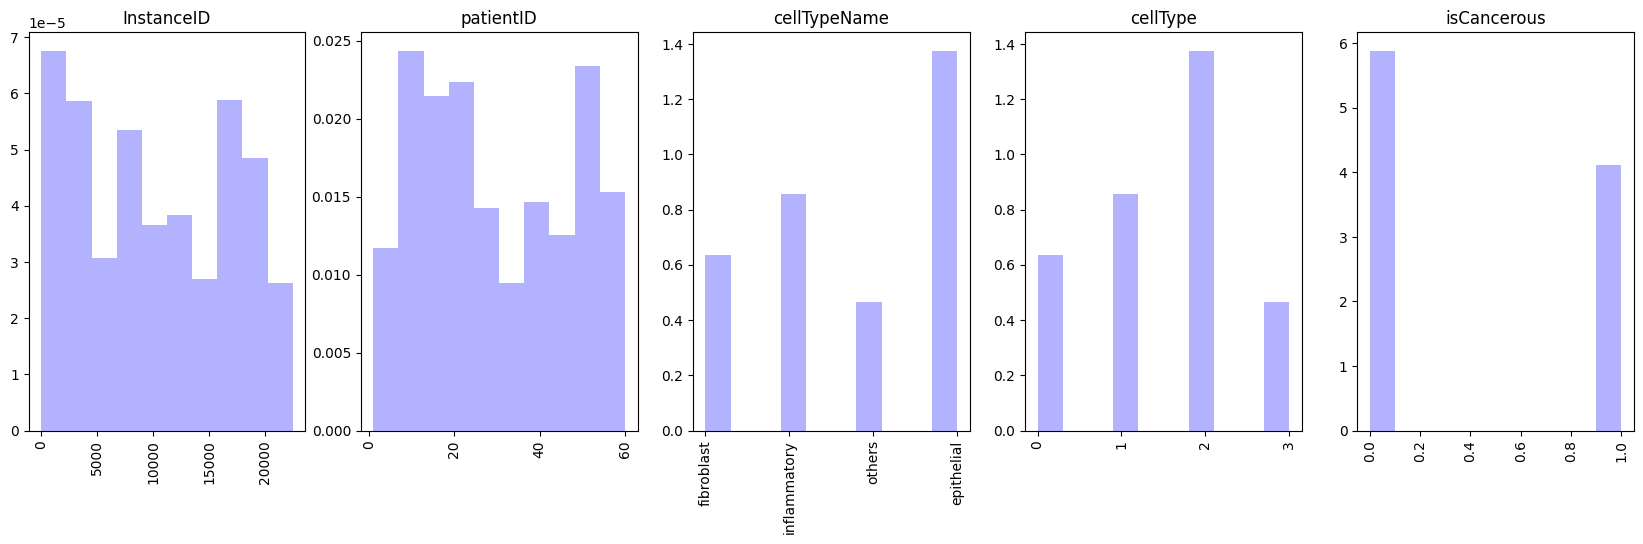

In [ ]:
#Distirbution for each variable
print("\nDistribution for each variable:")
plt.figure(figsize=(25,30))
#didnt do image name because its not relevant
for i, col in enumerate([c for c in mainColonCellFrame.columns if c != 'ImageName']):
    plt.subplot(5, 6, i + 1)
    plt.hist(mainColonCellFrame[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
plt.show()

#### Historgram Plot for Distribution Pattern for all variables
Reason:
- visualise data distirbution - shape, spread and central tendency to see if its normal, multimodal, or skewed.
- check the mean, mode and median using the overall shape
- check for outlier if there is unusual frequency in the ranges

Observation from Histogram Plot:
- InstanceID and PatientID are identifiers so dont really show any meaningful information
- CellTypeName and celltype both indicate that the epithelial cell is the most common compared to the others. This shows that the distribution of the cells aren't balanced
- isCancerous is a binary variable (0 for non-cancerous and 1 for cancerous). The histogram shows that there are more non-cancerous instances present
- There are no significant outliers present in the any of the histograms


Correlation Matrix between variables:


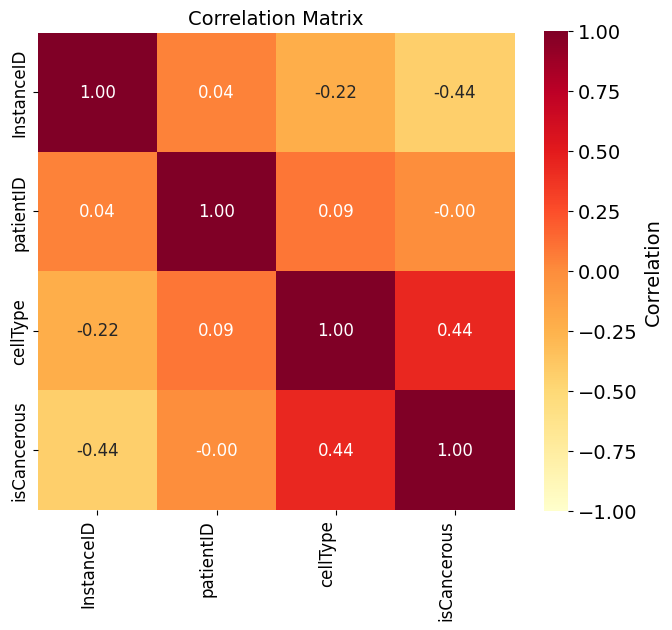

In [ ]:
# Correlation Matrix between variables
print("\nCorrelation Matrix between variables:")
f, ax = plt.subplots(figsize=(7, 7))
numeric_df = mainColonCellFrame.select_dtypes(include='number')

corr = numeric_df.corr()

# Increase font sizes
plt.rcParams.update({'font.size': 14})  # Base font size
cbar_kws = {"shrink": 0.8, "label": "Correlation"}

# Create the heatmap with annotations and a famous color palette
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap="YlOrRd",  # Use the yellow-orange-red palette
    square=True,
    annot=True,  # This will print the values on the heatmap
    fmt=".2f",   # Format the annotations to 2 decimal places
    annot_kws={"size": 12},
    cbar_kws=cbar_kws
)

# Rotate x-axis labels for better readability
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right',
    fontsize=12
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize=12
)

# Increase title font size
plt.title("Correlation Matrix", fontsize=14)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for bigger fonts
plt.show()

#### Correlation Matrix between isCancerous and other variables
Reason:
- visualise how different variables relate with each other with its strength and direction (positive/negative)
- to spot multicollinearity by identifying extremely high correlations between predictors

Observations:
- Strong Predictors (|r| > 0.5):
    - None

- Moderate Predictors (0.3 < |r| < 0.5):
    - cellType: (0.44) (positive correlation)
    - instanceID: (-0.44) (negative correlation)

- Weak Predictors (|r| < 0.3):
    - patientID: (0.00) (no correlation)

<font color='red'>No presence of multicollinearity in the dataset</font>


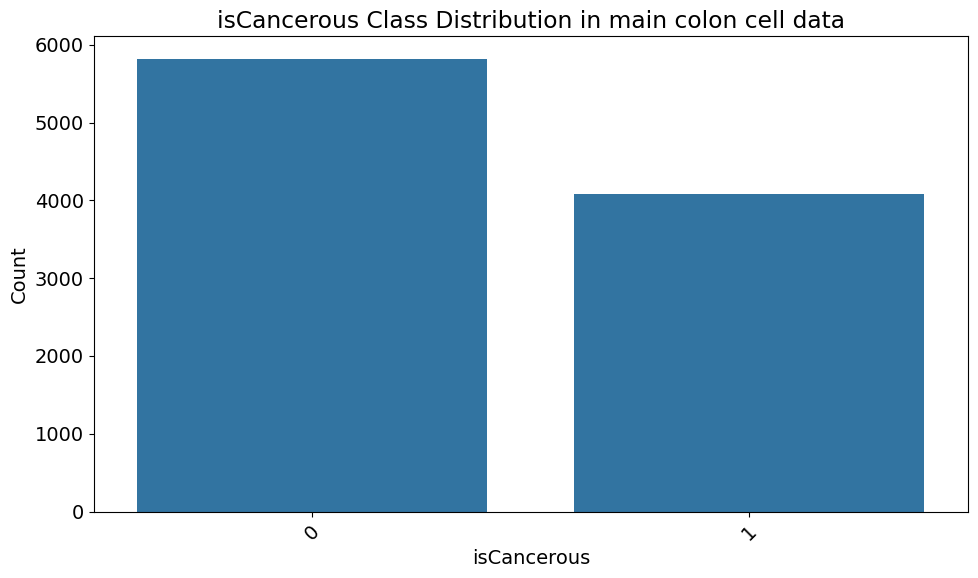

In [ ]:
# isCancerous class distribution
plt.figure(figsize=(10,6))
sns.countplot(data=mainColonCellFrame, x='isCancerous', order=mainColonCellFrame['isCancerous'].value_counts().index)
plt.title('isCancerous Class Distribution in main colon cell data')
plt.xlabel('isCancerous')
plt.ylabel('Count')
plt.xticks(rotation=45)  # rotate if class names are long
plt.tight_layout()
plt.show()

#### isCancerous Class Distribution Plot
- Reason: Identify class imbalance and need for data augmentation
- Moderate class imbalance (58:42 ratio) with 5,800 non-cancerous vs 4,100 cancerous cells
- Sufficient cancerous samples allow standard classification with appropriate evaluation metrics


Relationship between isCancerous and other variables:


<Figure size 3000x5000 with 0 Axes>

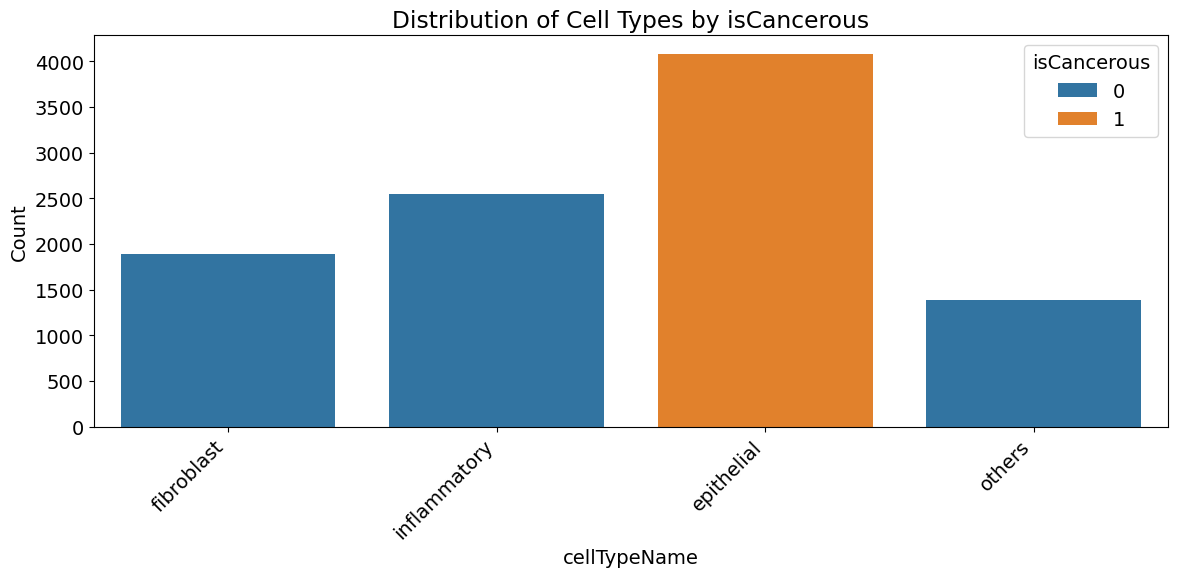

In [ ]:
# Relationship between isCancerous and other variables
print("\nRelationship between isCancerous and other variables:")
plt.figure(figsize=(30,50))

# Create a mapping from cellTypeName to cellType
cell_type_mapping = mainColonCellFrame[['cellTypeName', 'cellType']].drop_duplicates().set_index('cellTypeName')['cellType']

# Sort cell types by their numeric cellType value
ordered_cell_types = cell_type_mapping.sort_values().index.tolist()

# Count plot for Distribution of Cell Types by isCancerous with explicit order
plt.figure(figsize=(12, 6))
sns.countplot(data=mainColonCellFrame, x='cellTypeName', hue='isCancerous', order=ordered_cell_types)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Cell Types by isCancerous')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### Bar Chart for Distirbution for each Cell Type by isCancerous
- Reason: Identify cell types associated with cancer status as potential predictive indicators
Observations:

- Cancer appears exclusively in epithelial cells (4,000 instances)
- Non-cancerous cells distributed across fibroblast (1,900), inflammatory (2,500), and others (1,400)

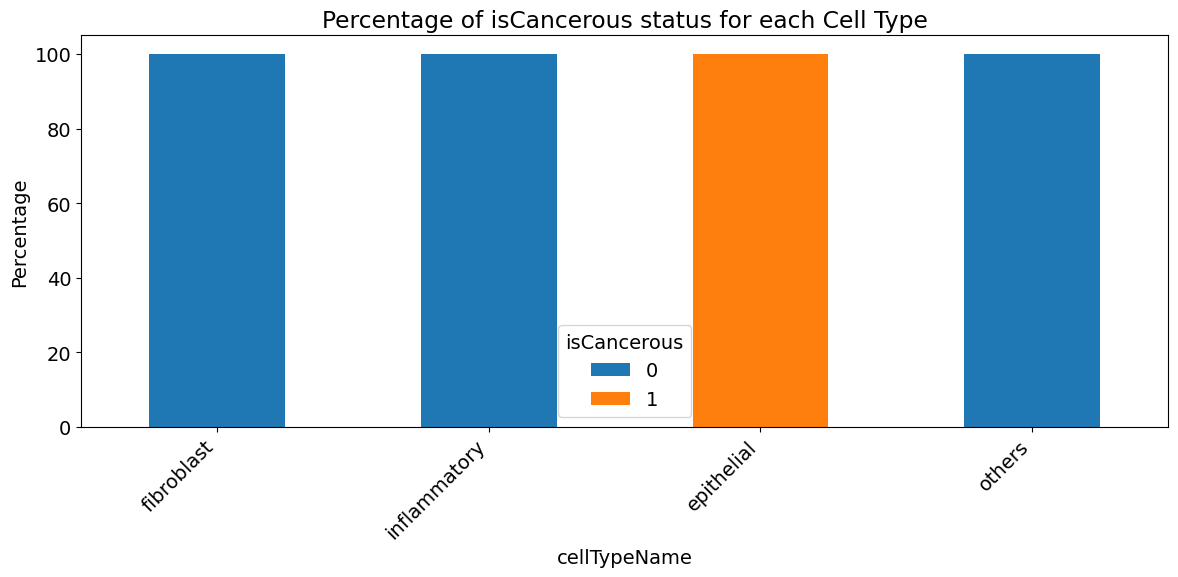

In [ ]:
# Stacked bar chart with the same order
bar_chart_iscancerous_by_cell_type = pd.crosstab(
    mainColonCellFrame['cellTypeName'],
    mainColonCellFrame['isCancerous'],
    normalize='index'
).mul(100)

# Reindex the DataFrame to match the order based on cellType numeric value
bar_chart_iscancerous_by_cell_type = bar_chart_iscancerous_by_cell_type.reindex(ordered_cell_types)

bar_chart_iscancerous_by_cell_type.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of isCancerous status for each Cell Type')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()


#### Bar Chart for Percentage of isCancerous status for each Cell Type
- Reason: Show cancer status proportion within each cell type
Observations:

- 100% of epithelial cells are cancerous; 100% of other cell types are non-cancerous
- Perfect correlation between cell type and cancer status makes cell type an ideal classification criterion


Pairplot matrix between all variables with isCancerous hue:


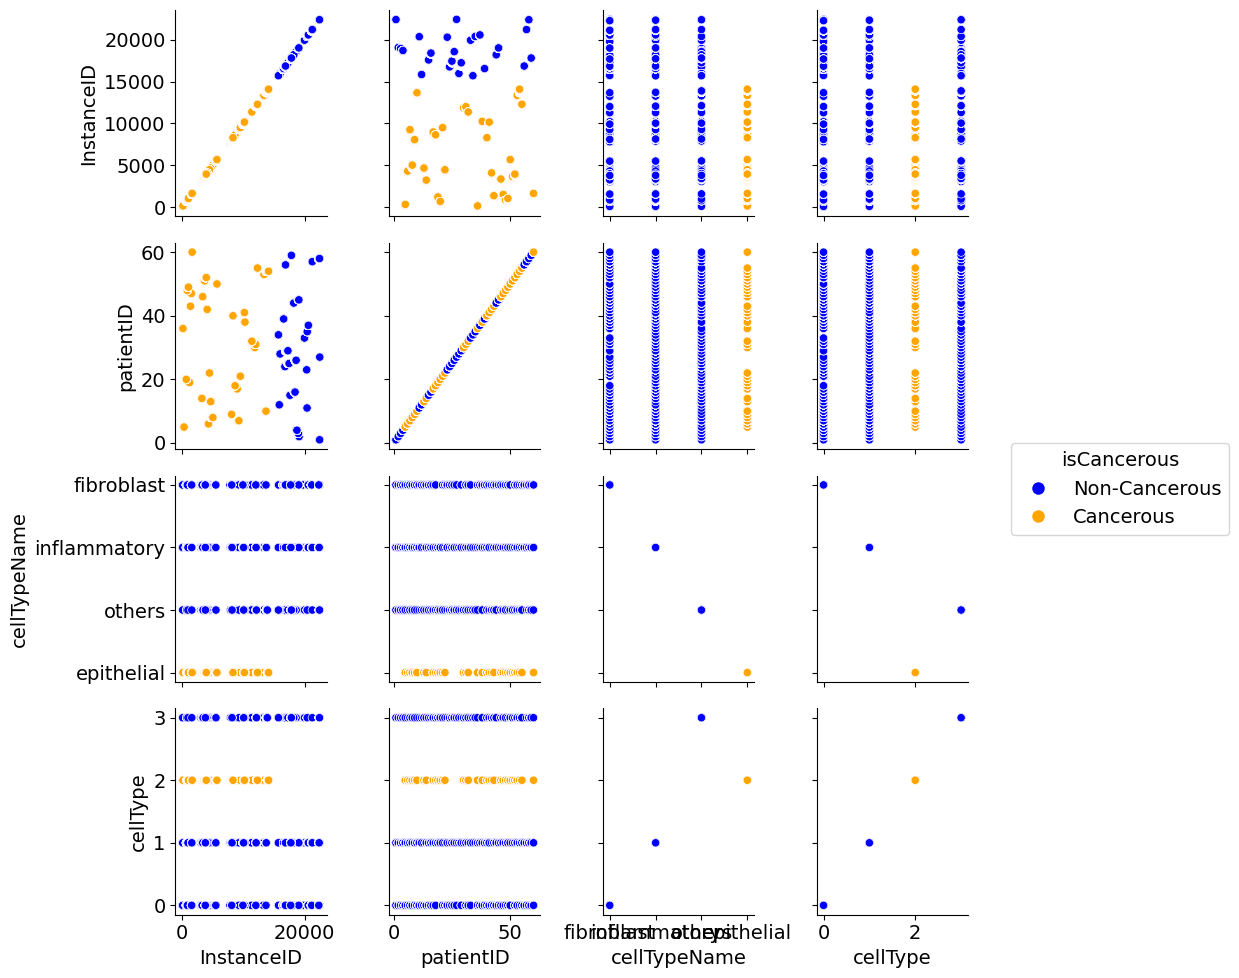

In [ ]:
# Create a Pair plot for each variable with target variable hue (isCancerous)
print("\nPairplot matrix between all variables with isCancerous hue:")
isCancerous_pair_plot = sns.PairGrid(
    mainColonCellFrame,
    vars=['InstanceID', 'patientID', 'cellTypeName', 'cellType'],
    hue="isCancerous",
    palette={0: 'blue', 1: 'orange'}
)
isCancerous_pair_plot.map(sns.scatterplot)

# Remove auto-generated legends
for ax in isCancerous_pair_plot.axes.flat:
    if ax.get_legend() is not None:
        ax.get_legend().remove()

# Add legend
from matplotlib.lines import Line2D
custom_lines = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10)
]
isCancerous_pair_plot.fig.legend(
    custom_lines,
    ["Non-Cancerous", "Cancerous"],
    title="isCancerous",
    loc='center right',
    bbox_to_anchor=(1.25, 0.5)
)

plt.tight_layout()
plt.show()

#### Pairplot matrix between all variables with isCancerous hue:
- Reason: Visualize multi-variable relationships and identify potential decision boundaries

- Linear boundaries separate classes in patientID vs instanceID and cellType-related plots
- No non-linear decision boundaries apparent
- Patient-based clustering shows sampling bias (some patients have more cancerous samples)
- CellTypeName and CellType perfectly correlated (redundant features)


Pairplot matrix between all variables with cellType hue:


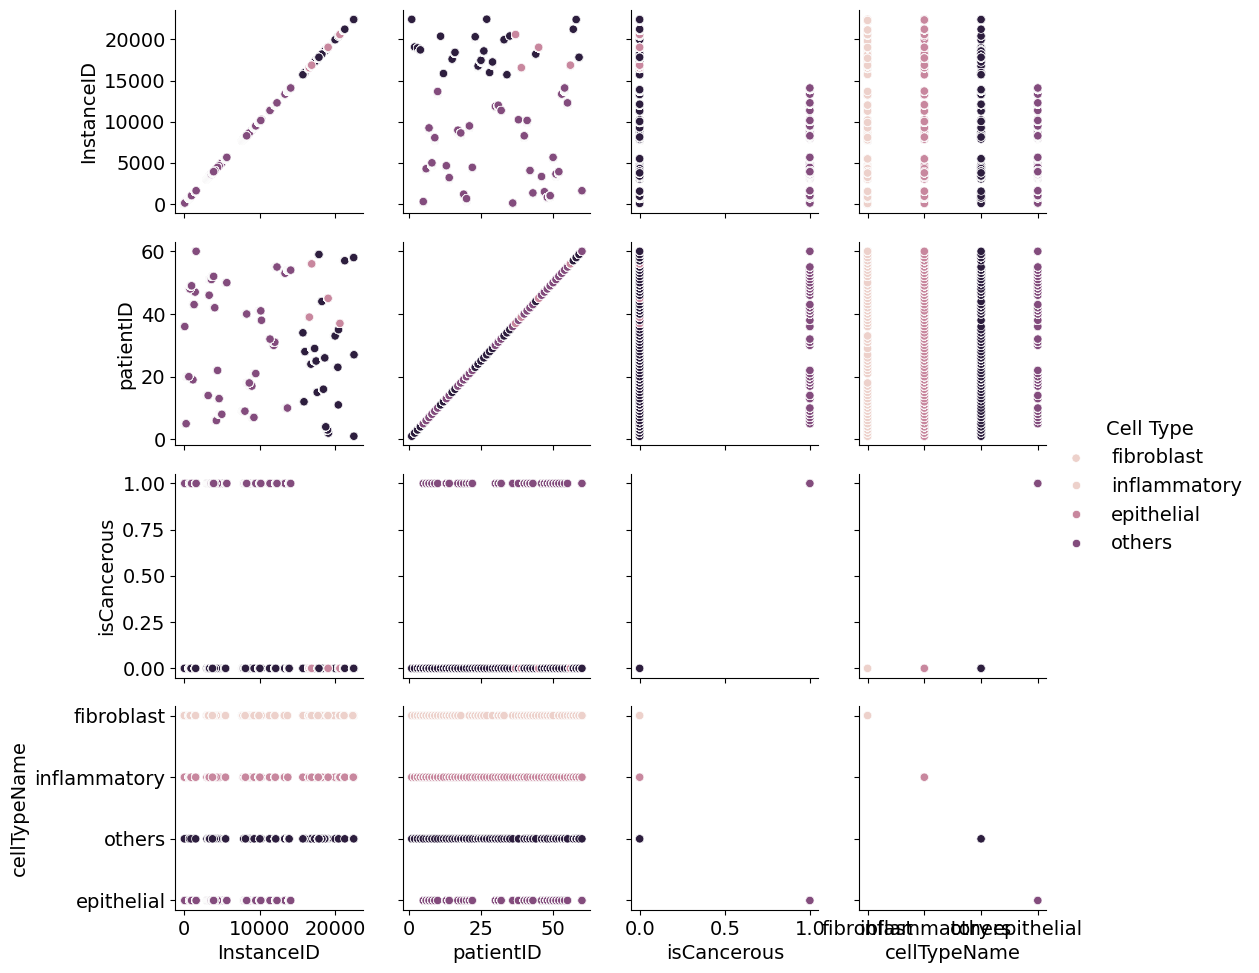

In [ ]:
# Create a Pair plot for each variable with target variable hue (cellType)
print("\nPairplot matrix between all variables with cellType hue:")
cellType_pair_plot = sns.PairGrid(mainColonCellFrame, vars=['InstanceID','patientID', 'isCancerous', 'cellTypeName'], hue="cellType")
cellType_pair_plot.map(sns.scatterplot)

# Get unique cell type names for the legend
cell_type_labels = {
    cell_type: name
    for cell_type, name in zip(
        mainColonCellFrame['cellType'].unique(),
        mainColonCellFrame.drop_duplicates(subset=['cellType'])['cellTypeName']
    )
}
# Sort by cell type value
sorted_labels = [cell_type_labels[i] for i in sorted(cell_type_labels.keys())]

cellType_pair_plot.add_legend(title="Cell Type", labels=sorted_labels)
plt.show()

#### Pairplot matrix between all variables with cellType hue:
- Reason: Visualize variable relationships by cell type
- CellTypeName shows expected categorical clustering
- isCancerous shows no separation by cell type
- InstanceID and PatientID are non-predictive identifiers
- Low correlation between variables
- Color differentiates cell types but no distinct variable groupings appear


Sample image for each cell type:


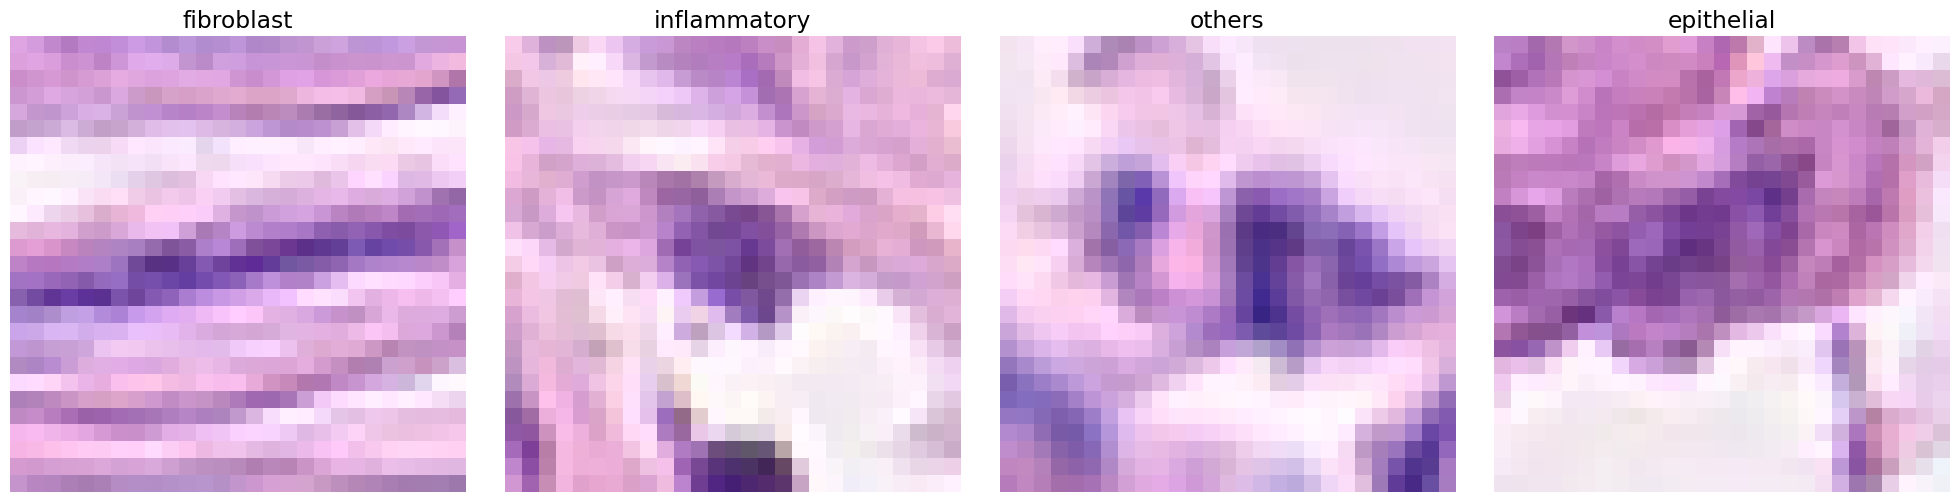

In [ ]:
print("\nSample image for each cell type:")
# unique cell type labels
mainColonCellFrame_cell_types = mainColonCellFrame['cellTypeName'].unique()
example_images = {}

# Choose random image
for cell in mainColonCellFrame_cell_types:
    one_row = mainColonCellFrame[mainColonCellFrame['cellTypeName'] == cell].sample(1)
    example_images[cell] = one_row['ImageName'].values[0]

# grid
fig, axes = plt.subplots(1, len(mainColonCellFrame_cell_types), figsize=(len(mainColonCellFrame_cell_types) * 5, 5))

# Loop selected image + display
for ax, (cell, filename) in zip(axes, example_images.items()):
    path = os.path.join("patch_images", filename)
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.set_title(cell)
    ax.axis('off')

plt.tight_layout()
plt.show()

#### Sample image for each cell type
Reason: The sample image printed out visually references what each cell type looks like under a microscope. This is a good way to see what we are dealing with.
Observations:
- Fibroblast: Shows a dark centre with lighter colours surrounding it
- Inflammatory: Shows some clustered cells around a center
- Others: No defined structure seems to be a misc cell type. There seems to be some shape present
- Epithelial: There seems to be some darker spots (nucleus?) which has a structured appearance

#### Potential Issues
- Images have minimal pixels and are quite blurry, this can make it difficult for the Model to recognise features and indicators
- Occlusion is minimal as the different CellTypes have already been sorted from the original Dataset
- Embedded text have already been organised, with ExtraData this has not been done, meaning there is a risk of misclassification. This could result in the model learning the wrong features

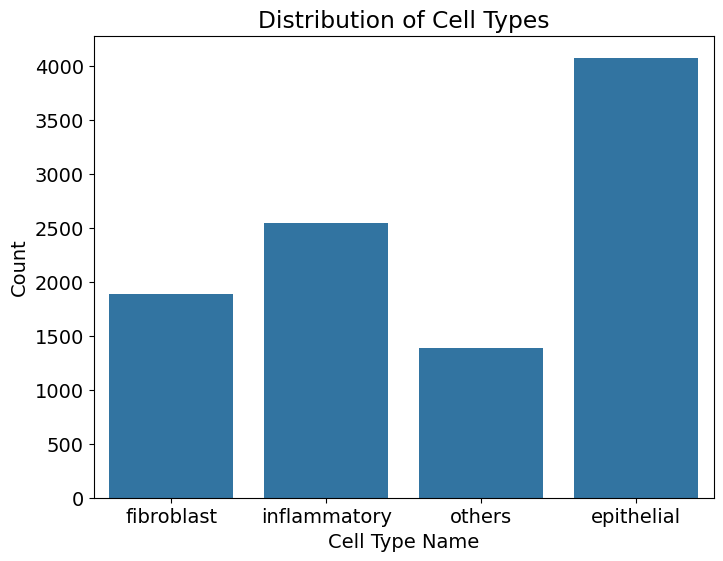

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cellTypeName', data=mainColonCellFrame)
plt.title('Distribution of Cell Types')
plt.xlabel('Cell Type Name')
plt.ylabel('Count')
plt.show()

In [ ]:
print(mainColonCellFrame['cellTypeName'].value_counts())

epithelial      4079
inflammatory    2543
fibroblast      1888
others          1386
Name: cellTypeName, dtype: int64


The distribution shows an inbalance where there is a lot more Epithelial than the rest. This means there may be bias present when predicting the Cell Type in future models. To mitigate this problem, there should be some pre processing to ensure there is a fair performance across the different cell types

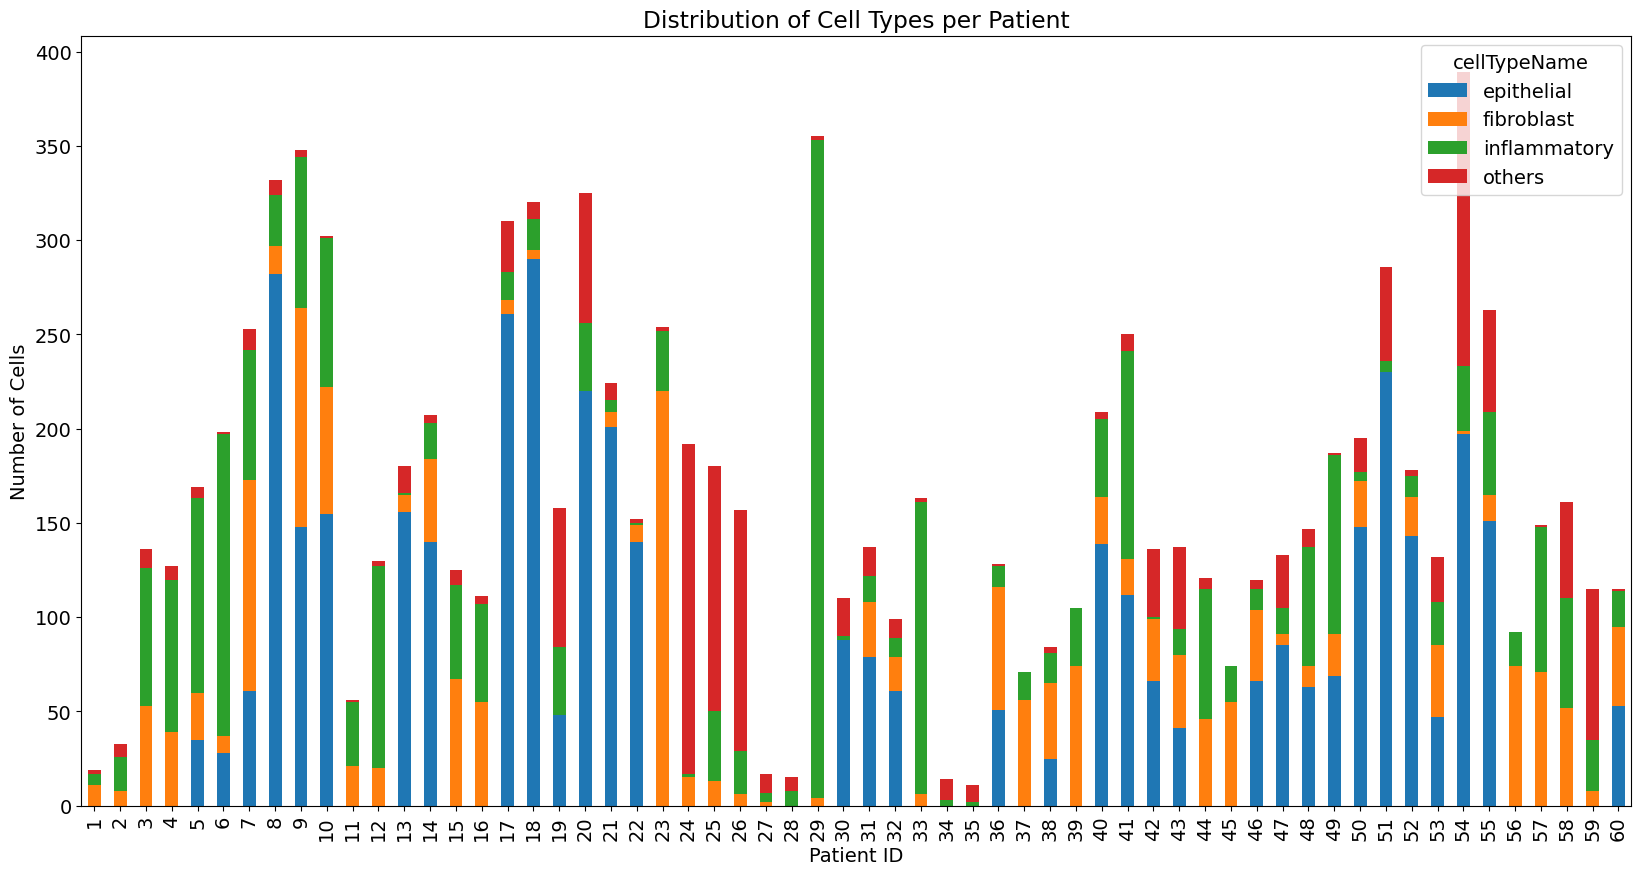

In [ ]:
# Number of each cell type per patient
cell_counts = mainColonCellFrame.groupby(['patientID', 'cellTypeName']).size().reset_index(name='frequency')

# Cell type = columns and patients = rows
cell_pivot = cell_counts.pivot_table(index='patientID', columns='cellTypeName', values='frequency', fill_value=0)

# bar chart
ax = cell_pivot.plot.bar(stacked=True, figsize=(20, 10))

# labels
ax.set_title('Distribution of Cell Types per Patient')
ax.set_ylabel('Number of Cells')
ax.set_xlabel('Patient ID')

# Display the plot
plt.show()

The Bar Chart above displays the distribution of the different cell types. This is stacked and colour coded where we can see that the blue (Epithelial) cells are the most common and that the cell composition between the different patients has some variation.

In [ ]:
#Copying the MainColonCellFrame to perform different different pre-processing
#This is because CellType can't be hot encoded as this is the Target Variable for the Cell Type Model
cellType_base_main_data = mainColonCellFrame.copy()

## Data Pre-Processing for Baseline Cell Type Model - Logistic Regression (multi)

Missing Values - There are none

Remove InstanceID', 'ImageName', 'cellTypeName', 'isCancerous



- The data is split by PatientID to prevent data leakage from occuring. This works by preventing patients having their cells split across different sets. K-Fold was NOT used due to CPU constraints.
- It is important not to have patient-based data leakage as if the model has patients over different datasets, it could cause the model to memorise features. Alternative solutions to splitting the dataset if PatientID is not possible is through Stratified K-Fold, shuffle split, because the model can learn from the dataset by iterating through it multiple times.
- It is evident in the Histogram that there is a Class imbalance, with others being the least represented, this can be addressed by using augmented data to help create larger sample dataset for less represented CellTypes allowing for better balance, this was not implemented. Class Weights can also be used which will be shown in the tuned models

In [ ]:
#drop irrelevant columns based off EDA
cellType_base_main_data.drop(columns=['InstanceID', 'cellTypeName', 'isCancerous'], inplace=True)

In [ ]:
#confirming columns were dropped
print(cellType_base_main_data.columns)

Index(['patientID', 'ImageName', 'cellType'], dtype='object')



Cell Type Base Model - Logistic Regression: Splitting into Train, Validation, and Test sets (by patientID):
Training data: 5774 samples from 36 patients
Validation data: 2283 samples from 12 patients
Test data: 1839 samples from 12 patients

Cell Type Base Model: Class Distribution for Train, Validation, and Test sets:


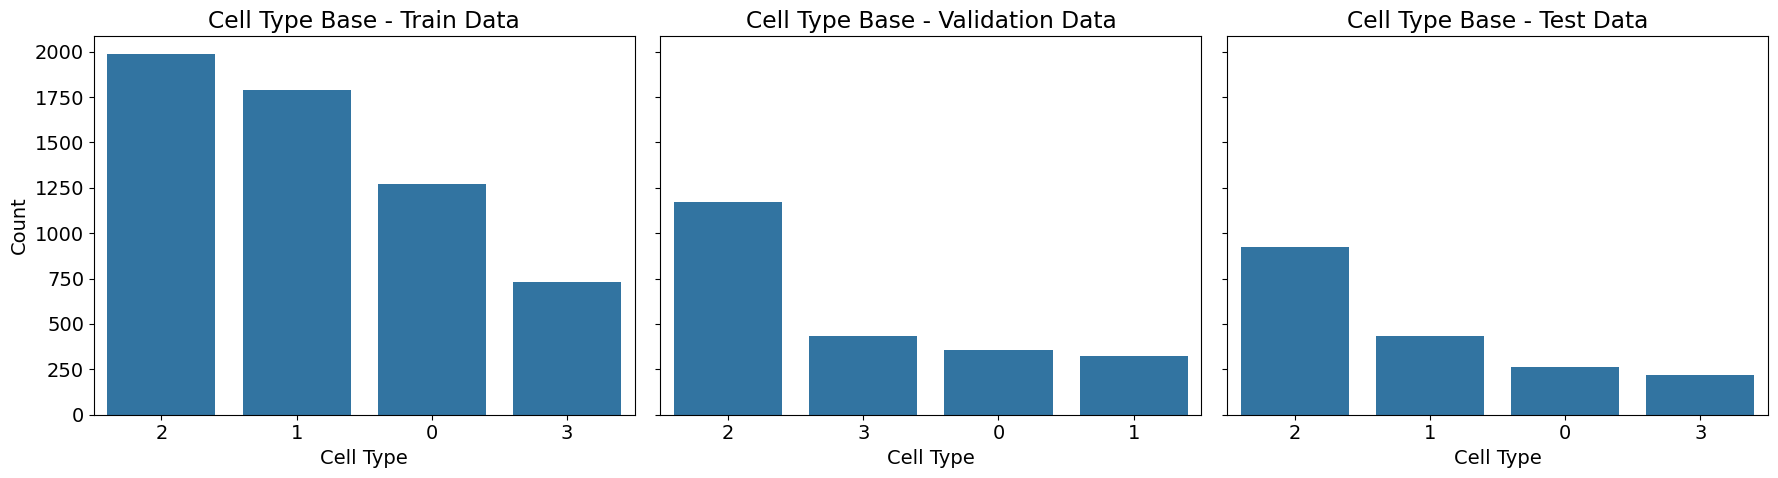

In [ ]:
print("\nCell Type Base Model - Logistic Regression: Splitting into Train, Validation, and Test sets (by patientID):")

# Unique patient IDs
cellType_unique_patients = cellType_base_main_data['patientID'].unique()

# Split patient IDs
cellType_base_train_patients, cellType_base_test_patients = train_test_split(
    cellType_unique_patients, test_size=0.2, random_state=42
)

# Further split
cellType_base_train_patients, cellType_base_val_patients = train_test_split(
    cellType_base_train_patients, test_size=0.25, random_state=42
)

# Create datasets
with pd.option_context('mode.chained_assignment', None):
    # Training set
    cellType_base_logistic_train_data = cellType_base_main_data[
        cellType_base_main_data['patientID'].isin(cellType_base_train_patients)
    ]
    # Validation set
    cellType_base_logistic_val_data = cellType_base_main_data[
        cellType_base_main_data['patientID'].isin(cellType_base_val_patients)
    ]
    # Test set
    cellType_base_logistic_test_data = cellType_base_main_data[
        cellType_base_main_data['patientID'].isin(cellType_base_test_patients)
    ]

# Print
print(f"Training data: {len(cellType_base_logistic_train_data)} samples from {len(cellType_base_train_patients)} patients")
print(f"Validation data: {len(cellType_base_logistic_val_data)} samples from {len(cellType_base_val_patients)} patients")
print(f"Test data: {len(cellType_base_logistic_test_data)} samples from {len(cellType_base_test_patients)} patients")

# Class distribution plots
print("\nCell Type Base Model: Class Distribution for Train, Validation, and Test sets:")

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Training
sns.countplot(
    data=cellType_base_logistic_train_data,
    x='cellType',
    order=cellType_base_logistic_train_data['cellType'].value_counts().index,
    ax=axes[0]
)
axes[0].set_title('Cell Type Base - Train Data')
axes[0].set_xlabel('Cell Type')
axes[0].set_ylabel('Count')

# Validation
sns.countplot(
    data=cellType_base_logistic_val_data,
    x='cellType',
    order=cellType_base_logistic_val_data['cellType'].value_counts().index,
    ax=axes[1]
)
axes[1].set_title('Cell Type Base - Validation Data')
axes[1].set_xlabel('Cell Type')
axes[1].set_ylabel('')

# Test
sns.countplot(
    data=cellType_base_logistic_test_data,
    x='cellType',
    order=cellType_base_logistic_test_data['cellType'].value_counts().index,
    ax=axes[2]
)
axes[2].set_title('Cell Type Base - Test Data')
axes[2].set_xlabel('Cell Type')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

The distribution above show cases that the data has been split creating:

Training (36 patients or 60%)
Validation (12 patients or 20%)
Testing (12 patients or 20%)

- Training data is used to train the model
- Validation Data is used to evaluate the model during the training purpose to see if its on the right track.
- Validation Data is good for comparing different models and assisting with different hyperparameter tuning (changing settings) to get the best possible performance on data that hasn't been seen by the model
- Test data is used for the very final evaluation of the model and won't be touched or used when we are training the model or tuning any of the parameters

### Baseline Development - Logistic Regression (MLP) for Cell Type

Neural Network (MLP) is chosen as a baseline model to:
- Strong at handling multi-class classification problems such as predicting the Cell Type
- Easy to implement to train and test as it works well with structured data
- Useful for providing a benchmark to compare against later when implementing other models such as CNN
- Alternative models for MLP would be a Decision Tree, however, Decision tree's are best utilised where the data is quite simple. It is also not effective at analysing Images as it works on X and Y axis'. The model that needs to be built to predict the CellType is more sophisticated.

In [ ]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
#Confirming version of Tensorflow and importing it
print(tf.__version__)

2.11.0


In [ ]:
#Input dimension is 27x27x3 because the image is 27x27 and x3 is due to RGB values
cellType_base_INPUT_DIM = (27, 27, 3)
#Neurons to balance the efficient to help learn
cellType_base_HIDDEN_LAYER_DIM = 256
cellType_base_OUTPUT_CLASSES = 4

# MLP model
cellType_base_nn_mlp_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=cellType_base_INPUT_DIM),  # Flatten image to a 2-dimensional array
    tf.keras.layers.Dense(cellType_base_HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(cellType_base_OUTPUT_CLASSES)
])

cellType_base_nn_mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2187)              0         
                                                                 
 dense (Dense)               (None, 256)               560128    
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 561,156
Trainable params: 561,156
Non-trainable params: 0
_________________________________________________________________


### Performance Metrics Selection for all CellType Classification Models

- Macro Average Precision
    - Tells us if the models predicted positives are correct or not
- Macro Average Recall
    - Tells us if the model catches all the positives
- Macro Average F1 Score
    - This is essentially the balance between precision and recall with equal class weighting
- Confusion Matrix
    - This is used to see the true vs predicted cell Types
- ROC Curve
    - This evaluates how the model performs accross thresholds
- Accuracy
    - This is NOT used because of class imbalance, this means models can get unrealistic results depending on the cell type

In [ ]:
# all custom metrics funciton below are adapted and learned from: https://github.com/keras-team/keras/issues/6507

#Custom categorical precision that is called upon
class Categorical_Precision(tf.keras.metrics.Metric):
    def __init__(self, num_classes=4, average='weighted', name='categorical_precision', **kwargs):
        super().__init__(name=name, **kwargs)
        self.num_classes = num_classes
        self.average = average
        self.conf_matrix = self.add_weight(name='conf_matrix', shape=(num_classes, num_classes),
                                           initializer='zeros', dtype=tf.float32)

    def update_state(self, y_true, y_pred, sample_weight=None):
        true_labels = tf.argmax(y_true, axis=1)
        predicted_labels = tf.argmax(y_pred, axis=1)
        new_conf = tf.math.confusion_matrix(true_labels, predicted_labels,
                                            num_classes=self.num_classes, dtype=tf.float32)
        self.conf_matrix.assign_add(new_conf)

    def result(self):
        tp = tf.linalg.diag_part(self.conf_matrix)
        fp = tf.reduce_sum(self.conf_matrix, axis=0) - tp
        precision_per_class = tp / (tp + fp + tf.keras.backend.epsilon())

        if self.average == 'micro':
            precision = tf.reduce_sum(tp) / (tf.reduce_sum(tp + fp) + tf.keras.backend.epsilon())
        elif self.average == 'macro':
            precision = tf.reduce_mean(precision_per_class)
        elif self.average == 'weighted':
            support = tf.reduce_sum(self.conf_matrix, axis=1)
            precision = tf.reduce_sum(precision_per_class * support) / (tf.reduce_sum(support) + tf.keras.backend.epsilon())
        else:
            precision = tf.reduce_mean(precision_per_class)  # default to macro

        return precision

    def reset_states(self):
        self.conf_matrix.assign(tf.zeros_like(self.conf_matrix))

#Custom categorical recall that is called upon
class Categorical_Recall(tf.keras.metrics.Metric):
    def __init__(self, num_classes=4, average='weighted', name='categorical_recall', **kwargs):
        super().__init__(name=name, **kwargs)
        self.num_classes = num_classes
        self.average = average
        self.conf_matrix = self.add_weight(name='conf_matrix', shape=(num_classes, num_classes),
                                           initializer='zeros', dtype=tf.float32)

    def update_state(self, y_true, y_pred, sample_weight=None):
        true_labels = tf.argmax(y_true, axis=1)
        predicted_labels = tf.argmax(y_pred, axis=1)
        new_conf = tf.math.confusion_matrix(true_labels, predicted_labels,
                                            num_classes=self.num_classes, dtype=tf.float32)
        self.conf_matrix.assign_add(new_conf)

    def result(self):
        tp = tf.linalg.diag_part(self.conf_matrix)
        fn = tf.reduce_sum(self.conf_matrix, axis=1) - tp
        recall_per_class = tp / (tp + fn + tf.keras.backend.epsilon())

        if self.average == 'micro':
            recall = tf.reduce_sum(tp) / (tf.reduce_sum(tp + fn) + tf.keras.backend.epsilon())
        elif self.average == 'macro':
            recall = tf.reduce_mean(recall_per_class)
        elif self.average == 'weighted':
            support = tf.reduce_sum(self.conf_matrix, axis=1)
            recall = tf.reduce_sum(recall_per_class * support) / (tf.reduce_sum(support) + tf.keras.backend.epsilon())
        else:
            recall = tf.reduce_mean(recall_per_class)

        return recall

    def reset_states(self):
        self.conf_matrix.assign(tf.zeros_like(self.conf_matrix))

#Custom categorical F1 Score that is called upon
class Categorical_F1Score(tf.keras.metrics.Metric):
    def __init__(self, num_classes=4, average='weighted', name='categorical_f1', **kwargs):
        super().__init__(name=name, **kwargs)
        self.num_classes = num_classes
        self.average = average
        self.conf_matrix = self.add_weight(name='conf_matrix', shape=(num_classes, num_classes),
                                           initializer='zeros', dtype=tf.float32)

    def update_state(self, y_true, y_pred, sample_weight=None):
        true_labels = tf.argmax(y_true, axis=1)
        predicted_labels = tf.argmax(y_pred, axis=1)
        conf_update = tf.math.confusion_matrix(true_labels, predicted_labels,
                                               num_classes=self.num_classes, dtype=tf.float32)
        self.conf_matrix.assign_add(conf_update)

    def result(self):
        tp = tf.linalg.diag_part(self.conf_matrix)
        fp = tf.reduce_sum(self.conf_matrix, axis=0) - tp
        fn = tf.reduce_sum(self.conf_matrix, axis=1) - tp

        precision_per_class = tp / (tp + fp + tf.keras.backend.epsilon())
        recall_per_class = tp / (tp + fn + tf.keras.backend.epsilon())

        f1_per_class = 2 * precision_per_class * recall_per_class / (precision_per_class + recall_per_class + tf.keras.backend.epsilon())

        if self.average == 'micro':
            total_tp = tf.reduce_sum(tp)
            total_fp = tf.reduce_sum(fp)
            total_fn = tf.reduce_sum(fn)

            micro_precision = total_tp / (total_tp + total_fp + tf.keras.backend.epsilon())
            micro_recall = total_tp / (total_tp + total_fn + tf.keras.backend.epsilon())
            f1 = 2 * micro_precision * micro_recall / (micro_precision + micro_recall + tf.keras.backend.epsilon())

        elif self.average == 'macro':
            f1 = tf.reduce_mean(f1_per_class)

        elif self.average == 'weighted':
            support = tf.reduce_sum(self.conf_matrix, axis=1)
            f1 = tf.reduce_sum(f1_per_class * support) / (tf.reduce_sum(support) + tf.keras.backend.epsilon())

        else:
            f1 = tf.reduce_mean(f1_per_class)  # default fallback

        return f1

    def reset_states(self):
        self.conf_matrix.assign(tf.zeros_like(self.conf_matrix))

In [ ]:
from sklearn.metrics import roc_curve, auc
#custom function that plots all the ROC curves into one curve so its easy to compare.
def plot_multiclass_roc(model, test_generator, class_names):
    y_true = []
    y_pred = []

    # Get labels and predictions batch by batch
    for i in range(len(test_generator)):
        x_batch, y_batch = test_generator[i]
        preds = model.predict(x_batch, verbose=0)
        y_true.append(y_batch)
        y_pred.append(preds)

    y_true = np.concatenate(y_true)
    y_pred = np.concatenate(y_pred)

    n_classes = len(class_names)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Compute ROC curve and AUC for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'ROC for {class_names[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-Class ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


In [ ]:
#Custom Plot all metrics grid that can be used to display the Loss, precision, recall and f1 scores
def plot_all_metrics_grid(history):
    epochs = range(1, len(history['loss']) + 1)

    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    # Loss
    axs[0, 0].plot(epochs, history['loss'], 'r--', label='Train')
    axs[0, 0].plot(epochs, history['val_loss'], 'b--', label='Validation')
    axs[0, 0].set_title('Loss')
    axs[0, 0].set_xlabel('Epochs')
    axs[0, 0].set_ylabel('Loss')
    axs[0, 0].legend()

    # Precision
    axs[0, 1].plot(epochs, history['categorical_precision'], 'r--', label='Train')
    axs[0, 1].plot(epochs, history['val_categorical_precision'], 'b--', label='Validation')
    axs[0, 1].set_title('Precision')
    axs[0, 1].set_xlabel('Epochs')
    axs[0, 1].set_ylabel('Precision')
    axs[0, 1].legend()

    # Recall
    axs[1, 0].plot(epochs, history['categorical_recall'], 'r--', label='Train')
    axs[1, 0].plot(epochs, history['val_categorical_recall'], 'b--', label='Validation')
    axs[1, 0].set_title('Recall')
    axs[1, 0].set_xlabel('Epochs')
    axs[1, 0].set_ylabel('Recall')
    axs[1, 0].legend()

    # F1 Score
    axs[1, 1].plot(epochs, history['categorical_f1'], 'r--', label='Train')
    axs[1, 1].plot(epochs, history['val_categorical_f1'], 'b--', label='Validation')
    axs[1, 1].set_title('F1 Score')
    axs[1, 1].set_xlabel('Epochs')
    axs[1, 1].set_ylabel('F1 Score')
    axs[1, 1].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
cellType_base_nn_mlp_model.compile(
    optimizer='SGD',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy',
            Categorical_Precision(average='weighted'),
            Categorical_Recall(average='weighted'),
            Categorical_F1Score(num_classes=4, average='weighted')])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32

# ImageDataGenerators
cellType_base_train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
cellType_base_val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
cellType_base_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Convert cellType to string type (Doesn't work if you don't do this)
cellType_base_logistic_train_data['cellType'] = cellType_base_logistic_train_data['cellType'].astype(str)
cellType_base_logistic_val_data['cellType'] = cellType_base_logistic_val_data['cellType'].astype(str)
cellType_base_logistic_test_data['cellType'] = cellType_base_logistic_test_data['cellType'].astype(str)


# train generator
cellType_base_train_generator = cellType_base_train_datagen.flow_from_dataframe(
    dataframe=cellType_base_logistic_train_data,
    directory='./patch_images',
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
)

# validation generator
cellType_base_val_generator = cellType_base_val_datagen.flow_from_dataframe(
    dataframe=cellType_base_logistic_val_data,
    directory='./patch_images',
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
)

# test generator
cellType_base_test_generator = cellType_base_test_datagen.flow_from_dataframe(
    dataframe=cellType_base_logistic_test_data,
    directory='./patch_images',
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
)

Found 5774 validated image filenames belonging to 4 classes.
Found 2283 validated image filenames belonging to 4 classes.
Found 1839 validated image filenames belonging to 4 classes.


In [ ]:
# Set number of epochs
epochs = 50

# Train the model
cellType_base_nn_mlp_history = cellType_base_nn_mlp_model.fit(
    cellType_base_train_generator,
    epochs=epochs,
    verbose=0,
    validation_data=cellType_base_val_generator
)

In [ ]:
#Custom code taken from the labs. This is used to plot the learning curve and is called upon when plotting the learning curve
import matplotlib.pyplot as plt
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

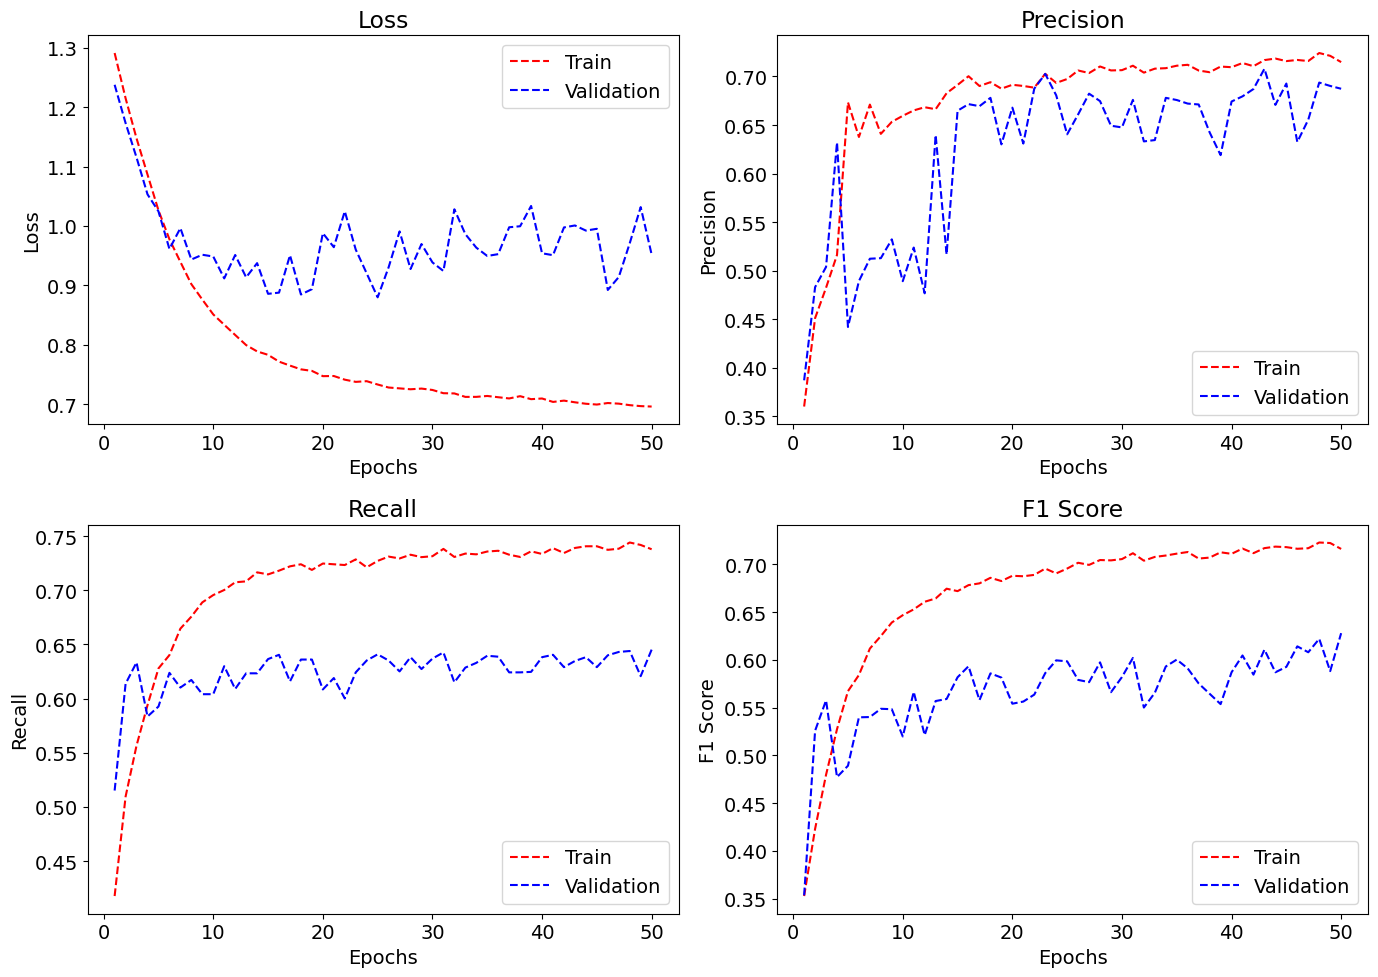

In [ ]:
plot_all_metrics_grid(cellType_base_nn_mlp_history.history)

## Learning Curve - MLP Base Model

The above Learning curves are used to help identify overfitting or underfitting. This information can be used to help tune the model later on.

- Loss is overfitting. There is some good learning on the training set but the validation loses stability suggesting some generalisation
- Precision seems to platoe around 0.65-0.7 but shows signs of potential overfitting
- Recall's validation is much lower than the training
- F1 Score shows that the model is training well but not performing well on generalising unseen data

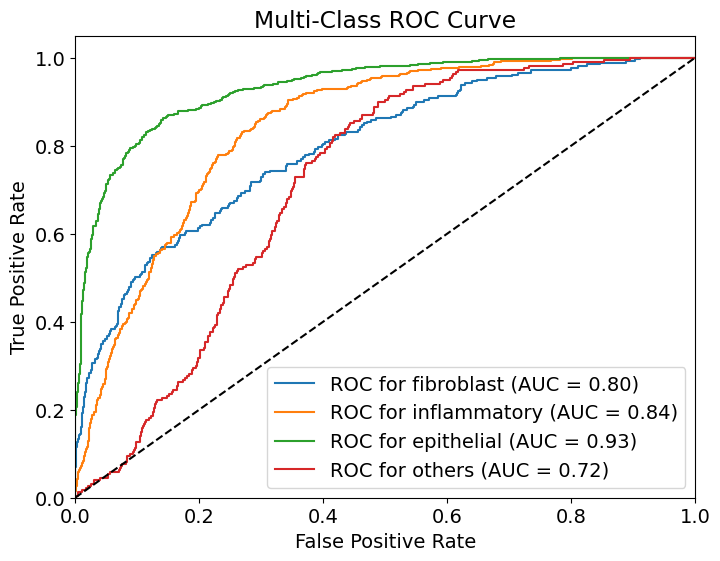

In [ ]:
plot_multiclass_roc(
    cellType_base_nn_mlp_model,
    cellType_base_test_generator,
    class_names=['fibroblast', 'inflammatory', 'epithelial', 'others']
)

### ROC Curve - MLP Base Model

- Epithelial (0.93) is an excellent result showing the model is confident and accurate
- Inflammatory (0.84) is well balanced
- Fibroblast (0.80) still quite good but not as strong as the other variables
- Others (0.72) Not as strong of a performance, suggesting class imbalance (which was already determined)

181/181 [==============================] - 1s 7ms/step


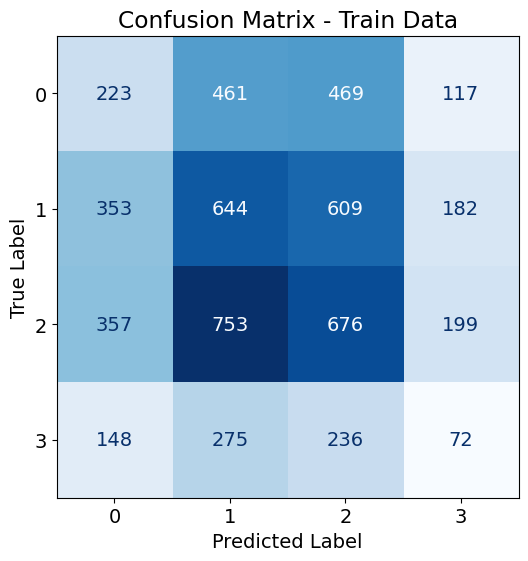

58/58 [==============================] - 0s 7ms/step


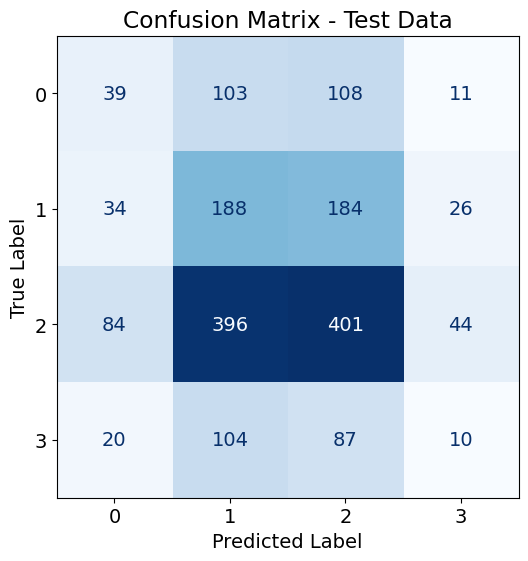

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_names = list(cellType_base_test_generator.class_indices.keys())
# confusion matrix train
y_true_train = cellType_base_train_generator.classes
y_pred_probs_train = cellType_base_nn_mlp_model.predict(cellType_base_train_generator)
y_pred_train = np.argmax(y_pred_probs_train, axis=1)

cm_train = confusion_matrix(y_true_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp_train.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

y_true_test = cellType_base_test_generator.classes
y_pred_probs_test = cellType_base_nn_mlp_model.predict(cellType_base_test_generator)
y_pred_test = np.argmax(y_pred_probs_test, axis=1)


# confusion matrix Test
cm_test = confusion_matrix(y_true_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp_test.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Confusion Matrix - MLP Base Model

- Class 0 (Fibroblast)
    - Model struggles to learn with around 80% of the variables predicting wrong for Class 1 and 2 in Train
    - Very low prediction results in Test
- Class 1 (Inflammatory)
    - Decent performance in Train
    - Generalisation appears weak in Test
- Class 2 (Epithelial)
    - Very high accuracy and appears to have learnt the best out of all of them in Train
    - Similar results in Test too
- Class 3 (Others)
    - Very poor results in both Train and Test with majority of predictions being incorrect

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

cellType_base_nn_mlp_test_generator = test_datagen.flow_from_dataframe(
    dataframe=cellType_base_logistic_test_data,
    directory='./patch_images',
    x_col="ImageName",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    seed=42
)

Found 1839 validated image filenames belonging to 4 classes.


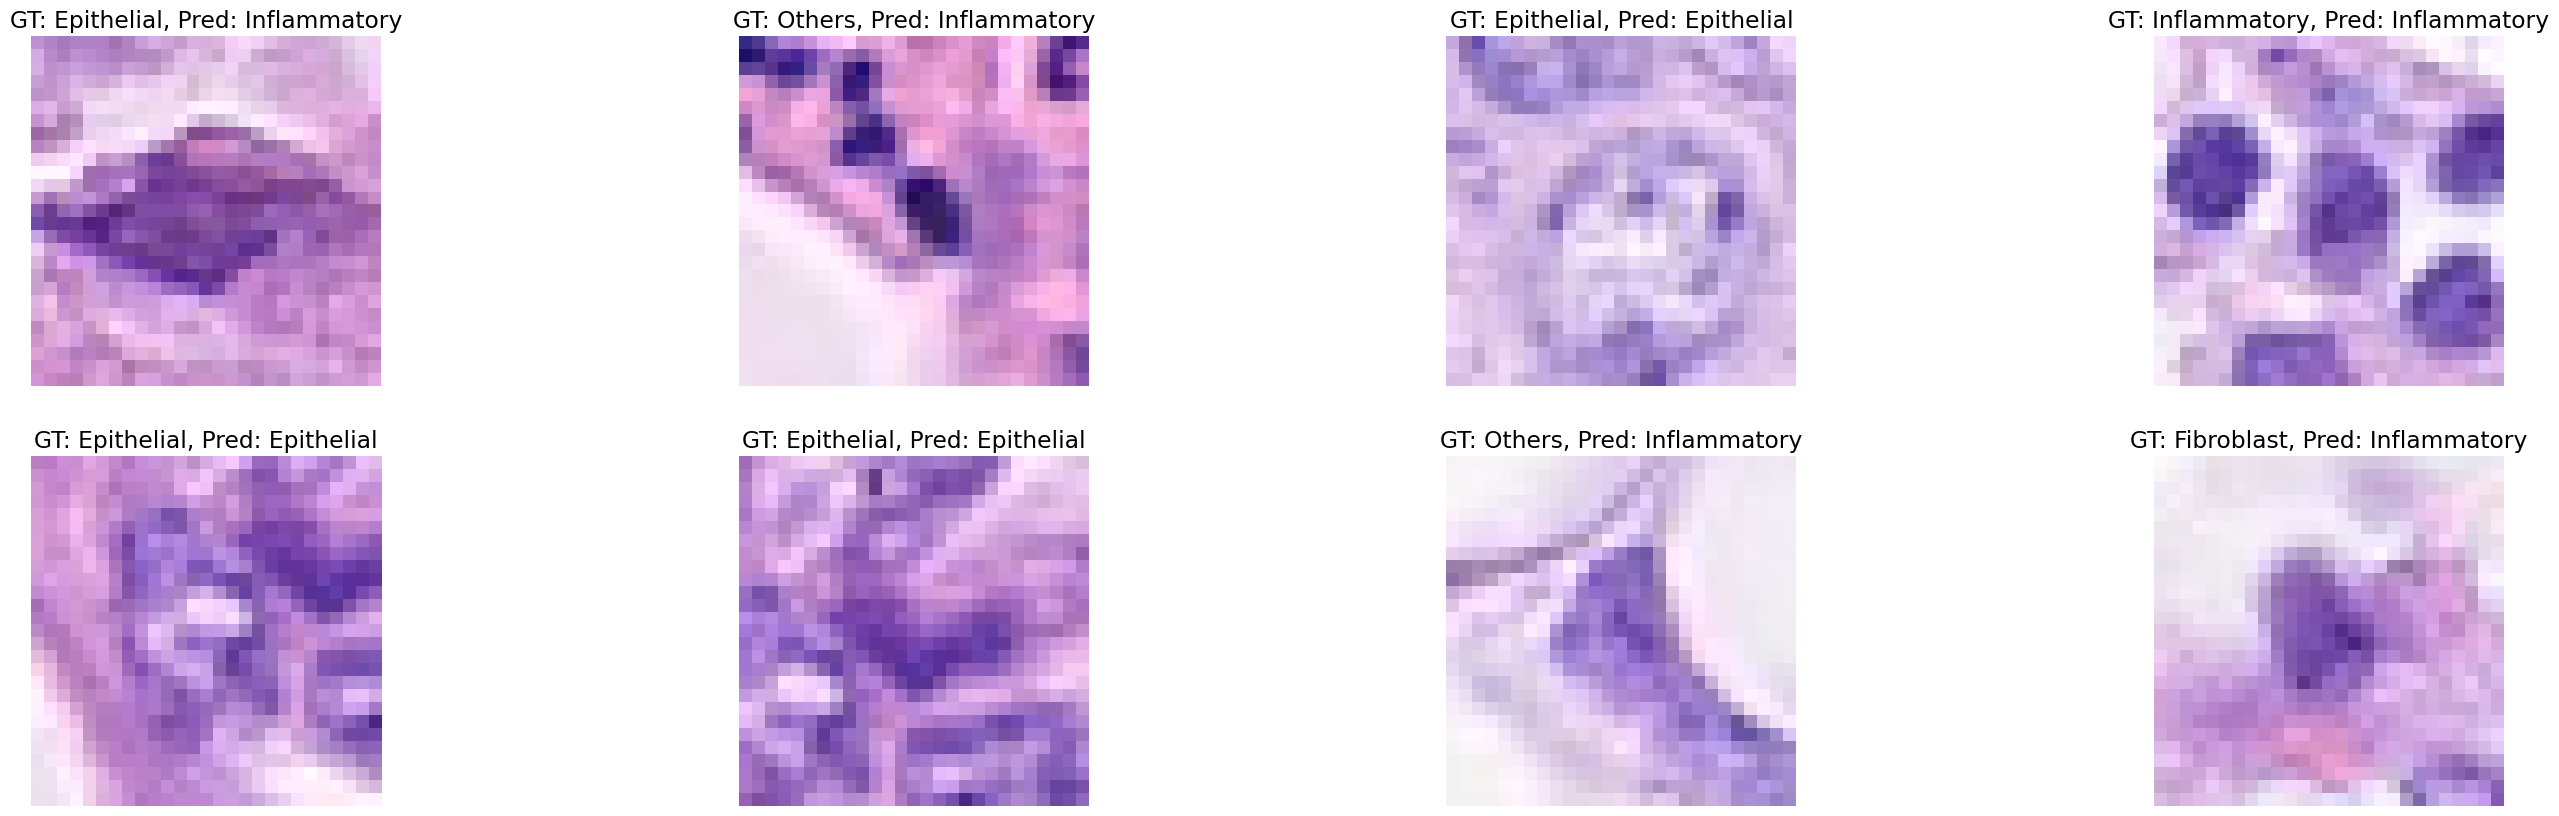

In [ ]:
cellType_label_names = {'Fibroblast': 0, 'Inflammatory': 1, 'Epithelial': 2, 'Others': 3}

# Create inverse mapping
d_inv = {v: k for k, v in cellType_label_names.items()}

# Plot model predictions on test data
plt.figure(figsize=(35, 10))
batches = 0

for x, y in cellType_base_nn_mlp_test_generator:
    batches += 1
    y_hat = cellType_base_nn_mlp_model.predict(x, verbose=0)
    x_img = np.squeeze(x)

    if batches <= 8:
        plt.subplot(2, 4, batches)
        plt.imshow(x_img)
        gt_label = d_inv[np.argmax(y[0])]
        pred_label = d_inv[np.argmax(y_hat[0])]
        plt.title(f"GT: {gt_label}, Pred: {pred_label}")
    else:
        break
    plt.axis('off')

## Predictions - MLP Base Model

Above are some printed predictions of the baseline MLP

- The model seems pretty bad at prediction the Cell Type with the model that has been trained appearing to default to Inflammatory if it gets confused
- Epithelial has a decent prediction success rate, appears to have been trained well

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

cellType_base_nn_mlp_test_generator.reset()
steps = len(cellType_base_logistic_test_data)
y_true_base = []
y_pred_raw_base = []
for _ in range(steps):
    x_batch, y_batch = next(cellType_base_nn_mlp_test_generator)
    y_hat_base = cellType_base_nn_mlp_model.predict(x_batch, verbose=0)

    y_true_base.append(np.argmax(y_batch[0]))
    y_pred_raw_base.append(np.argmax(y_hat_base[0]))
# Convert to arrays
y_true_base = np.array(y_true_base)
y_pred_class_base = np.array(y_pred_raw_base)

# Target class names
class_names = ['Fibroblast', 'Inflammatory', 'Epithelial', 'Others']

print("Classification Report for CellType Base MLP\n")
print(classification_report(y_true_base, y_pred_class_base, target_names=class_names))

Classification Report for CellType Base MLP

              precision    recall  f1-score   support

  Fibroblast       0.58      0.39      0.47       261
Inflammatory       0.46      0.84      0.59       432
  Epithelial       0.90      0.76      0.83       925
      Others       0.20      0.08      0.12       221

    accuracy                           0.64      1839
   macro avg       0.53      0.52      0.50      1839
weighted avg       0.67      0.64      0.63      1839



### Macro average Precision, Recall, F1score - MLP Base Model

- Precision: 0.53
- Recall: 0.52
- F1 Score: 0.50
    - Overall the classification performance is not great with a low F1 score of 0.50.
    - Definite room for improvement that can be achieved through Tuning

### Cell Type Model - Logistic Regression (multi) With tuning

Based on previous results in the Baseline Model. Some Tuning has been performed in the attempt to improve the model.

- Regularlisation L2 has been applied (0.0005) to help reduce overfitting
- Dropout (0.5) added after each dense layer which randomly disables 50% of the neurons during training. This will help prevent overfitting and the model "adapting"
- Batch Normalisation is applied after each Dense Layer which helps stabilise and accelerate the learning
- Optimiser + Learning Rate (0.0005). Adam is used as it is quite adaptive and effective which can help with convergence
- Class Weights is implemented due to class imbalance. This helps those that are underrepresented as shown in "Others" which is given a weight of 3.5

In [ ]:
cellType_base_nn_mlp_model_tuned = tf.keras.Sequential([
    # Flatten the 27x27x3 input
    tf.keras.layers.Flatten(input_shape=(27, 27, 3)),

    # First dense block
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    # Second dense block
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    # Output layer
    tf.keras.layers.Dense(4, activation='softmax')
])

cellType_base_nn_mlp_model_tuned.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy',
            Categorical_Precision(average='weighted'),
            Categorical_Recall(average='weighted'),
            Categorical_F1Score(num_classes=4, average='weighted')])

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

y_labels = cellType_base_logistic_train_data['cellType']

class_weight_dict = {
    0: 2,   # fibroblast
    1: 2,   # inflammatory
    2: 1,   # epithelial
    3: 3.5    # others
}
#confirm weight dictionary has been set correctly
print(class_weight_dict)

{0: 2, 1: 2, 2: 1, 3: 3.5}


In [ ]:
epochs = 50

cellType_base_nn_mlp_model_tuned_history = cellType_base_nn_mlp_model_tuned.fit(
    cellType_base_train_generator,
    epochs=epochs,
    validation_data=cellType_base_val_generator,
    class_weight=class_weight_dict,
    verbose=0
)

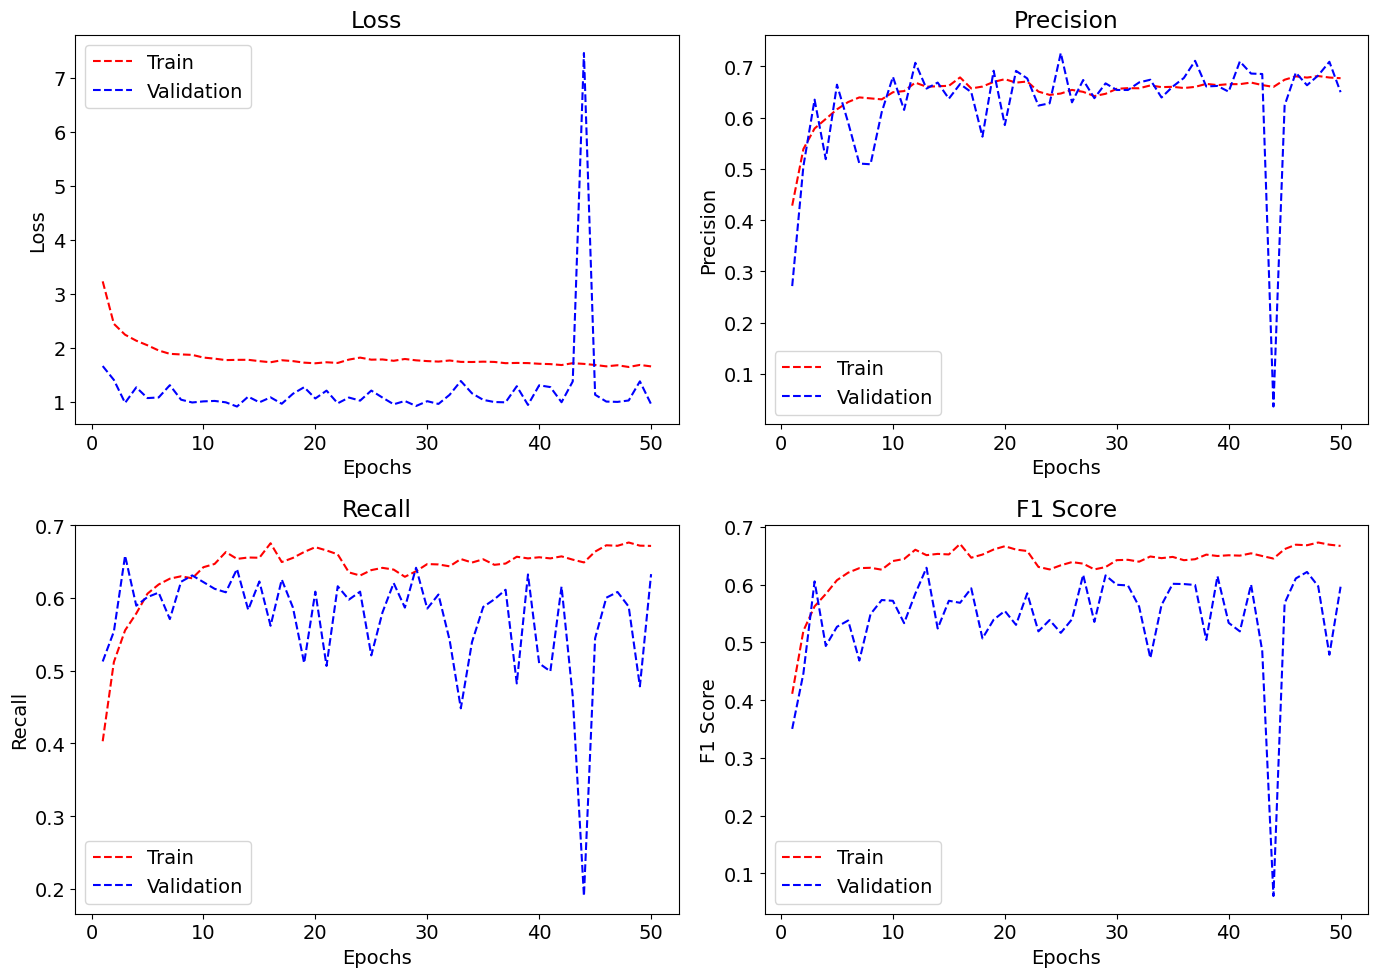

In [ ]:
plot_all_metrics_grid(cellType_base_nn_mlp_model_tuned_history.history)

### Training Curves - Baseline MLP tuned model

- Loss
    - Training loss shows convergence
    - Validation loss seems to be relatively stable except one really sharp spike inbetween 40-50 (Around 45 Epoch)
    - Shows to be more stable than baseline model
- Precision
    - Training precision is quite a stable smooth curve around 0.6-0.7
    - Validation seems to follow a similar trend except for around the 45 Epoch where there is a spike.
- Recall
    - Training seems stable with validation a little bit erratic with some variations. Slightly better performance than baseline but less stable
- F1 Score
    - F1 Training seems quite stable however the Validation is a little erratic too. Not too stable

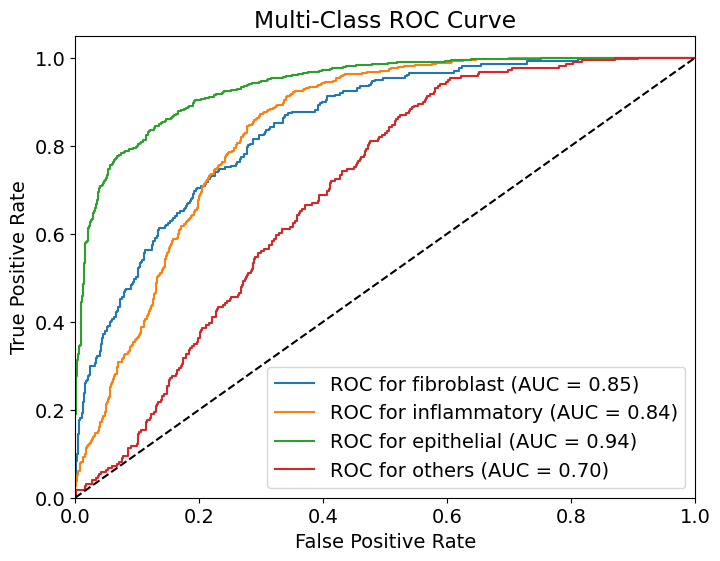

In [ ]:
plot_multiclass_roc(
    cellType_base_nn_mlp_model_tuned,
    cellType_base_test_generator,
    class_names=['fibroblast', 'inflammatory', 'epithelial', 'others']
)

### ROC Curve - Baseline MLP tuned model
Overall similar results but slightly worse results than the Baseline

181/181 [==============================] - 1s 7ms/step


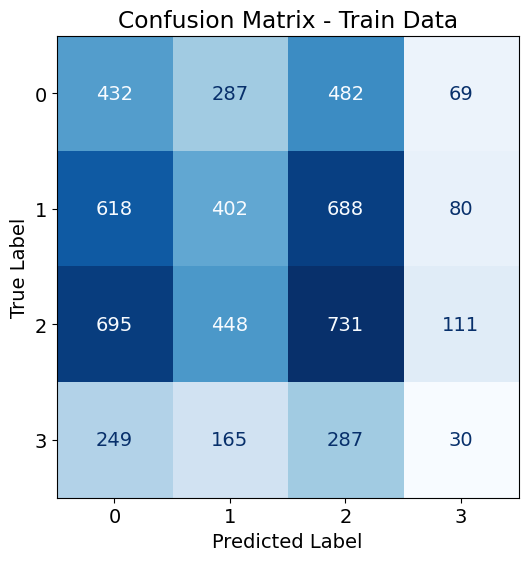

58/58 [==============================] - 0s 7ms/step


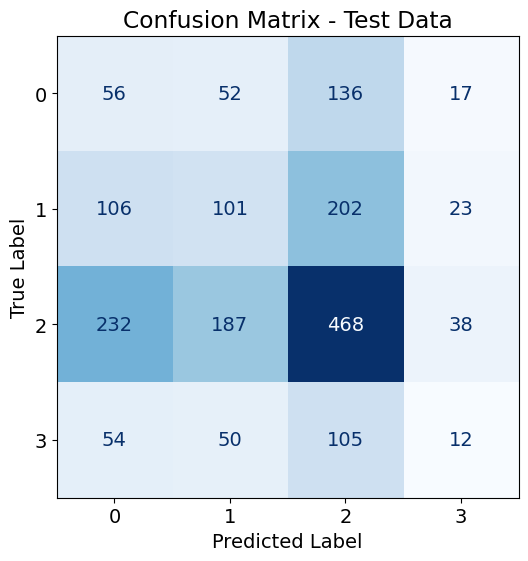

In [ ]:
# confusion matrix train
class_names = list(cellType_base_test_generator.class_indices.keys())
y_true_train = cellType_base_train_generator.classes
y_pred_probs_train = cellType_base_nn_mlp_model_tuned.predict(cellType_base_train_generator)
y_pred_train = np.argmax(y_pred_probs_train, axis=1)

cm_train = confusion_matrix(y_true_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp_train.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

y_true_test = cellType_base_test_generator.classes
y_pred_probs_test = cellType_base_nn_mlp_model_tuned.predict(cellType_base_test_generator)
y_pred_test = np.argmax(y_pred_probs_test, axis=1)


# confusion matrix Test
cm_test = confusion_matrix(y_true_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp_test.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Confusion Matrix - Baseline MLP tuned model

Model still is confused, in the Train data we see Fibroblast predicted Epithelial 482 times, Inflammatory misclassified Other classes such as Epithelial 688 times. In Test it's not any better. These matrices show that there are still lots of misclassifications where the model is over predicting Epithelial and Other is underperforming heavily. Additional Tuning or an alternative model is necessary to fix this

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
batch_size = 1

cellType_base_nn_mlp_test_generator = test_datagen.flow_from_dataframe(
    dataframe=cellType_base_logistic_test_data,
    directory='./patch_images/',
    x_col="ImageName",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    seed=42
)

Found 1839 validated image filenames belonging to 4 classes.


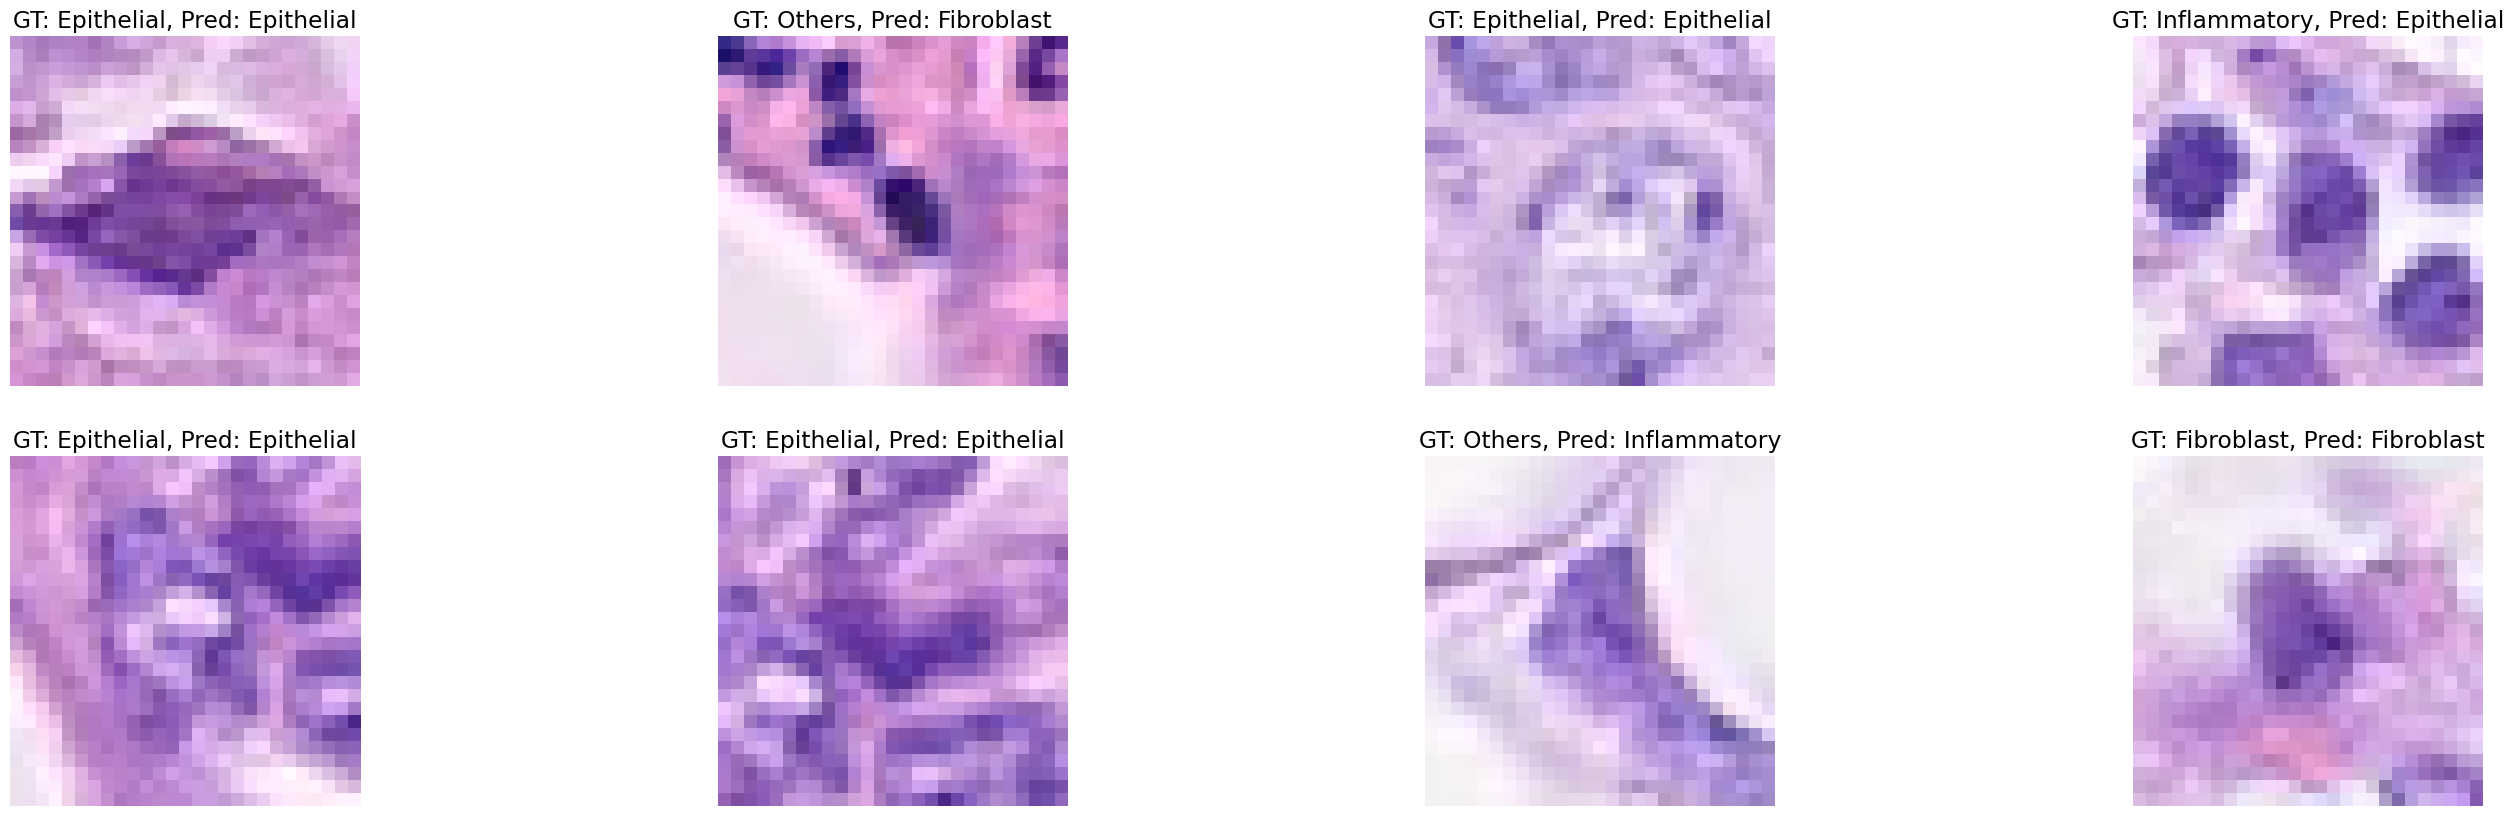

In [ ]:
cellType_label_names = {'Fibroblast': 0, 'Inflammatory': 1, 'Epithelial': 2, 'Others': 3}
d_inv = {v: k for k, v in cellType_label_names.items()}

plt.figure(figsize=(35, 10))
batches = 0

for x, y in cellType_base_nn_mlp_test_generator:
    batches += 1
    y_hat = cellType_base_nn_mlp_model_tuned.predict(x, verbose=0)
    x_img = np.squeeze(x)

    if batches <= 8:
        plt.subplot(2, 4, batches)
        plt.imshow(x_img)
        gt_label = d_inv[np.argmax(y[0])]
        pred_label = d_inv[np.argmax(y_hat[0])]
        plt.title(f"GT: {gt_label}, Pred: {pred_label}")
        plt.axis('off')
    else:
        break

### Predictions - Baseline MLP tuned model
Printing out these predictions show the model understands Epithelial well, however incorrect predicts for "others. Overall a poor result still.

In [ ]:
from sklearn.metrics import classification_report

# Reset
cellType_base_nn_mlp_test_generator.reset()

# number of steps
steps = len(cellType_base_logistic_test_data)

y_true = []
y_pred_raw = []

# Collect predictions and true labels
for i in range(steps):
    x, y = next(cellType_base_nn_mlp_test_generator)
    y_hat = cellType_base_nn_mlp_model_tuned.predict(x, verbose=0)

    y_true.append(np.argmax(y[0]))
    y_pred_raw.append(np.argmax(y_hat[0]))

# Convert to arrays
y_true = np.array(y_true)
y_pred_class = np.array(y_pred_raw)

# Classification report
print("Classification Report for CellType Base MLP with Tuning\n")
print(classification_report(y_true, y_pred_class, target_names=['Fibroblast', 'Inflammatory', 'Epithelial', 'Others']))

Classification Report for CellType Base MLP with Tuning

              precision    recall  f1-score   support

  Fibroblast       0.39      0.67      0.49       261
Inflammatory       0.53      0.48      0.51       432
  Epithelial       0.86      0.85      0.86       925
      Others       0.16      0.06      0.09       221

    accuracy                           0.64      1839
   macro avg       0.48      0.52      0.49      1839
weighted avg       0.63      0.64      0.63      1839



### Macro average Precision, Recall, F1 Score - Baseline MLP tuned model

- Precision: 0.48
- Recall: 0.52
- F1 Score: 0.49
- Overall the performance is still quite poor, actually performing worse than the baseline model. Further tuning is necessary



### MLP vs MLP with Tuning Conclusion

Overall performance for the Neural Network is quite poor where on average it had an F1 Score of 0.50. It is quite unstable, showcases lots of spikes and even with Tuning still shows overfitting and poor generalisation. A different model will be needed to better classify CellTypes


### Baseline Development - CNN for CellType

CNN is chosen as the next Baseline Model and is better than the MLP model. This is because it automates feature selection using convolution filters thus not needing to do manual preprocessing. It also reduces parameters through connectivity and sharing and has improved performance avoiding sigmoid saturation with ReLu activation thus making it more efficient and reducing overfitting risk. reLu also helps achieve a faster convergence

In [ ]:
INPUT_DIM = (27, 27, 3)
OUTPUT_CLASSES = 4  # Fibroblast, Inflammatory, Epithelial, Others

# Define CNN model
cellType_base_cnn_model = tf.keras.Sequential([

    # First convolutional block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_DIM),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten feature maps
    tf.keras.layers.Flatten(),

    # Fully connected layer
    tf.keras.layers.Dense(64, activation='relu'),

    # Output layer with softmax for multi-class classification
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax')
])

# Compile model
cellType_base_cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy',
            Categorical_Precision(average='weighted'),
            Categorical_Recall(average='weighted'),
            Categorical_F1Score(num_classes=4, average='weighted')])

# Show architecture
cellType_base_cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 64)               

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale [0, 1]
datagen = ImageDataGenerator(rescale=1./255)

# Set batch size
batch_size = 32

# Training generator
train_cellType_generator = datagen.flow_from_dataframe(
    dataframe=cellType_base_logistic_train_data,
    directory='./patch_images/',
    x_col="ImageName",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

# Validation generator
val_cellType_generator = datagen.flow_from_dataframe(
    dataframe=cellType_base_logistic_val_data,
    directory='./patch_images/',
    x_col="ImageName",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

test_cellType_generator = datagen.flow_from_dataframe(
    dataframe=cellType_base_logistic_test_data,
    directory='./patch_images/',
    x_col="ImageName",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

Found 5774 validated image filenames belonging to 4 classes.
Found 2283 validated image filenames belonging to 4 classes.
Found 1839 validated image filenames belonging to 4 classes.


In [ ]:
epochs = 50

history_cnn_cellType = cellType_base_cnn_model.fit(train_cellType_generator,
    epochs=epochs,
    validation_data=val_cellType_generator,
    verbose=0
)

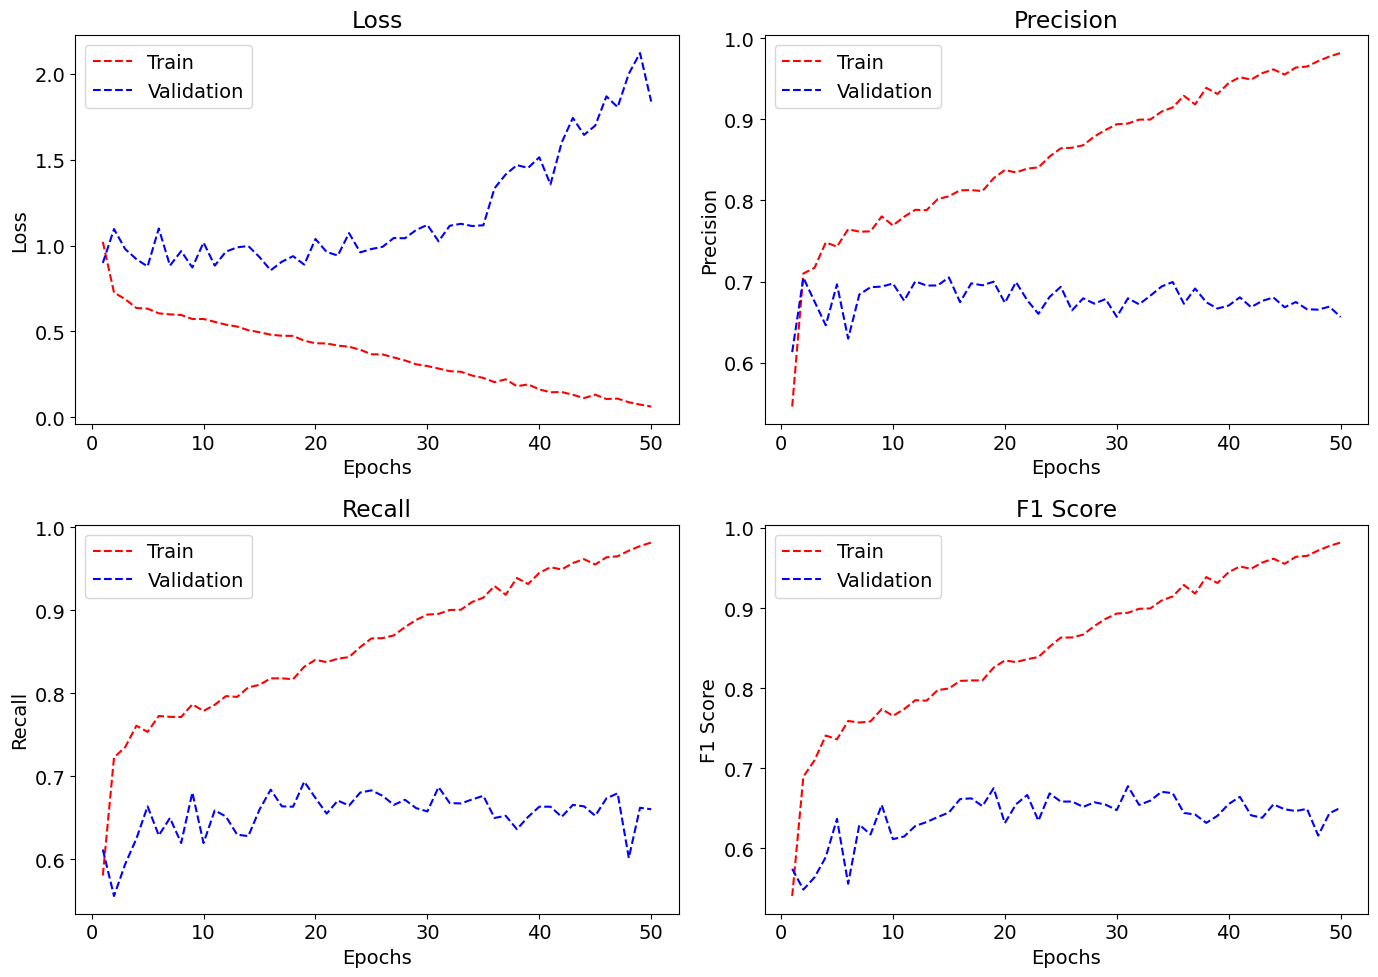

In [ ]:
plot_all_metrics_grid(history_cnn_cellType.history)

### Learning Curves - CNN Base Model
- Loss training is steadily decreasing however with validation it increase after around the 10-15 epoch mark. This shows overfitting meaning the model is memorising the training data
- Precision for Training is quite good almost reaching 1, validation however seems to plateau around 0.7. This suggests to us that the model isn't really improving after the first few epoch iterations
- Training Recall is quite good almost reaching 1.0, validation however like precision does plateau around 0.65 suggesting the model is unable to figure out the relevant instances even though the training showed good results
- F1 score for Training also approaches 1.0 which is good, however Validation it plateaus around 0.65 too
- Overall it appears to be overfitting in Validation

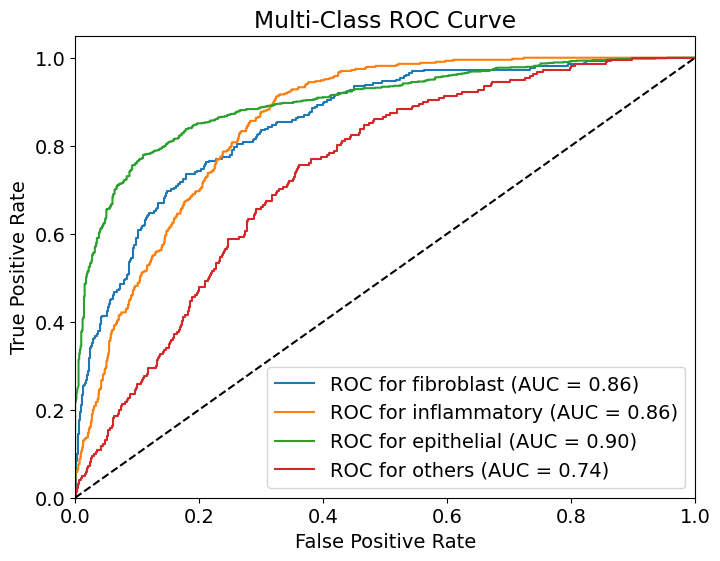

In [ ]:
plot_multiclass_roc(
    cellType_base_cnn_model,
    test_cellType_generator,
    class_names=['fibroblast', 'inflammatory', 'epithelial', 'others']
)

### Multi-class ROC - CNN Base Model

- The Multi-Class ROC curve shows that overall the class types can predict quite well except for Others which has a lower AUC score.

181/181 [==============================] - 1s 8ms/step


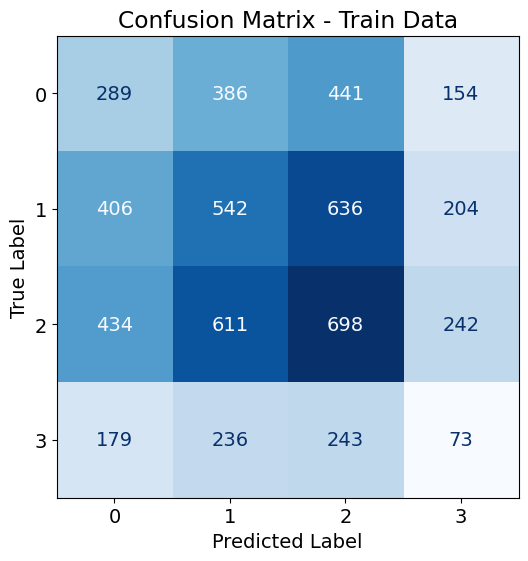

58/58 [==============================] - 0s 7ms/step


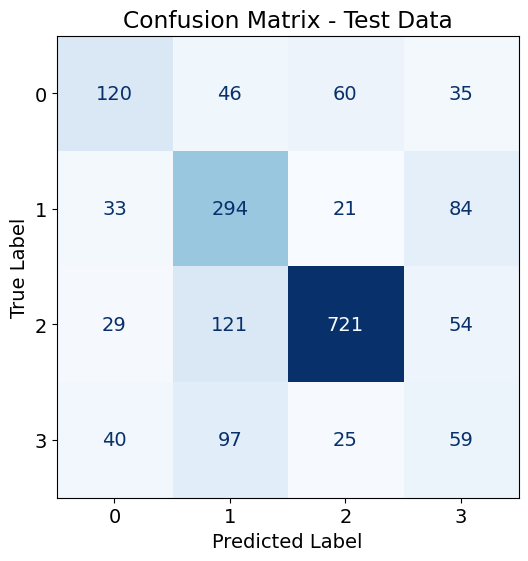

In [ ]:
class_names = list(train_cellType_generator.class_indices.keys())

#Train
y_true_train = train_cellType_generator.classes
y_pred_probs_train = cellType_base_cnn_model.predict(train_cellType_generator)
y_pred_train = np.argmax(y_pred_probs_train, axis=1)

cm_train = confusion_matrix(y_true_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_names)

fig, ax = plt.subplots(figsize=(8, 6))
disp_train.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
#Test
y_true_test = test_cellType_generator.classes
y_pred_probs_test = cellType_base_cnn_model.predict(test_cellType_generator)
y_pred_test = np.argmax(y_pred_probs_test, axis=1)

cm_test = confusion_matrix(y_true_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_names)

fig, ax = plt.subplots(figsize=(8, 6))
disp_test.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Confusion matrix - CNN Base Model

There is high misclassification with all classes especially around Fibroblast and Others during Training. Class confusion overall seems to be not as bad in the test set. Overall this shows that the CNN model is performing significantly better than MLP. This is most likely due to its ability to extra features better from the images

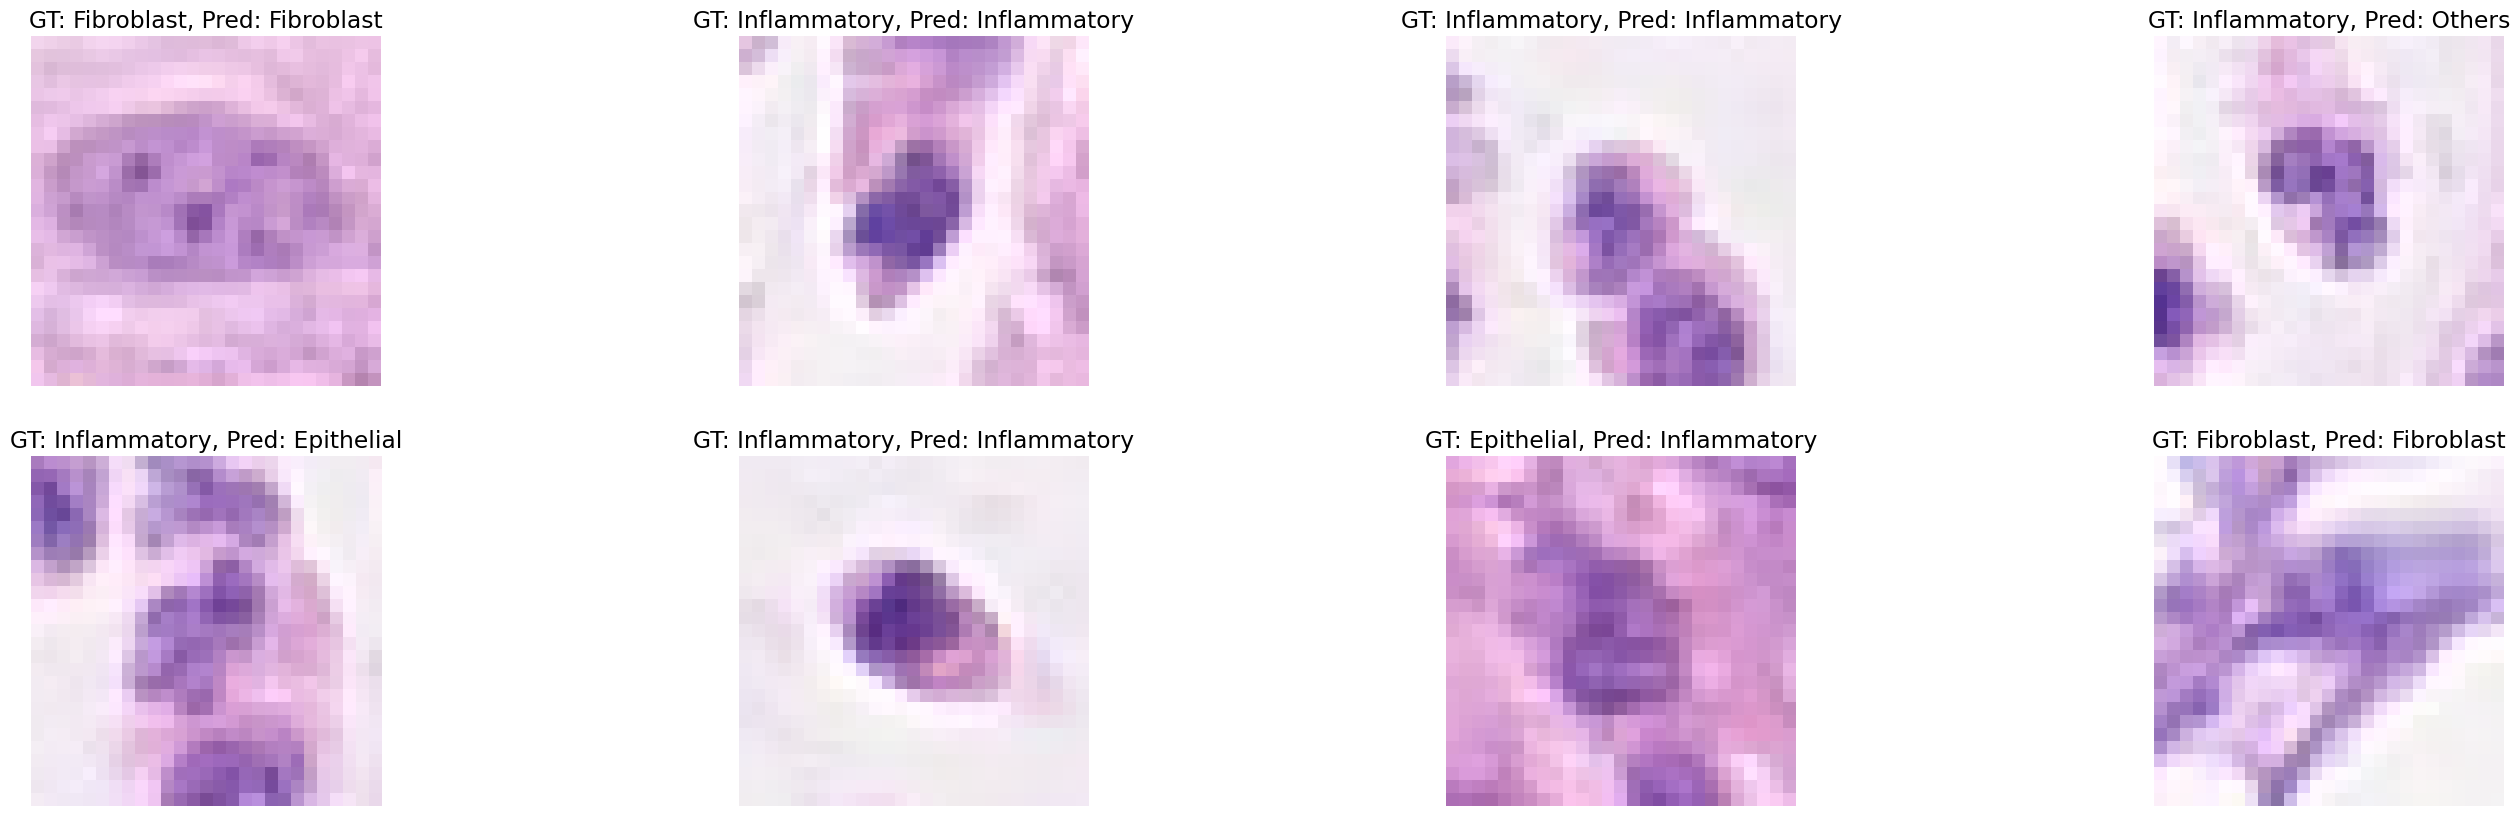

In [ ]:
cellType_label_names = {'Fibroblast': 0, 'Inflammatory': 1, 'Epithelial': 2, 'Others': 3}
d_inv = {v: k for k, v in cellType_label_names.items()}

plt.figure(figsize=(35, 10))
batches = 0

for x, y in test_cellType_generator:
    batches += 1
    y_hat = cellType_base_cnn_model.predict(x, verbose=0)
    x_img = np.squeeze(x[0])  # take the first image in batch

    if batches <= 8:
        plt.subplot(2, 4, batches)
        plt.imshow(x_img)
        gt_label = d_inv[np.argmax(y[0])]
        pred_label = d_inv[np.argmax(y_hat[0])]
        plt.title(f"GT: {gt_label}, Pred: {pred_label}")
        plt.axis('off')
    else:
        break

### Predicted CellTypes - CNN Base Model

Overall it appears the CNN can predict quite accurately with Fibroblast and Inflammatory but struggles when comparing with Epithelial and Others. Tuning should be applied to assist with the more ambiguous images

In [ ]:
# Reset
test_cellType_generator.reset()

# Calculate number of steps
steps = len(cellType_base_logistic_test_data) // batch_size
if len(cellType_base_logistic_test_data) % batch_size != 0:
    steps += 1

y_true = []
y_pred_raw = []

for i in range(steps):
    x_batch, y_batch = next(test_cellType_generator)
    y_hat = cellType_base_cnn_model.predict(x_batch, verbose=0)

    y_true.extend(y_batch)
    y_pred_raw.extend(y_hat)

# lists to numpy arrays
y_true = np.array(y_true)
y_pred_raw = np.array(y_pred_raw)

# Convert probabilities to class labels
y_pred_class = np.argmax(y_pred_raw, axis=1)
y_true_class = np.argmax(y_true, axis=1)

print("Classification Report for CellType Base CNN\n")
print(classification_report(y_true_class, y_pred_class, target_names=['Fibroblast', 'Inflammatory', 'Epithelial', 'Others']))

Classification Report for CellType Base CNN

              precision    recall  f1-score   support

  Fibroblast       0.54      0.46      0.50       261
Inflammatory       0.53      0.68      0.59       432
  Epithelial       0.87      0.78      0.82       925
      Others       0.25      0.27      0.26       221

    accuracy                           0.65      1839
   macro avg       0.55      0.55      0.54      1839
weighted avg       0.67      0.65      0.66      1839



### Macro Average Precision, Recall, F1-Score - CNN Base Model
- Precision: 0.55
- Recall: 0.55
- F1-Score: 0.54
    - Overall slightly better performance than the MLP model (which had an F1 of 0.50). Macro average values suggest that there are some improvements to having the classes balanced, but tuning will be needed to help achieve this

### Deep Neural Network (CNN) Tuned for CellType

Using the information derived from the Base model CNN before, some tuning has been done to help improve this model to get a better result

- Two convolution blocks are used with ReLu activations and L2 Regularlisation (0.001). This is used to help extract spatial features from the input images. ReLu helps speed up Convergence while l2 Regularlisation helps prevent overfitting
- Batch Normalisation is used to help stabilise and regularlise the model
- Dropout (0.3 for Block 1 and 0.4 for Block 2) randomly drops connections during training to prevent overfitting and encourage generalisation
- Reduced Neurons
- Adam Optimiser is used with a lower learning rate of 0.0003 to stabilise the training
- Class Weights for imbalance handling is used with extra preference with "Others".

In [ ]:
INPUT_DIM = (27, 27, 3)
NUM_CLASSES = 4

# Refined CNN model
cellType_base_cnn_model_tuned = tf.keras.Sequential([
    # Block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=INPUT_DIM),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    # Block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.4),

    # Flatten and Dense
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    # Output Layer
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# Summary
cellType_base_cnn_model_tuned.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 27, 27, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 27, 27, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 27, 27, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 27, 27, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                      

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    data_format='channels_last',

    # Geometric augmentations
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',

    # Colour augmentations
    brightness_range=[0.8, 1.2],
    channel_shift_range=20.0
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    data_format='channels_last'
)

batch_size = 32

# Training data generator
train_cellType_generator = train_datagen.flow_from_dataframe(
    dataframe=cellType_base_logistic_train_data,
    directory='./patch_images/',
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

# Validation data generator
val_cellType_generator = val_datagen.flow_from_dataframe(
    dataframe=cellType_base_logistic_val_data,
    directory='./patch_images/',
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

Found 5774 validated image filenames belonging to 4 classes.
Found 2283 validated image filenames belonging to 4 classes.


In [ ]:
cellType_base_cnn_model_tuned.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
    metrics=['accuracy',
            Categorical_Precision(average='weighted'),
            Categorical_Recall(average='weighted'),
            Categorical_F1Score(num_classes=4, average='weighted')])

In [ ]:
class_weight_dict = {
    0: 2.5,   # Fibroblast
    1: 1.8,   # Inflammatory
    2: 1.0,   # Epithelial
    3: 4.0    # Others
}

In [ ]:
epochs = 50

history_cnn_cellType_tuned = cellType_base_cnn_model_tuned.fit(
    train_cellType_generator,
    epochs=epochs,
    validation_data=val_cellType_generator,
    verbose=0,
    class_weight=class_weight_dict
)

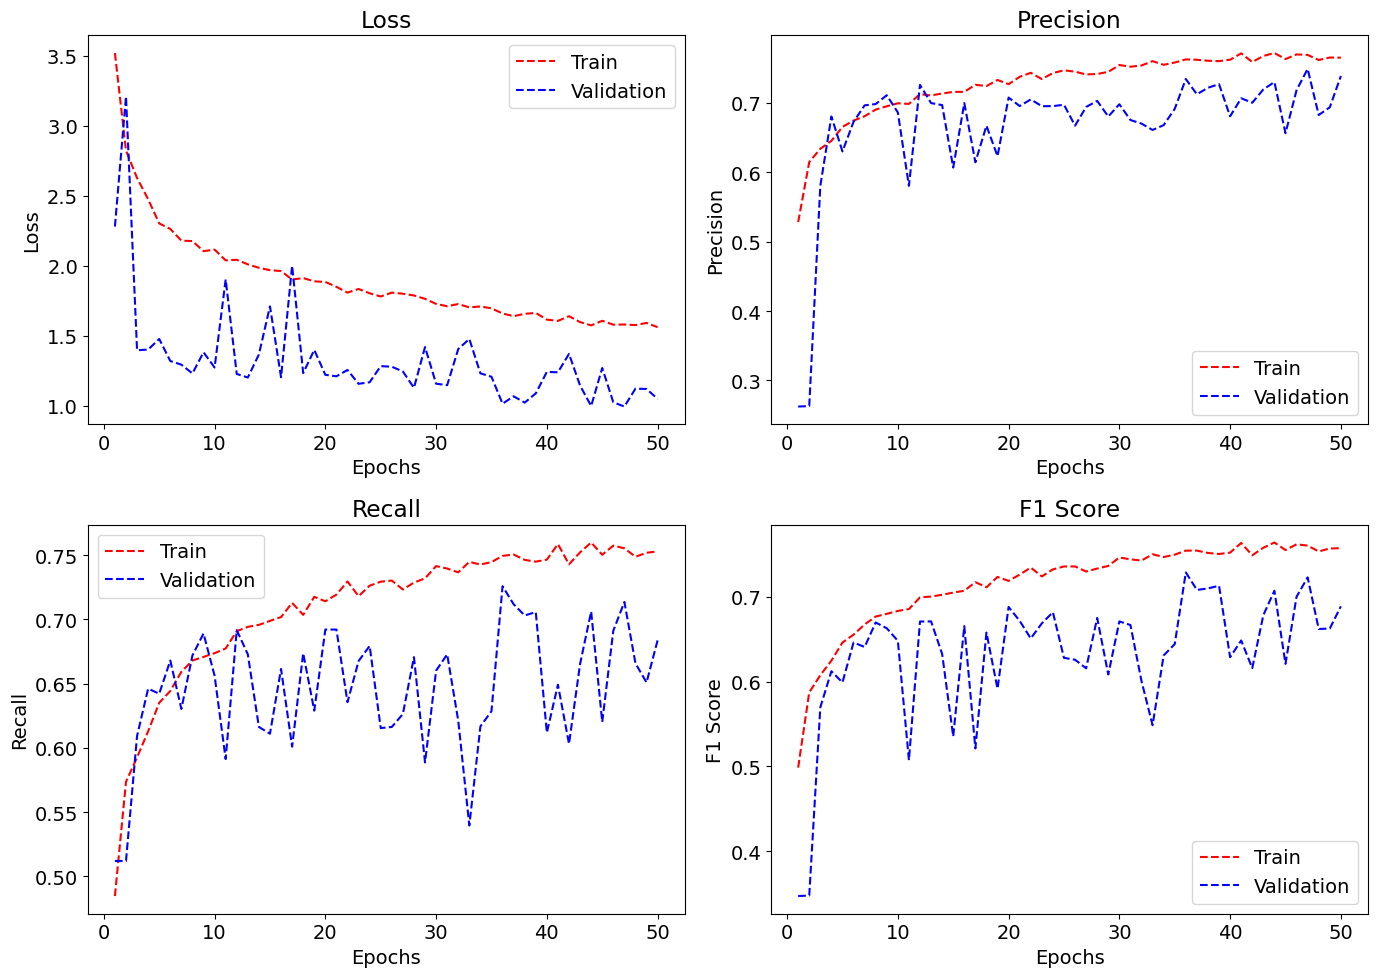

In [ ]:
plot_all_metrics_grid(history_cnn_cellType_tuned.history)

### Training Performance - CNN with Tuning
- Loss steadily decreases however validation fluctuates more most likely due to the drop out
- Precision have similar trends for both training and validation which is good, it has a high value which suggests there aren't too many false positives
- Recall for Training is consistent around the 0.75 range however fluctuates a lot through validation
- F1 score is strong in train however is a lot more variable with Validation

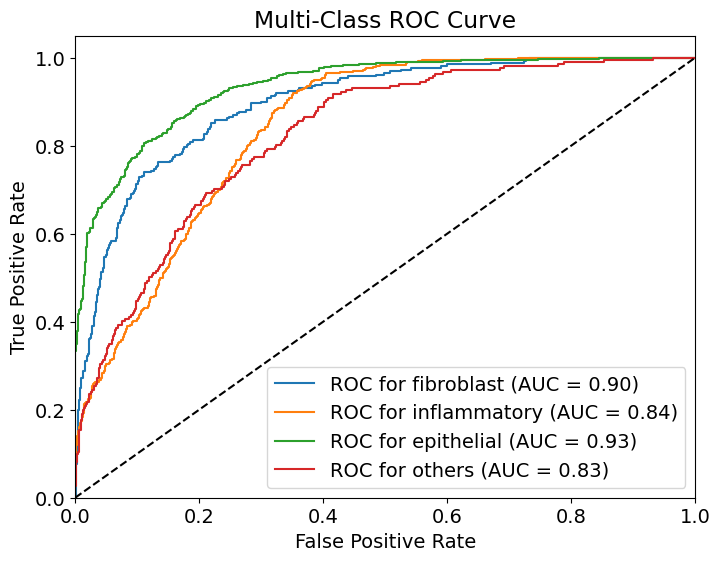

In [ ]:
plot_multiclass_roc(
    cellType_base_cnn_model_tuned,
    test_cellType_generator,
    class_names=['fibroblast', 'inflammatory', 'epithelial', 'others']
)

### Multi-Class ROC Curve - CNN with Tuning

- Overall the model performance is quite strong with all values about 0.83 for the Cell Types
- This model shows that it has improved class discrimination, with AUC scores closer to 1.0 now it means that the true positives are ranked a lot higher now than the false positives

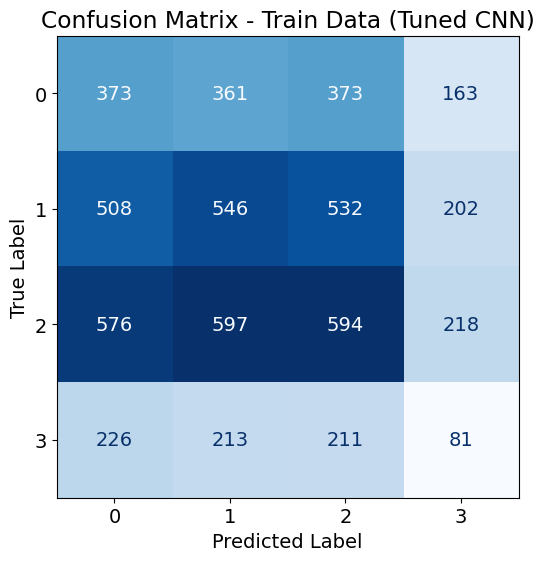

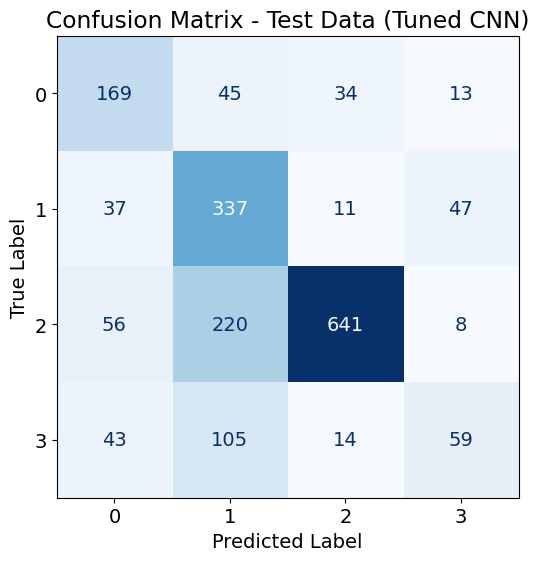

In [ ]:
class_names = list(train_cellType_generator.class_indices.keys())

train_cellType_generator.reset()
y_true_train = train_cellType_generator.classes

y_pred_probs_train = cellType_base_cnn_model_tuned.predict(train_cellType_generator, verbose=0)
y_pred_train = np.argmax(y_pred_probs_train, axis=1)

cm_train = confusion_matrix(y_true_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_names)

fig, ax = plt.subplots(figsize=(8, 6))
disp_train.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
plt.title('Confusion Matrix - Train Data (Tuned CNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

test_cellType_generator.reset()
y_true_test = test_cellType_generator.classes

y_pred_probs_test = cellType_base_cnn_model_tuned.predict(test_cellType_generator, verbose=0)
y_pred_test = np.argmax(y_pred_probs_test, axis=1)

cm_test = confusion_matrix(y_true_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_names)

fig, ax = plt.subplots(figsize=(8, 6))
disp_test.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
plt.title('Confusion Matrix - Test Data (Tuned CNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Confusiong Matrix - CNN with Tuning

- Overall this Matrix shows improvement from the Base model with "Others" still being the weakest.
- Class confusion is still present with class overlap evident in Epithelial and Inflammatory still

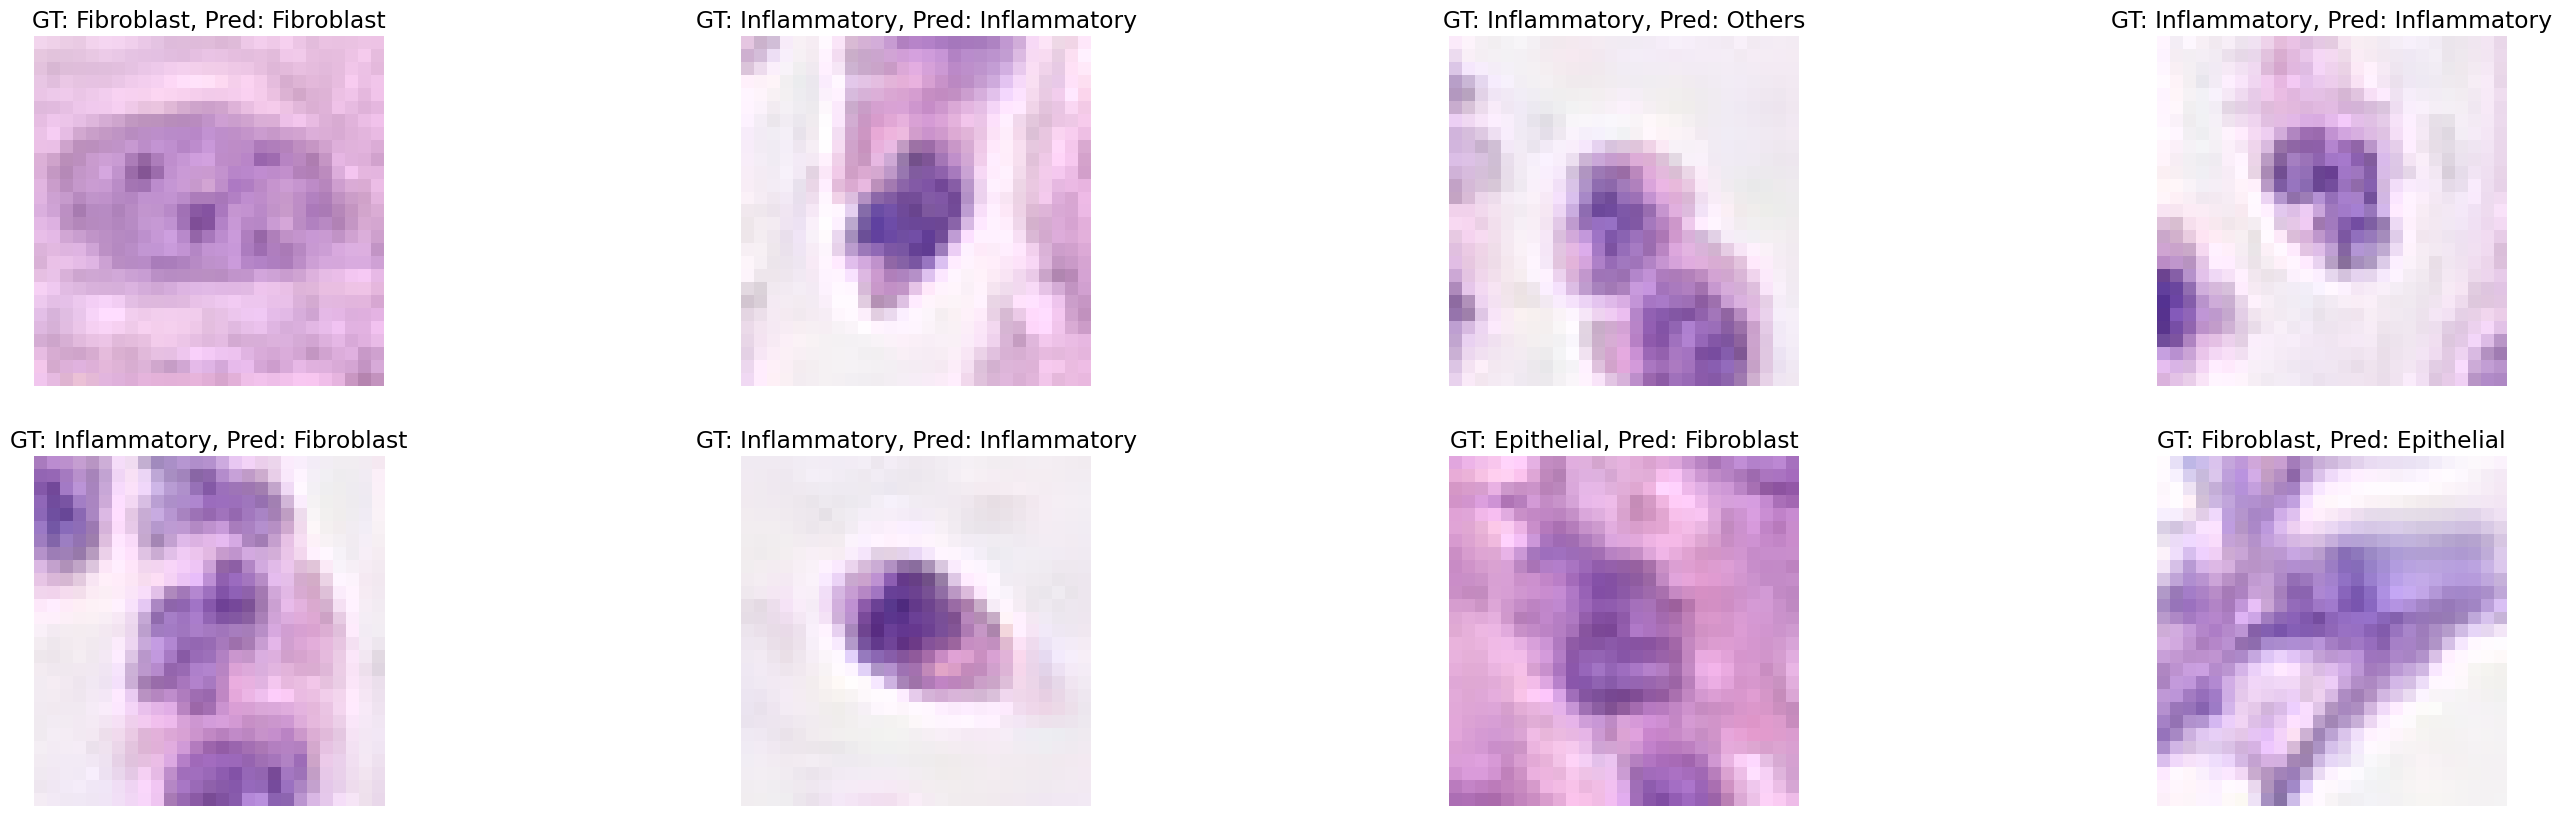

In [ ]:
cellType_label_names = {'Fibroblast': 0, 'Inflammatory': 1, 'Epithelial': 2, 'Others': 3}
d_inv = {v: k for k, v in cellType_label_names.items()}

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(35, 10))
batches = 0

for x, y in test_cellType_generator:
    batches += 1
    y_hat = cellType_base_cnn_model_tuned.predict(x, verbose=0)
    x_img = np.squeeze(x[0])  # take first image in batch

    if batches <= 8:
        plt.subplot(2, 4, batches)
        plt.imshow(x_img)
        gt_label = d_inv[np.argmax(y[0])]
        pred_label = d_inv[np.argmax(y_hat[0])]
        plt.title(f"GT: {gt_label}, Pred: {pred_label}")
        plt.axis('off')
    else:
        break

### Predicted Images - CNN with Tuning

- CNN has learned some of the cell Types with mixed results of success.
- Mistakes are still occuring around Inflammatory vs Others and Fibroblast vs Epithelial

In [ ]:
# Reset
test_cellType_generator.reset()

steps = len(cellType_base_logistic_test_data) // batch_size
if len(cellType_base_logistic_test_data) % batch_size != 0:
    steps += 1
y_true = []
y_pred_raw = []

for i in range(steps):
    x_batch, y_batch = next(test_cellType_generator)
    y_hat = cellType_base_cnn_model_tuned.predict(x_batch, verbose=0)

    y_true.extend(y_batch)
    y_pred_raw.extend(y_hat)

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred_raw = np.array(y_pred_raw)

# Convert to class labels0
y_pred_class = np.argmax(y_pred_raw, axis=1)
y_true_class = np.argmax(y_true, axis=1)

# Print classification report
print("Classification Report for CellType Base CNN with Tuning\n")
print(classification_report(
    y_true_class,
    y_pred_class,
    target_names=['Fibroblast', 'Inflammatory', 'Epithelial', 'Others']
))

Classification Report for CellType Base CNN with Tuning

              precision    recall  f1-score   support

  Fibroblast       0.55      0.65      0.60       261
Inflammatory       0.48      0.78      0.59       432
  Epithelial       0.92      0.69      0.79       925
      Others       0.46      0.27      0.34       221

    accuracy                           0.66      1839
   macro avg       0.60      0.60      0.58      1839
weighted avg       0.71      0.66      0.66      1839



### Macro average - CNN with Tuning

- Precision: 0.60
- Recall 0.60
- F1-Score: 0.58
    - The Macro Average F1 score is the best at 0.58, but there is definitely a lot of room for improvement as shown in Others with only having an F1-score of 0.34. Compared to the other models (MLP, MLP Tuned and CNN) this is the most balanced model yet with slightly better generalisation. It is more balanced as seen with similar results for Precision & Recall


### CellType Final Model Selection - CNN with Tuning ( L2 Regularlisation, Dropout, Class Weights)

- Justification:
    - Achieved the highest Macro Average Precision, Recall and F1 score across all the tested models
    - Better at handling class imbalances through using Weights
    - Overall the model is more stable and balanced by effectively reducing false positives without significantly impacting false negatives which can be seen in the high ROC AUC values.
- Improvements
    - Lots of different Tuning methods were used to improve the result, it is unclear which hyperparameter tuning best influenced this improvement due to all tuning being done at once on the tuned model.
    - It is clear comparing the CNN tuned model, an improvement F1score from 0.54 (base CNN model) to 0.66 (CNN model with Tuning) that the hyperparameter tuning has improved the model.
    - Generalisation and robustness was ensured by using the different subsets. This included using a Validation dataset at the end to validate the results

### Extra Data Extension

- Semi-Supervised learning is a form of machine learning which gets an amount of labeled and unlabeled data during training. It can then use the unlabeled data to help improve accuracy (and other metrics) which is the inbetween supervised (labeled) and unsupervised (unlabeled) learning

- In this assignment, we have trained the models using the labeled data. What we can do now is use the unlabeled data saved as "extraData" and use it to help improve the metrics that we have been using throughout this assignment to get a better result. Using the best model from before (CNN with Tuning), this model is used to predict and label the extra data.

- By doing this semi-supervised learning, it can significantly increase the amount of training data, improve performance and robustness while encouraging better generalisation. However, there runs the risk that if the labels were incorrectly matched, it could generate noise and reinforce errors that would otherwise have been overlooked.

#### Real World Use cases
- A real world use case of using Semi-Supervised learning is Autonomous Vehicles. It can help process sensor data to allow the vehicle to make appropriate decisions. Another example is in China, there is a multi-center pathology centre that can help accurately predict colorectal cancer (Bowel Cancer) (Reference 3)
- Semi-supervised methods is helpful in many ways. Firstly if the data is hard or expensive to acquire, it removes the need to do this. It helps improve generalisation and also help improve the model accuracy, especially when there is limited data available. This can all work together to help improve and boost the Model performance

In [ ]:
extra_data = pd.read_csv('data_labels_extraData.csv')

In [ ]:
predict_datagen = ImageDataGenerator(rescale=1./255)

predict_cellType_generator = predict_datagen.flow_from_dataframe(
    dataframe=extra_data,
    directory='./patch_images/',
    x_col='ImageName',
    y_col= None,
    target_size=(27, 27),
    class_mode=None,
    batch_size=32,
    shuffle=False
)

Found 10384 validated image filenames.


In [ ]:
# Predict using the trained CNN model
predictions = cellType_base_cnn_model_tuned.predict(predict_cellType_generator, verbose=1)

# Get predicted class
predicted_class_indices = np.argmax(predictions, axis=1)

class_names = ['fibroblast', 'inflammatory', 'epithelial', 'others']
predicted_class_names = [class_names[i] for i in predicted_class_indices]

extra_data['cellType'] = predicted_class_indices
extra_data['cellTypeName'] = predicted_class_names

if 'predicted_class_index' in extra_data.columns:
    extra_data = extra_data.drop(columns=['predicted_class_index'])

# Save DataFrame
extra_data.to_csv('data_labels_extraData_predictions.csv', index=False)

325/325 [==============================] - 5s 15ms/step


In [ ]:
# Load the original and extra data
main_df = pd.read_csv("data_labels_mainData.csv")
extra_df = pd.read_csv("data_labels_extraData_predictions.csv")

combined_df = pd.concat([main_df, extra_df], ignore_index=True)

# Save combined dataset
combined_df.to_csv("data_labels_NewData.csv", index=False)

In [ ]:
cellType_base_main_data_new = pd.read_csv('data_labels_newData.csv')
print(cellType_base_main_data_new.head())

   InstanceID  patientID  ImageName cellTypeName  cellType  isCancerous
0       22405          1  22405.png   fibroblast         0            0
1       22406          1  22406.png   fibroblast         0            0
2       22407          1  22407.png   fibroblast         0            0
3       22408          1  22408.png   fibroblast         0            0
4       22409          1  22409.png   fibroblast         0            0


### What has just happened

- The Extra data was imported
- The CNN tuned model was used to predict the class
- This was exported as a file
- The Original data + Extra data file are merged into one getting it ready to be used to continue training the CNN Model


Cell Type Base Model - CNN (New Data): Splitting into Train, Validation, and Test sets (by patientID):
Training data: 11523 samples from 58 patients
Validation data: 4801 samples from 20 patients
Test data: 3956 samples from 20 patients

Cell Type Base CNN Model: Class Distribution for Train, Validation, and Test sets:


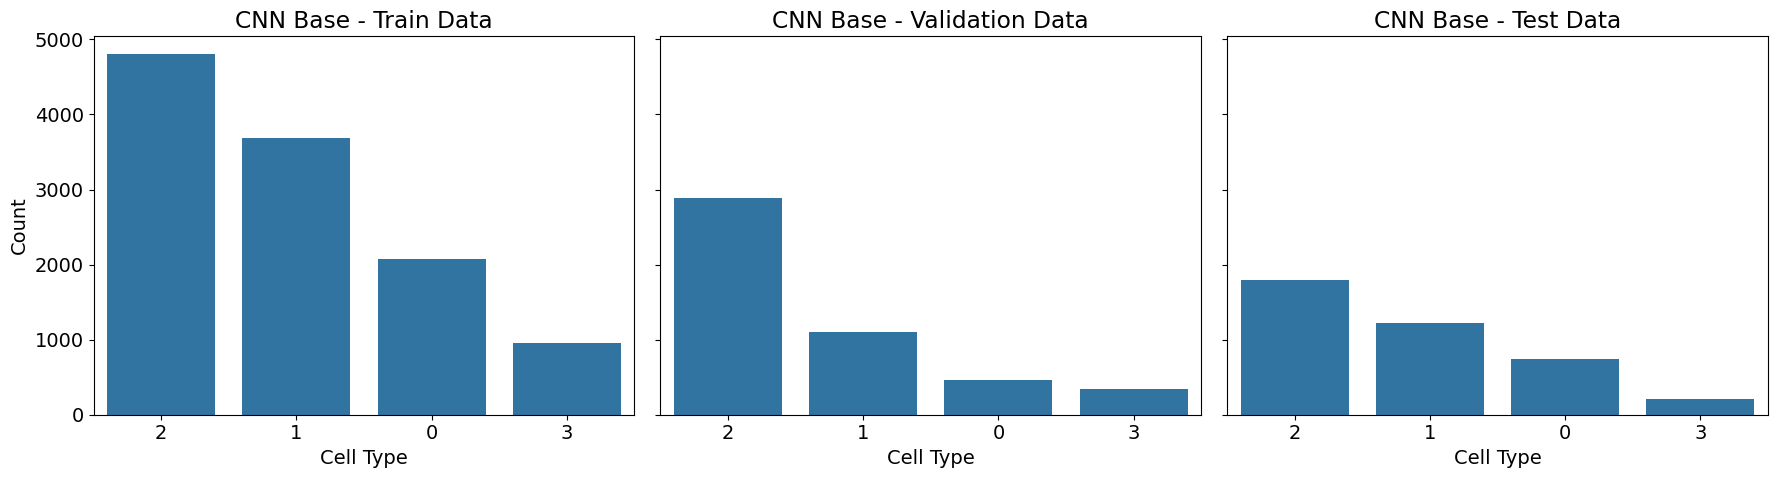

In [ ]:
print("\nCell Type Base Model - CNN (New Data): Splitting into Train, Validation, and Test sets (by patientID):")

# Unique
cellType_unique_patients = cellType_base_main_data_new['patientID'].unique()

# Split
cellType_base_train_patients, cellType_base_test_patients = train_test_split(
    cellType_unique_patients, test_size=0.2, random_state=42
)

# split into training and validation
cellType_base_train_patients, cellType_base_val_patients = train_test_split(
    cellType_base_train_patients, test_size=0.25, random_state=42
)

# Create splits
with pd.option_context('mode.chained_assignment', None):
    # Training set
    cellType_base_cnn_train_data = cellType_base_main_data_new[
        cellType_base_main_data_new['patientID'].isin(cellType_base_train_patients)
    ]
    # Validation set
    cellType_base_cnn_val_data = cellType_base_main_data_new[
        cellType_base_main_data_new['patientID'].isin(cellType_base_val_patients)
    ]
    # Test set
    cellType_base_cnn_test_data = cellType_base_main_data_new[
        cellType_base_main_data_new['patientID'].isin(cellType_base_test_patients)
    ]

# Print dataset sizes
print(f"Training data: {len(cellType_base_cnn_train_data)} samples from {len(cellType_base_train_patients)} patients")
print(f"Validation data: {len(cellType_base_cnn_val_data)} samples from {len(cellType_base_val_patients)} patients")
print(f"Test data: {len(cellType_base_cnn_test_data)} samples from {len(cellType_base_test_patients)} patients")

# Plot class distributions
print("\nCell Type Base CNN Model: Class Distribution for Train, Validation, and Test sets:")

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Training
sns.countplot(
    data=cellType_base_cnn_train_data,
    x='cellType',
    order=cellType_base_cnn_train_data['cellType'].value_counts().index,
    ax=axes[0]
)
axes[0].set_title('CNN Base - Train Data')
axes[0].set_xlabel('Cell Type')
axes[0].set_ylabel('Count')

# Validation
sns.countplot(
    data=cellType_base_cnn_val_data,
    x='cellType',
    order=cellType_base_cnn_val_data['cellType'].value_counts().index,
    ax=axes[1]
)
axes[1].set_title('CNN Base - Validation Data')
axes[1].set_xlabel('Cell Type')
axes[1].set_ylabel('')

# Test
sns.countplot(
    data=cellType_base_cnn_test_data,
    x='cellType',
    order=cellType_base_cnn_test_data['cellType'].value_counts().index,
    ax=axes[2]
)
axes[2].set_title('CNN Base - Test Data')
axes[2].set_xlabel('Cell Type')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

### Data Distribution
- We visuliase the Histograms to show the class distributions with the new data with training, validation and test datasets.
- We can see the split by PatientID has preserved the balanced of the Cell Types well. This helps prevent Data leakage as discussed earlier

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Convert cellType to string
cellType_base_cnn_train_data['cellType'] = cellType_base_cnn_train_data['cellType'].astype(str)
cellType_base_cnn_val_data['cellType'] = cellType_base_cnn_val_data['cellType'].astype(str)
cellType_base_cnn_test_data['cellType'] = cellType_base_cnn_test_data['cellType'].astype(str)

datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

# Training generator
train_cellType_generator_new = datagen.flow_from_dataframe(
    dataframe=cellType_base_cnn_train_data,
    directory='./patch_images/',
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

# Validation generator
val_cellType_generator_new = datagen.flow_from_dataframe(
    dataframe=cellType_base_cnn_val_data,
    directory='./patch_images/',
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

# Test generator
test_cellType_generator_new = datagen.flow_from_dataframe(
    dataframe=cellType_base_cnn_test_data,
    directory='./patch_images/',
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

Found 11523 validated image filenames belonging to 4 classes.
Found 4801 validated image filenames belonging to 4 classes.
Found 3956 validated image filenames belonging to 4 classes.


In [ ]:
from keras.optimizers import Adam

INPUT_DIM = (27, 27, 3)
OUTPUT_CLASSES = 4  # fibroblast, inflammatory, epithelial, others

# Define CNN model
cellType_base_cnn_model_new = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_DIM),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax')
])

# Compile model
cellType_base_cnn_model_new.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy',
            Categorical_Precision(average='weighted'),
            Categorical_Recall(average='weighted'),
            Categorical_F1Score(num_classes=4, average='weighted')])

# Summary
cellType_base_cnn_model_new.summary()

# Train model
epochs = 50
history_cnn_cellType_new = cellType_base_cnn_model_tuned.fit(
    train_cellType_generator_new,
    epochs=epochs,
    validation_data=val_cellType_generator_new,
    verbose=0
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 25, 25, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_11 (Dense)            (None, 64)               

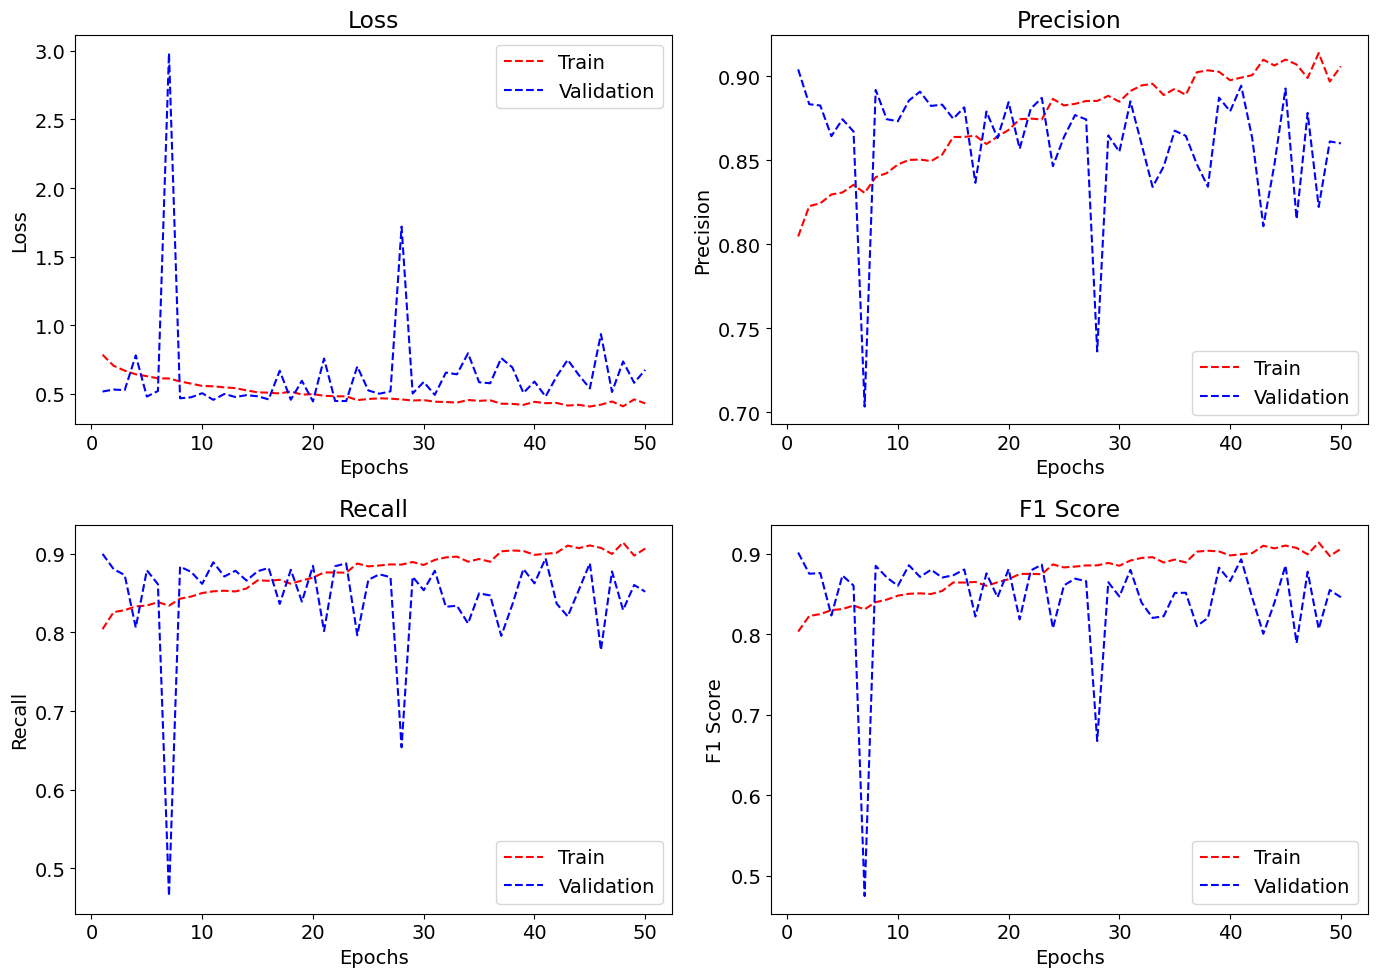

In [ ]:
plot_all_metrics_grid(history_cnn_cellType_new.history)

### Learning Curves - CNN Tuned with Extra Data
- Training Loss seems to be steadily decreasing showing the model is learning well from the training data. However, the validation set seems to flucuate a lot showing the Class imbalance is still impacting the model. This can also be a sign of noise
- Precision for both training and validation is quite high. However, validation still fluctuates slightly more which isn't a concern, as it is showing the false positives are being taken care of well by the model
- Recall for Train is quite stable unlike the Validation. Both sets show the model is detecting true positives well
- F1-Score for both are very high with some fluctuations as it tackles false positives and negatives

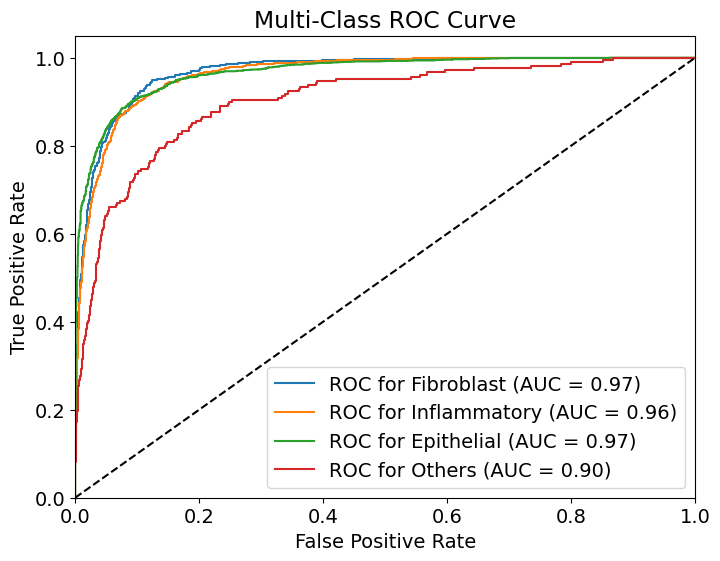

In [ ]:
plot_multiclass_roc(
    cellType_base_cnn_model_tuned,
    test_cellType_generator_new,
    class_names=['Fibroblast', 'Inflammatory', 'Epithelial', 'Others']
)

### AUC Scores - CNN Tuned with Extra Data
- All the AUC scores are close to 1.0 with Others being the weakest link at 0.90 which is still very strong
- These results show high robustness and low misclassification which is good for predicting

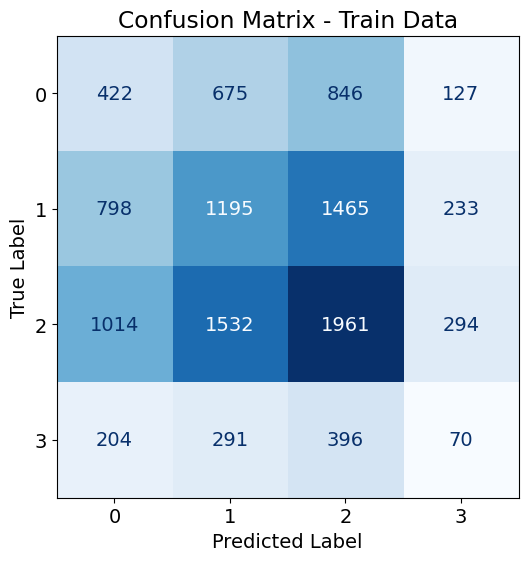

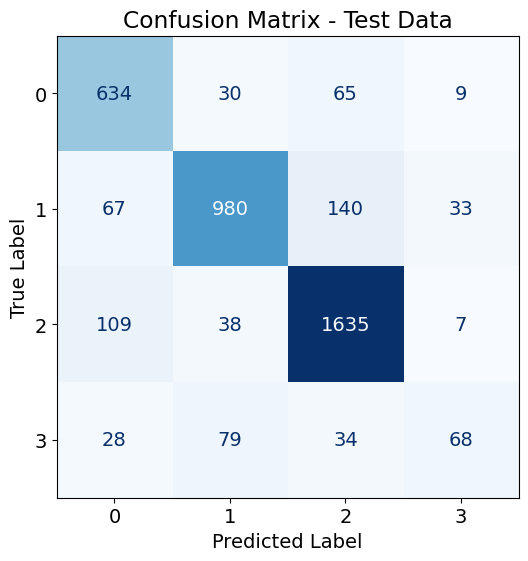

In [ ]:
class_names = list(test_cellType_generator_new.class_indices.keys())
y_true_train = train_cellType_generator_new.classes
y_pred_probs_train = cellType_base_cnn_model_tuned.predict(train_cellType_generator_new, verbose=0)
y_pred_train = np.argmax(y_pred_probs_train, axis=1)
cm_train = confusion_matrix(y_true_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_names)

fig, ax = plt.subplots(figsize=(8, 6))
disp_train.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
plt.title("Confusion Matrix - Train Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

y_true_test = test_cellType_generator_new.classes
y_pred_probs_test = cellType_base_cnn_model_tuned.predict(test_cellType_generator_new, verbose=0)
y_pred_test = np.argmax(y_pred_probs_test, axis=1)
cm_test = confusion_matrix(y_true_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_names)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
disp_test.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Confusion Matrix - CNN Tuned with Extra Data

- Most of the predictions are clustered well now indicating accurate classification.
- Class Epithelial shows the strongest concentration of correct predictions at 1961
- Misclassifications are still present but more evenly distributed
- The Test Confusion Matrix shows very few false positives throughout, even others with 68 correct predictions which is a significant improvement from previous models
- Overall the new data has improved the models ability to generalise and predict the cellType

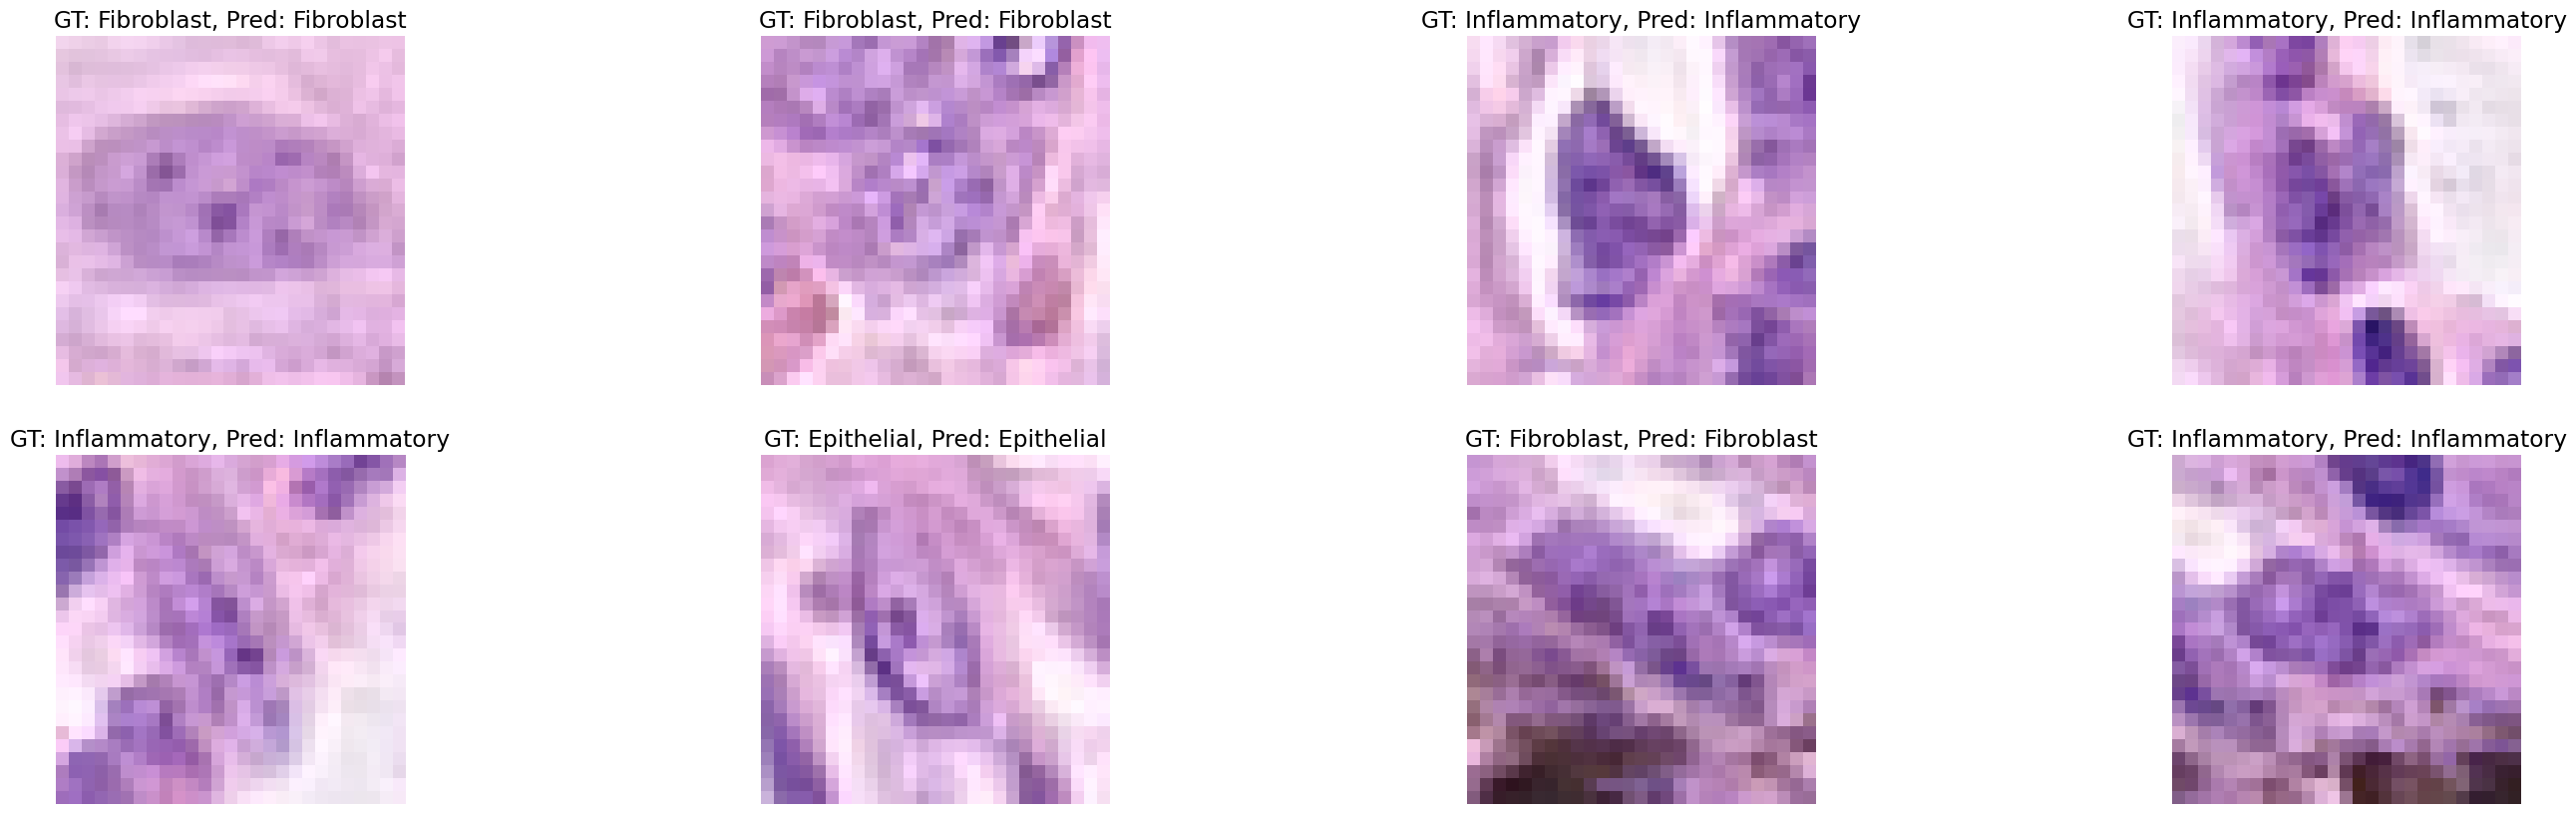

In [ ]:
cellType_label_names = {'Fibroblast': 0, 'Inflammatory': 1, 'Epithelial': 2, 'Others': 3}
d_inv = {v: k for k, v in cellType_label_names.items()}

# Visualize
plt.figure(figsize=(35, 10))
batches = 0

for x, y in test_cellType_generator_new:
    batches += 1
    y_hat = cellType_base_cnn_model.predict(x, verbose=0)
    x_img = np.squeeze(x[0])

    if batches <= 8:
        plt.subplot(2, 4, batches)
        plt.imshow(x_img)
        gt_label = d_inv[np.argmax(y[0])]
        pred_label = d_inv[np.argmax(y_hat[0])]
        plt.title(f"GT: {gt_label}, Pred: {pred_label}")
        plt.axis('off')
    else:
        break
plt.show()

### Predicted Sample Images - CNN Tuned with Extra Data
- These show that the Model now is able to consistently predict the CellType for all CellTypes
- The model has learnt from the images the key patterns to predict the CellType with very high accuracy

In [ ]:
# Reset
test_cellType_generator_new.reset()

# Calculate steps
steps = len(cellType_base_cnn_test_data) // batch_size
if len(cellType_base_cnn_test_data) % batch_size != 0:
    steps += 1

# Collect predictions
y_true = []
y_pred_raw = []

for _ in range(steps):
    x_batch, y_batch = next(test_cellType_generator_new)
    y_hat = cellType_base_cnn_model.predict(x_batch, verbose=0)

    y_true.extend(y_batch)
    y_pred_raw.extend(y_hat)

y_true = np.array(y_true)
y_pred_raw = np.array(y_pred_raw)

# Convert to labels
y_pred_class = np.argmax(y_pred_raw, axis=1)
y_true_class = np.argmax(y_true, axis=1)

# Report
print("Classification Report for CellType Base CNN with Tuning & Extra Data\n")
print(classification_report(y_true_class, y_pred_class, target_names=list(cellType_label_names.keys())))

Classification Report for CellType Base CNN with Tuning & Extra Data

              precision    recall  f1-score   support

  Fibroblast       0.89      0.70      0.79       738
Inflammatory       0.87      0.76      0.81      1220
  Epithelial       0.81      0.92      0.86      1789
      Others       0.57      0.71      0.63       209

    accuracy                           0.82      3956
   macro avg       0.78      0.77      0.77      3956
weighted avg       0.83      0.82      0.82      3956



### Macroaverage Classification Report for CellType - CNN Tuned with Extra Data
- Precision: 0.78
- Recall 0.77
- F1-Score 0.77
    - These results show a very strong and balanced performance across all classes. Each class is being treated equally. Others even has a decent F1-score of 0.63 which was unheard of in previous models.

By Incorporating extra data and tuning, this has improved generalisation and performance across all the metrics. The model has shown its ability to predict accurately, even with cellTypes that are underrepresented

### CellType Comparative Analysis vs Literature (Locality Sensitive Deep Learning for Detection and Classiffication of Nuclei in Routine Colon Cancer Histology Images)
#### Performance Comparison with Literature

- Base Model Neural Network (MLP)
    - Precision: 0.53
    - Recall: 0.52
    - F1-score: 0.50
    - AUC Fibroblast: 0.80
    - AUC Inflammatory: 0.84
    - AUC Epithelial: 0.93
    - AUC Others: 0.72
- Best Model by Korsuk Sirinukunwattana (CNN + NEP which is Neighbouring Ensemble Predictor)
    - Average F1-Score: 0.784
#### Comparison
- CNN + Nep uses the Neighbourhood ensembling pooling which essentially enhances spatial context by aggregating neighbouring patch features
- This model has multiple levels and is more sophisticated than our CNN model
#### Fairness and Consistency:
- Comparison is not necessarily valid as we are comparing an MLP with a CNN model. However, it can be used to showcase the improvements that can be made by refining the model
- Our Model uses single cells, however Korsuk's has richer data with better context making it stronger
- Our Model split by patient to help prevent data leakage, however Korsuk used a traditional random split (with the same ratios)
- Korsuk's model was manually tuned using other initial models whereas our model was just a single version of the CNN trained from the ground up
#### Baseline vs Advanced method
- Korsuk's model is not very generalised as it is built off previous models unlike our model which is trained from teh ground up
- Korsuk's model performed significantly better than our baseline MLP model, as shown with their F1score being almost 30% better than ours.
- Because of the way Korsuk's model was created it would be difficult to determine what changes were done to cause the improved performance.
#### Final Model Selection
- Depending on what additional work the user chooses to do will determine which model is best to go ahead with
    - Our model is trained form the ground up and has learnt the features from the single raw images
    - Korsuk's model relies on previous models and has a lot more pre-processing but lacks any consideration for the class imbalance
    - Our model has no refinements, however Korsuk used more on custom features and softmax. Our baseline model requires significant refinement before being adequate enough to use in the real world.

## Performance Metrics Selection for all isCancerous Classificiation Models

The following metrics evaluate isCancerous models <font color='red'>because isCanceorus class imbalance</font>:
- Macro Average Precision:
    - Measures correct cancer predictions with equal class weighting
- Macro Average Recall:
    - Measure model performance in identifying actual cancerous cases by calculate recall for each class separately before averaging to ensure these cases are not missed due to class imbalanced.
- Macro Average F1-score:
    - Balances precision and recall with equal class weighting
- Confusion matirx:
    - Illsurate counts for correct and incorrect cancerous and non-cancerous predictions
- ROC curve:
    - Evaluates performance across thresholds, robust to imbalance
- Accuracy is not used because:
    - isCancerous class imbalanced allow models achieve exteremly high accuracy by predicting non-Cancerous (majority) on all samples, and missing on actual Cancerous sample.

In [ ]:
# clone the repository to get the images locally
!git clone https://github.com/Strongsoon/machineLearning.git

Cloning into 'machineLearning'...
remote: Enumerating objects: 20658, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 20658 (delta 54), reused 13 (delta 2), pack-reused 20565 (from 2)
Receiving objects: 100% (20658/20658), 57.51 MiB | 19.77 MiB/s, done.
Resolving deltas: 100% (252/252), done.
Updating files: 100% (20296/20296), done.


### train-validation-test Splitting by patientID

Split by patientID to <font color='red'>Prevent data leakage</font>:
- No patient has their cells split across different sets
- Training: 36 patients (60%)
- Validation: 12 patients (20%)
- Testing: 12 patients (20%)

K-Fold Cross Validation splitting is not chosen because limited CPU capability on our computer

<font color='red'>Validation set assists in parameter tunning</font> to <font color='red'>prevent overffiting on cancerous class</font> because there is <font color='red'>imbalance class distribution</font>.
We find right balance between precision and recall using validation set while preserve data integrity

In [ ]:
# Data splitting - train-validation-test splits by patientID
print("\nisCancerous Model: Data Splitting into Train, Validation and Test set (by patientID):")

# make a copy
isCancerous_nn_mainColonCellFrame = mainColonCellFrame.copy()

# Get unique patient IDs
isCancerous_unique_patients = isCancerous_nn_mainColonCellFrame['patientID'].unique()

# Split patient IDs into train+val (80%) and test (20%)
isCancerous_train_patients, isCancerous_test_patients = train_test_split(isCancerous_unique_patients, test_size=0.2, random_state=42)

# Further split train+val into train (60% of total) and validation (20% of total)
isCancerous_train_patients, isCancerous_val_patients = train_test_split(isCancerous_train_patients, test_size=0.25, random_state=42)

# Create datasets based on patient assignment
with pd.option_context('mode.chained_assignment', None):
    # Assign samples to datasets based on which set their patient ID belongs to
    isCancerous_nn_train_data = isCancerous_nn_mainColonCellFrame[isCancerous_nn_mainColonCellFrame['patientID'].isin(isCancerous_train_patients)]
    isCancerous_nn_val_data = isCancerous_nn_mainColonCellFrame[isCancerous_nn_mainColonCellFrame['patientID'].isin(isCancerous_val_patients)]
    isCancerous_nn_test_data = isCancerous_nn_mainColonCellFrame[isCancerous_nn_mainColonCellFrame['patientID'].isin(isCancerous_test_patients)]

print(f"Training data: {len(isCancerous_nn_train_data)} samples from {len(isCancerous_train_patients)} patients")
print(f"Validation data: {len(isCancerous_nn_val_data)} samples from {len(isCancerous_val_patients)} patients")
print(f"Test data: {len(isCancerous_nn_test_data)} samples from {len(isCancerous_test_patients)} patients")


isCancerous Model: Data Splitting into Train, Validation and Test set (by patientID):
Training data: 5774 samples from 36 patients
Validation data: 2283 samples from 12 patients
Test data: 1839 samples from 12 patients



isCanceours Model: Class Distribution for Train, Validation and Test set:


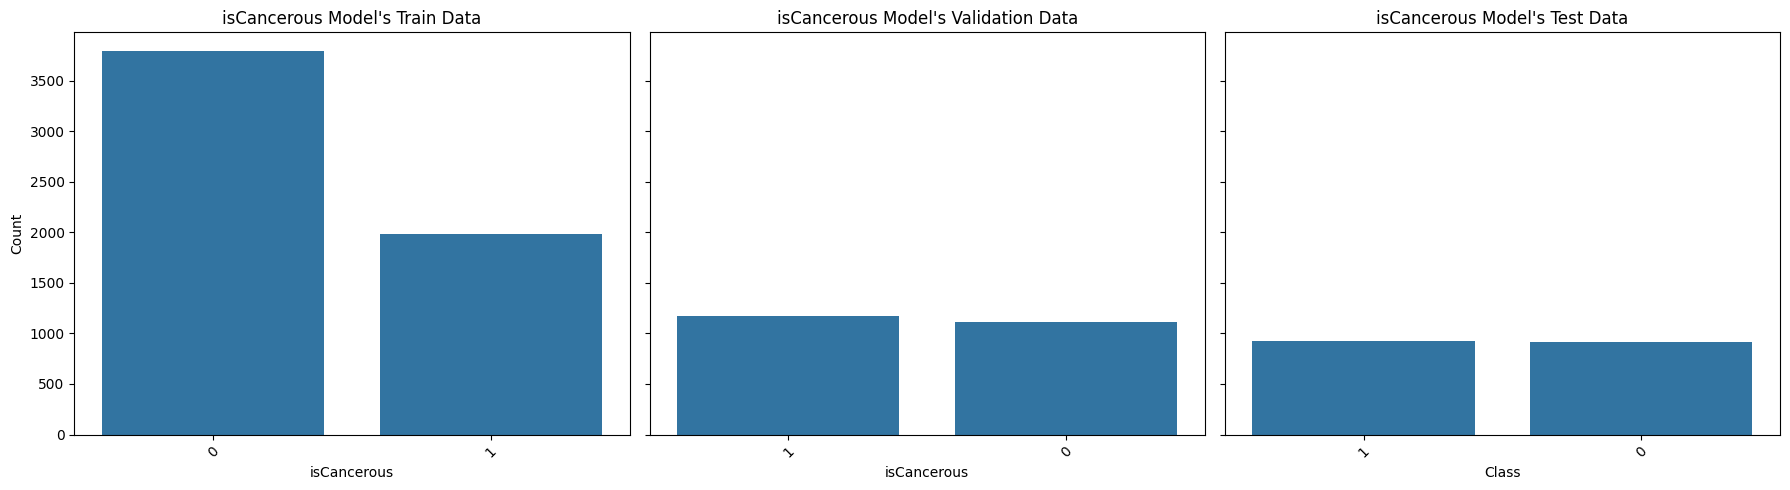

In [ ]:
print("\nisCanceours Model: Class Distribution for Train, Validation and Test set:")
# Set up figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Class distribution for Training Data
sns.countplot(data=isCancerous_nn_train_data, x='isCancerous', order=isCancerous_nn_train_data['isCancerous'].value_counts().index, ax=axes[0])
axes[0].set_title('isCancerous Model\'s Train Data')
axes[0].set_xlabel('isCancerous')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Class distribution for Validation Data
sns.countplot(data=isCancerous_nn_val_data, x='isCancerous', order=isCancerous_nn_val_data['isCancerous'].value_counts().index, ax=axes[1])
axes[1].set_title('isCancerous Model\'s Validation Data')
axes[1].set_xlabel('isCancerous')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)

# Class distribution for Test Data
sns.countplot(data=isCancerous_nn_test_data, x='isCancerous', order=isCancerous_nn_test_data['isCancerous'].value_counts().index, ax=axes[2])
axes[2].set_title('isCancerous Model\'s Test Data')
axes[2].set_xlabel('Class')
axes[2].set_ylabel('')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Train, Validation and Test set Class Distribution
- Shows class distribution of isCancerous cell in train, validation, and test sets
- Train dataset contain class imbalance and that proper evaluation metrics should be chose for non-bias model training and evaluation
- Test and validation dataset has balanced class distirbution

### No Pre-processing needed on image because we building neural network (MLP and CNN)

## Baseline development - Neural Network (MLP) for isCancerous

Neural Network (MLP) chosen as baseline model because:
- automatically learn and recognise complex patterns from raw image pixel values without manual feature engineering
- identify visual indicators of cancer with Sigmoid function in hidden layer because model can learn non-linear relationship
- establish performance benchmark to scale to CNN to improve performance
- Logistic Regression only suitable for linear decision boundaries that can miss visual indicators important for cancer detection in image
- Decision Tree cannot effectively model cancerous variations and placement in image, because feature space is parititoned using x,y axis

Input dimension: 27x27x3 because image is 27×27 with RGB values

Hidden layer: 256 neurons to balance efficiency and complexity to learn 2187 input values

Output class: 1 because this is binary classification

Sequential API because:
- build simple neural network (layers flow from input, hidden layers, and then output)
- MLP don't need complex input branchings

Sigmoid function because:
- smooth gradient to learn differences between cancerous/non-cancerous
- stabilise learning rate
- starting points for baseline

In [ ]:
# import all modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import os


# read csv file
mainColonCellFrame = pd.read_csv('./machineLearning/data_labels_mainData.csv', delimiter=',')

In [ ]:
import tensorflow as tf

AUTOTUNE = tf.data.experimental.AUTOTUNE

print(tf.__version__)

INPUT_DIM = (27,27,3) # Each colon cell image is 27×27 pixels with separate red, green, and blue values for each pixel
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 1

isCancerous_base_nn_mlp_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM), # transforms the format of the images from a two-dimensional array (of 27 by 27 pixels) to a one-dimensional array (of 27 * 27 * 3 = 2187 pixels)
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

isCancerous_base_nn_mlp_model.summary()

2.18.0


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2187)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       560,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 560,385 (2.14 MB)

 Trainable params: 560,385 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

Flatten Layer:
- Flattening image into 1D vector (2187 values)

Hidden Layer:
- 560128 parameters with sigmoid to constraints neuron outputs between 0 and 1

Output Layer:
- 257 parameters
- Need loss function handling when model training to handle class imbalance

### Compile Model

Binary Cross-Entropy Loss function because:
- computes cross-entropy loss between actual and predicted labels for binary classification tasks
- penalizes wrong predictions more heavily than less confident ones to reduced missed cancer

Adam Optimiser bacause:
- has features from AdaGrad and RMSprop to scale learning rate and use gradient's moving average to handle noise in image

In [ ]:
# custom f1-score adapted and learned from https://stackoverflow.com/questions/64474463/custom-f1-score-metric-in-tensorflow
class f1Score(tf.keras.metrics.Metric):
  # Initialize the metric with a name and any additional arguments
    def __init__(self, name='f1_score', **kwargs):
       # Call parent class constructor with provided name and arguments
       super().__init__(name=name, **kwargs)
       # Create precision and recall metrics as internal components
       self.precision = tf.keras.metrics.Precision()
       self.recall = tf.keras.metrics.Recall()

   # Update the state of the metric with new predictions
    def update_state(self, y_true, y_pred, sample_weight=None):
       # Forward the update to both precision and recall metrics
       self.precision.update_state(y_true, y_pred, sample_weight)
       self.recall.update_state(y_true, y_pred, sample_weight)

   # Calculate the F1 score when requested
    def result(self):
       # Get the current precision and recall values
       p = self.precision.result()
       r = self.recall.result()
       # Calculate F1 score as the harmonic mean of precision and recall
       # Adding epsilon prevents division by zero
       return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

   # Reset the state of both precision and recall metrics
    def reset_state(self):
       # Clear accumulated values when starting a new epoch
       self.precision.reset_state()
       self.recall.reset_state()

# compile model
isCancerous_base_nn_mlp_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall'),
                        tf.keras.metrics.AUC(name='auc'),
                        f1Score()
                    ])

### Train Model

Convert isCancerous to String because  ```flow_from_dataframe``` require String labels

Use ```flow_from_dataframe``` load images from dataframe (ImageName contains the image filename)
- x: ImageName
- y: isCancerous

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# convert isCancerous to String
isCancerous_nn_train_data['isCancerous'] = isCancerous_nn_train_data['isCancerous'].astype('str')
isCancerous_nn_val_data['isCancerous'] = isCancerous_nn_val_data['isCancerous'].astype('str')

# use Image data generators to load data in batch into memory
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 27

isCancerous_base_nn_mlp_train_generator = train_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_train_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

isCancerous_base_nn_mlp_validation_generator = val_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_val_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

Found 5774 validated image filenames belonging to 2 classes.
Found 2283 validated image filenames belonging to 2 classes.


<ipython-input-7-d1c861fbf8f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isCancerous_nn_train_data['isCancerous'] = isCancerous_nn_train_data['isCancerous'].astype('str')
<ipython-input-7-d1c861fbf8f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isCancerous_nn_val_data['isCancerous'] = isCancerous_nn_val_data['isCancerous'].astype('str')


In [ ]:
# train neural network model
history = isCancerous_base_nn_mlp_model.fit(isCancerous_base_nn_mlp_train_generator,
                                            validation_data = isCancerous_base_nn_mlp_validation_generator,
                                            epochs=50,
                                            verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


### Learning Curve

loss, precision, recall and f1 curves are lpot because to <font color='red'>identify overfitting/underfitting</font>.

We apply optimisation technique in advanced development.

In [ ]:
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name):
    plt.figure(figsize=(18,7))

    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

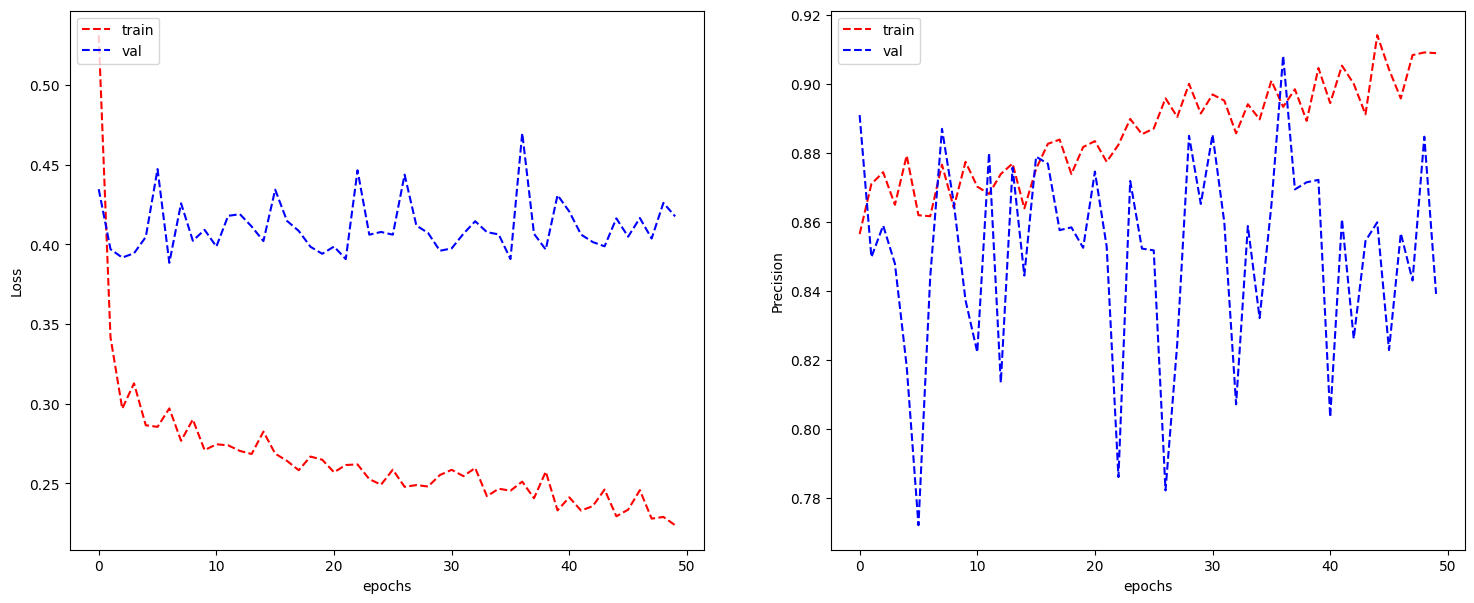

In [ ]:
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    history.history['precision'],
    history.history['val_precision'],
    metric_name='Precision'
)

- Model is overfitting because Loss curve shows huge training-validation gap
- training loss decrease gradually at the end, while the validation loss remains high and fluctuating
- precision validation data is highly unstable because model unable to generalise to unseen data

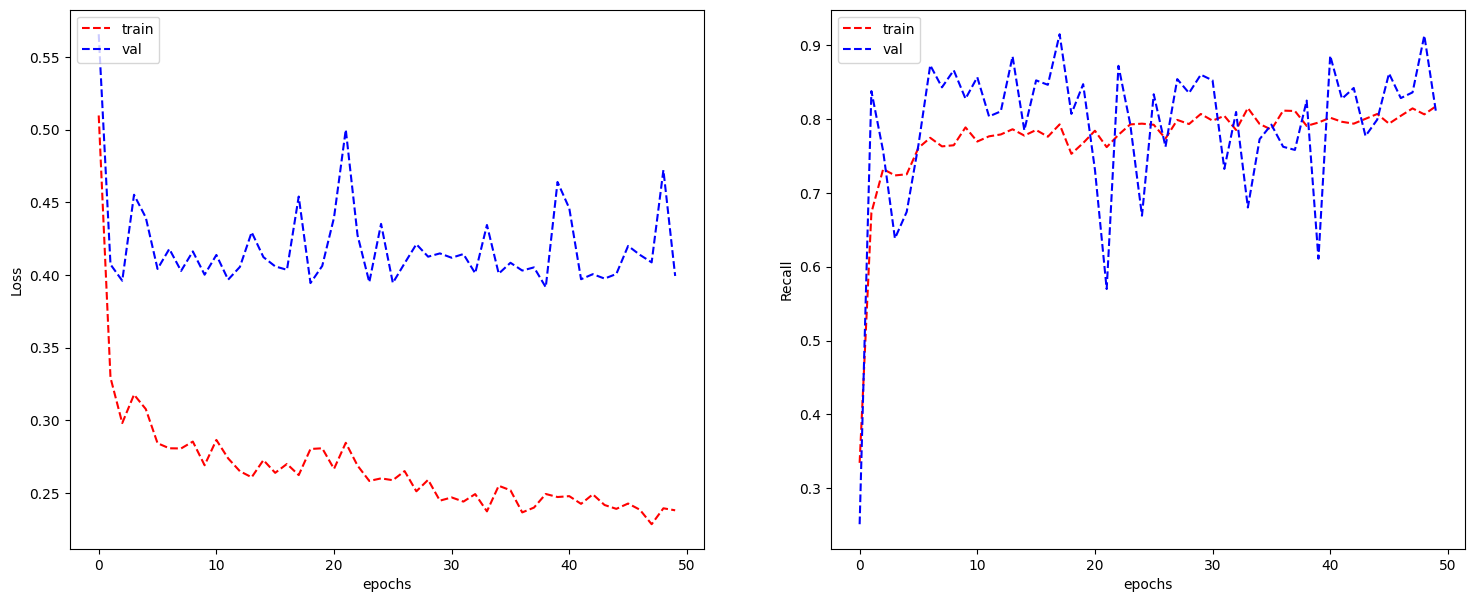

In [ ]:
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    history.history['recall'],
    history.history['val_recall'],
    metric_name='Recall'
)

- Recall curves show validation outperform training, and high flunctuation shows model unable generalise to unseen data

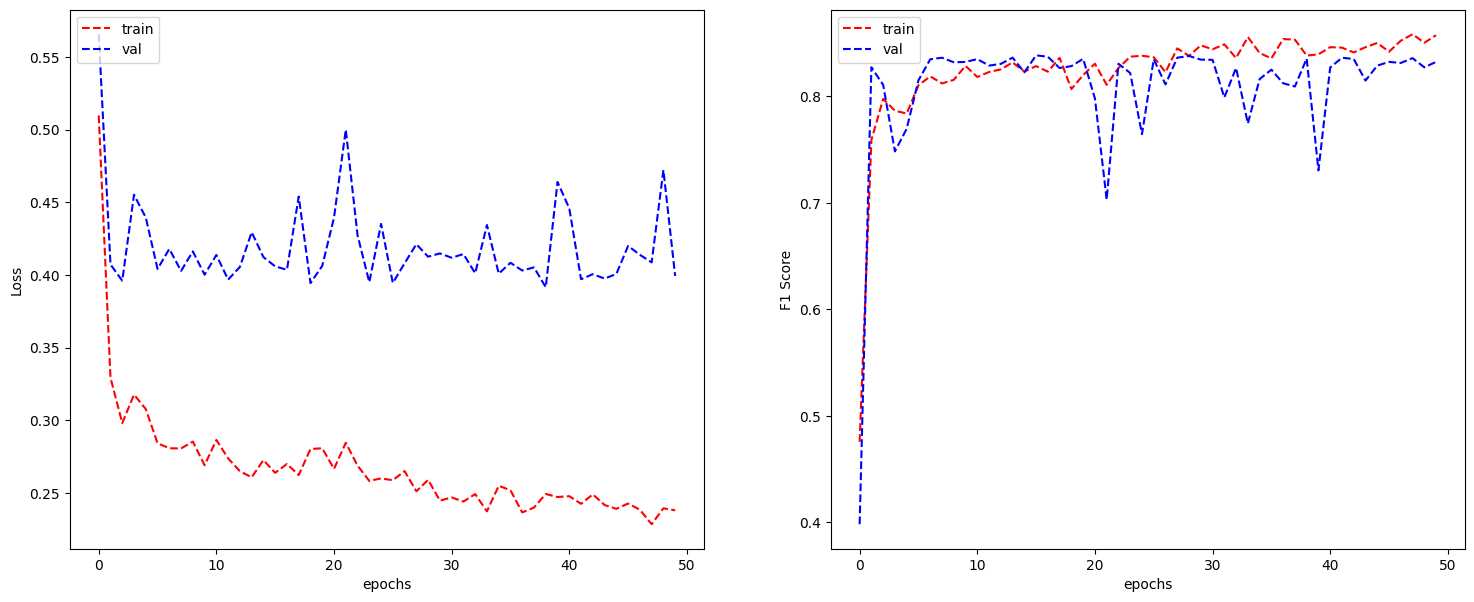

In [ ]:
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    history.history['f1_score'],
    history.history['val_f1_score'],
    metric_name='F1 Score'
)

- F1-score curve shows small gap between trainign and validation, (training F1 reach 0.85m, validation F1 hovers around 0.8) which suggests model can classify unseen data moderately although overfitting

### Test Model without hyperparameter tunning.



In [ ]:
# convert isCancerous to String
isCancerous_nn_test_data['isCancerous'] = isCancerous_nn_test_data['isCancerous'].astype('str')

# use Image data generators to load data in batch into memory
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

isCancerous_base_nn_mlp_test_generator = test_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_test_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

Found 1839 validated image filenames belonging to 2 classes.


<ipython-input-11-0b2275189523>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isCancerous_nn_test_data['isCancerous'] = isCancerous_nn_test_data['isCancerous'].astype('str')


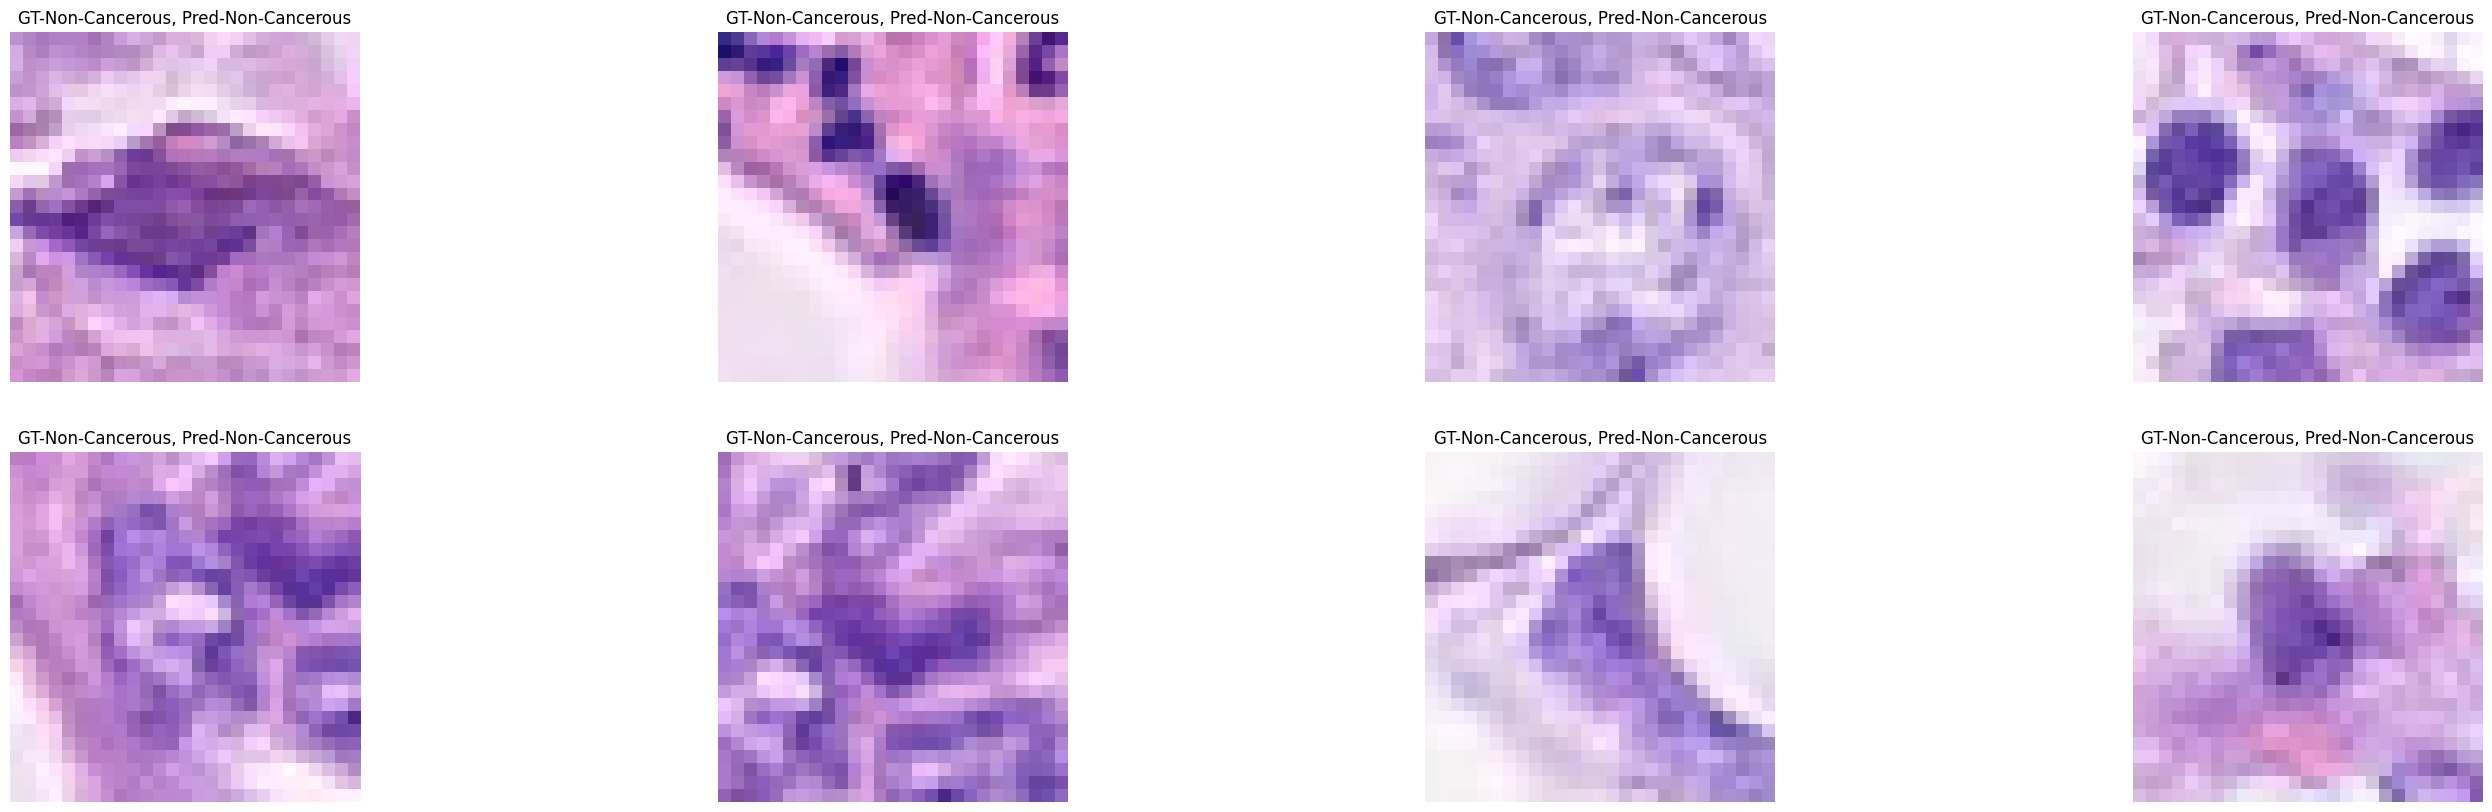

In [ ]:
# generate isCancerous label
isCancerous_label_names = {'Non-Cancerous' : 0, 'Cancerous' : 1}

# plot output of neural network on testing data
d_inv = {v: k for k, v in isCancerous_label_names.items()}
plt.figure(figsize=(35,10))
batches = 0
for x,y in isCancerous_base_nn_mlp_test_generator:
        batches = batches + 1
        y_hat = isCancerous_base_nn_mlp_model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 9:
            plt.subplot(2,4,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))

        else:
            break

        plt.axis('off')

- Model classify first 8 non-cancerous correctly

## Explanatory Model Analysis On Testing Data

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve

# Reset the generator to the beginning
isCancerous_base_nn_mlp_test_generator.reset()

# Calculate the number of steps needed to go through the entire test dataset
steps = len(isCancerous_nn_test_data) // batch_size
if len(isCancerous_nn_test_data) % batch_size != 0:
    steps += 1

# Collect all predictions and true labels
y_true = []
y_pred_raw = []

for i in range(steps):
    x, y = next(isCancerous_base_nn_mlp_test_generator)
    y_hat = isCancerous_base_nn_mlp_model.predict(x, verbose=0)

    # Collect true labels
    y_true.extend(y)

    # Collect raw predictions
    y_pred_raw.extend(y_hat)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred_raw = np.array(y_pred_raw)

In [ ]:
# convert to class labels (0 or 1)
y_pred_class = (y_pred_raw >= 0.5).astype(int)
print(classification_report(y_true, y_pred_class))

              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85       914
         1.0       0.92      0.73      0.82       925

    accuracy                           0.83      1839
   macro avg       0.85      0.83      0.83      1839
weighted avg       0.85      0.83      0.83      1839



#### Macro Average Precision, Recall, F1-Score
- Precision: 0.85
- Recall: 0.83
- F1: 0.83

- Overall, moderate classification performance because F1-score 0.83
- Relatively balanced model performance because similar values for precision, recall and F1


<Figure size 1000x800 with 0 Axes>

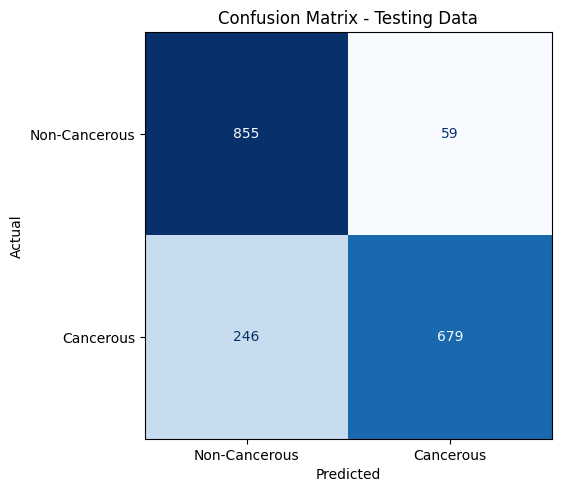

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate and plot confusion matrix
isCancerous_base_nn_mlp_test_cm = confusion_matrix(
    y_true,
    y_pred_class
)

plt.figure(figsize=(10, 8))

# Use ConfusionMatrixDisplay for plotting
disp = ConfusionMatrixDisplay(confusion_matrix=isCancerous_base_nn_mlp_test_cm,
                              display_labels=['Non-Cancerous', 'Cancerous'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.title('Confusion Matrix - Testing Data')
plt.show()

#### Confusion Matrix
- 59 false positives
- 246 false negatives
- Model has imbalance predictions because higher rate of false negatives than false positives.

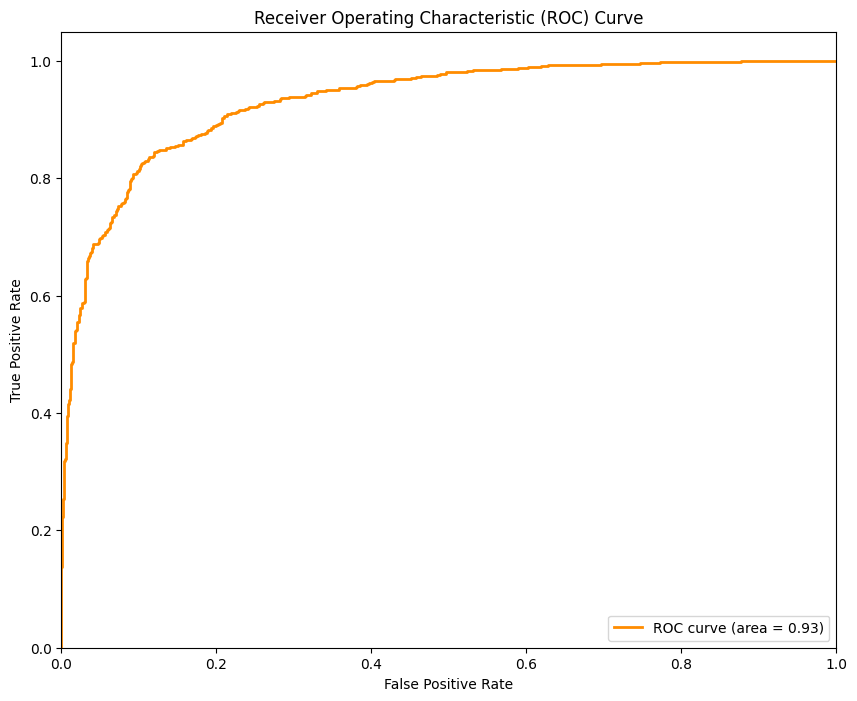

In [ ]:
# Calculate ROC curve and ROC area
fpr, tpr, thresholds_roc = roc_curve(y_true, y_pred_raw)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### ROC Curve
- baseline neural network (MLP) model has high AUC (0.93) for testing data. This confirm the model strong performance in classifying cencerous cell in various thresholds.

## Advanced development - Neural Network (MLP) with L2 Regularisation, Dropout, Reduced Neurons for isCancerous

Because of overfitting (Huge training-validation loss gap), we improved baseline by applying:
- L2 Regularisation: penalizes large weights without turning to exactly zero
- Dropout:
    - randomly deactivates neurons during training to avoid model memorising data
    - 0.3 dropout rate in hidden layer with more neurons helps reduce overfitting in the larger parameter space
- Reduce neurones in layer:
    - reducing to 128 neurons decreases model capacity while maintaining sufficient performance

In [ ]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 128 # Reduced from 256 to 128
OUTPUT_CLASSES = 1

isCancerous_advanced_nn_mlp_model  = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    # add L2 regularization to hidden layer
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    # add dropout
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])
print("Advanced:")
isCancerous_advanced_nn_mlp_model.summary()

Advanced:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 2187)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       280,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 280,193 (1.07 MB)

 Trainable params: 280,193 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

```
Baseline:
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 flatten (Flatten)           (None, 2187)              0         
                                                                 
 dense (Dense)               (None, 256)               560128    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
=================================================================
Total params: 560,385
Trainable params: 560,385
Non-trainable params: 0
_________________________________________________________________
```
Flatten Layer:
- 1D vector of 2187 values

First Layer:
- Neurons reduced to 128 to decrease model capacity in memorising training data.

Dropout Layer:
- deactivate random neurons during training to prevent adaptation, make model include robust feature learning.

Output Layer:
- single neuron for binary classification

Total Parameters:
- advanced model has 50% less, model significantly less prone to overfitting

### Compile and Train Model

In [ ]:
# compile model
isCancerous_advanced_nn_mlp_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall'),
                        tf.keras.metrics.AUC(name='auc'),
                        f1Score()
                    ])

# convert isCancerous to String
isCancerous_nn_train_data['isCancerous'] = isCancerous_nn_train_data['isCancerous'].astype('str')
isCancerous_nn_val_data['isCancerous'] = isCancerous_nn_val_data['isCancerous'].astype('str')

# use Image data generators to load data in batch into memory
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 27

isCancerous_advanced_nn_mlp_train_generator = train_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_train_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

isCancerous_advanced_nn_mlp_validation_generator = val_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_val_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

# train neural network model
history = isCancerous_advanced_nn_mlp_model.fit(isCancerous_advanced_nn_mlp_train_generator,
                                            validation_data = isCancerous_advanced_nn_mlp_validation_generator,
                                            epochs=50,
                                            verbose=0)

Found 5774 validated image filenames belonging to 2 classes.
Found 2283 validated image filenames belonging to 2 classes.


<ipython-input-44-e0919e61cf4a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isCancerous_nn_train_data['isCancerous'] = isCancerous_nn_train_data['isCancerous'].astype('str')
<ipython-input-44-e0919e61cf4a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isCancerous_nn_val_data['isCancerous'] = isCancerous_nn_val_data['isCancerous'].astype('str')
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super()

### Learning Curve

loss, precision, recall and f1 curves are plot to <font color='red'>check overfitting</font>.

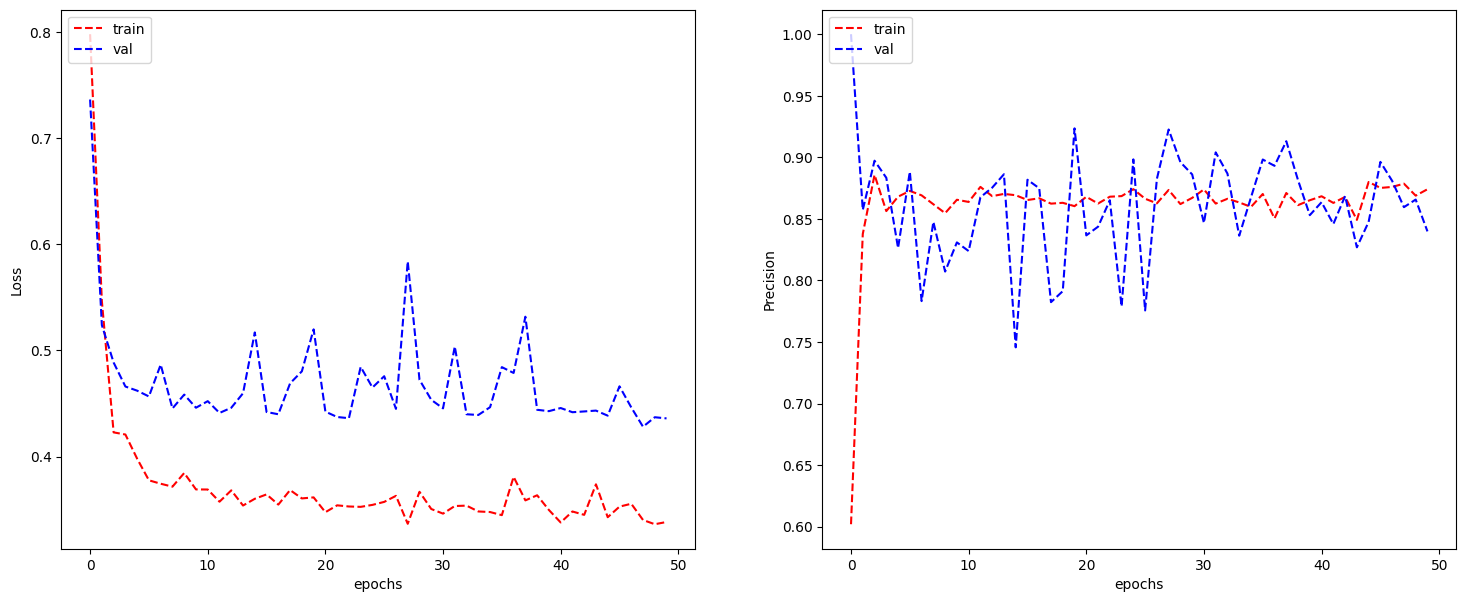

In [ ]:
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    history.history['precision'],
    history.history['val_precision'],
    metric_name='Precision'
)

Compare to Baseline:
- Loss curve shows model has reduced overfitting with narrower training-validation gap
- model maintain similar precision levels to baseline with less parameters. Means baseline is overparameterized
- High osciliation in validation precision curve because unable to generalise well

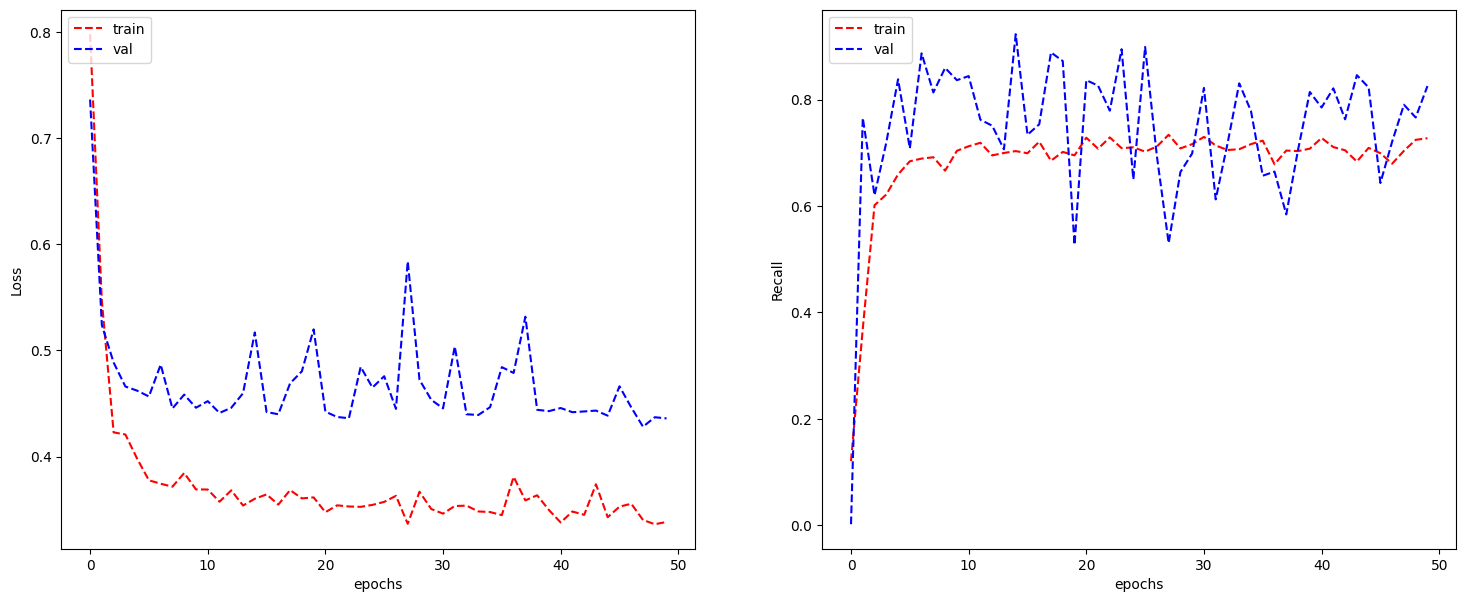

In [ ]:
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    history.history['recall'],
    history.history['val_recall'],
    metric_name='Recall'
)

Compare to Baseline:
- model has lower training recall due to regularization, dropout, and reduced neurons preventing perfect data fitting
- unstable validation recall, indicating that regularization techniques are working to improve generalization

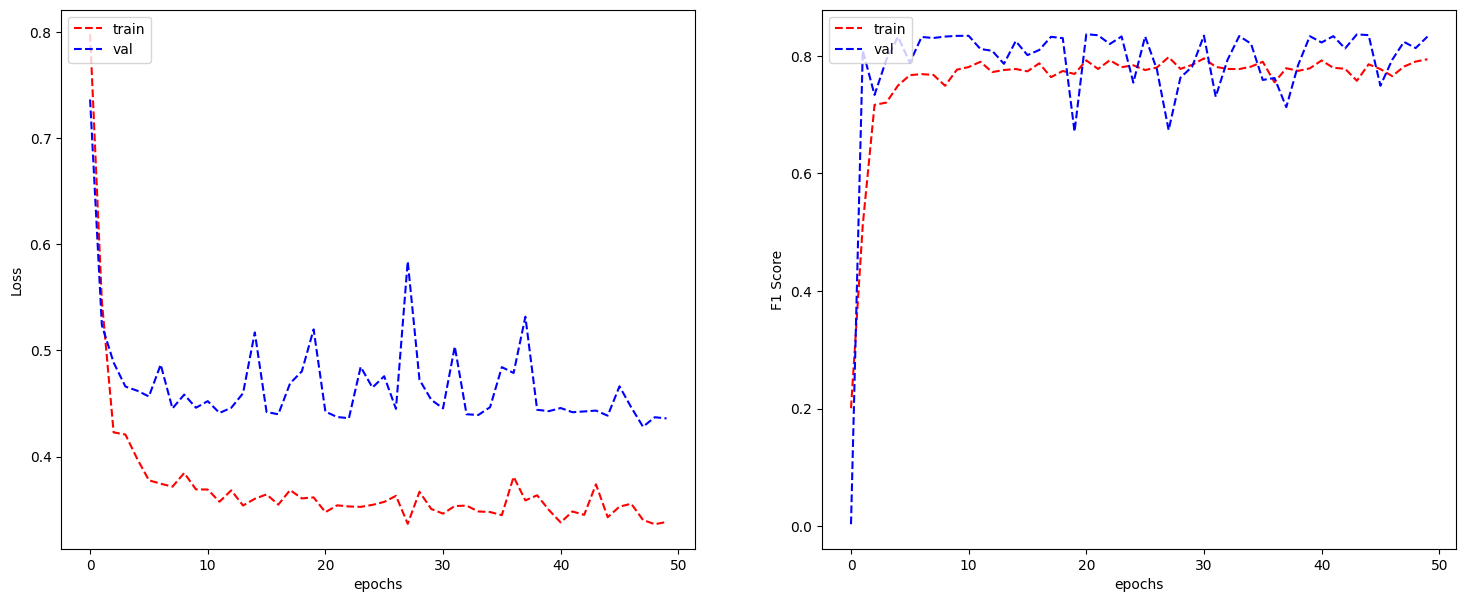

In [ ]:
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    history.history['f1_score'],
    history.history['val_f1_score'],
    metric_name='F1 Score'
)

Compare to Baseline:
- validation F1-scores outperforming training's because reduced overfitting
- model maintains similar F1-score to baseline (0.7 to 0.84) with reduced parameter

### Test Model

Found 1839 validated image filenames belonging to 2 classes.


<ipython-input-48-6356ab6cd4d9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isCancerous_nn_test_data['isCancerous'] = isCancerous_nn_test_data['isCancerous'].astype('str')


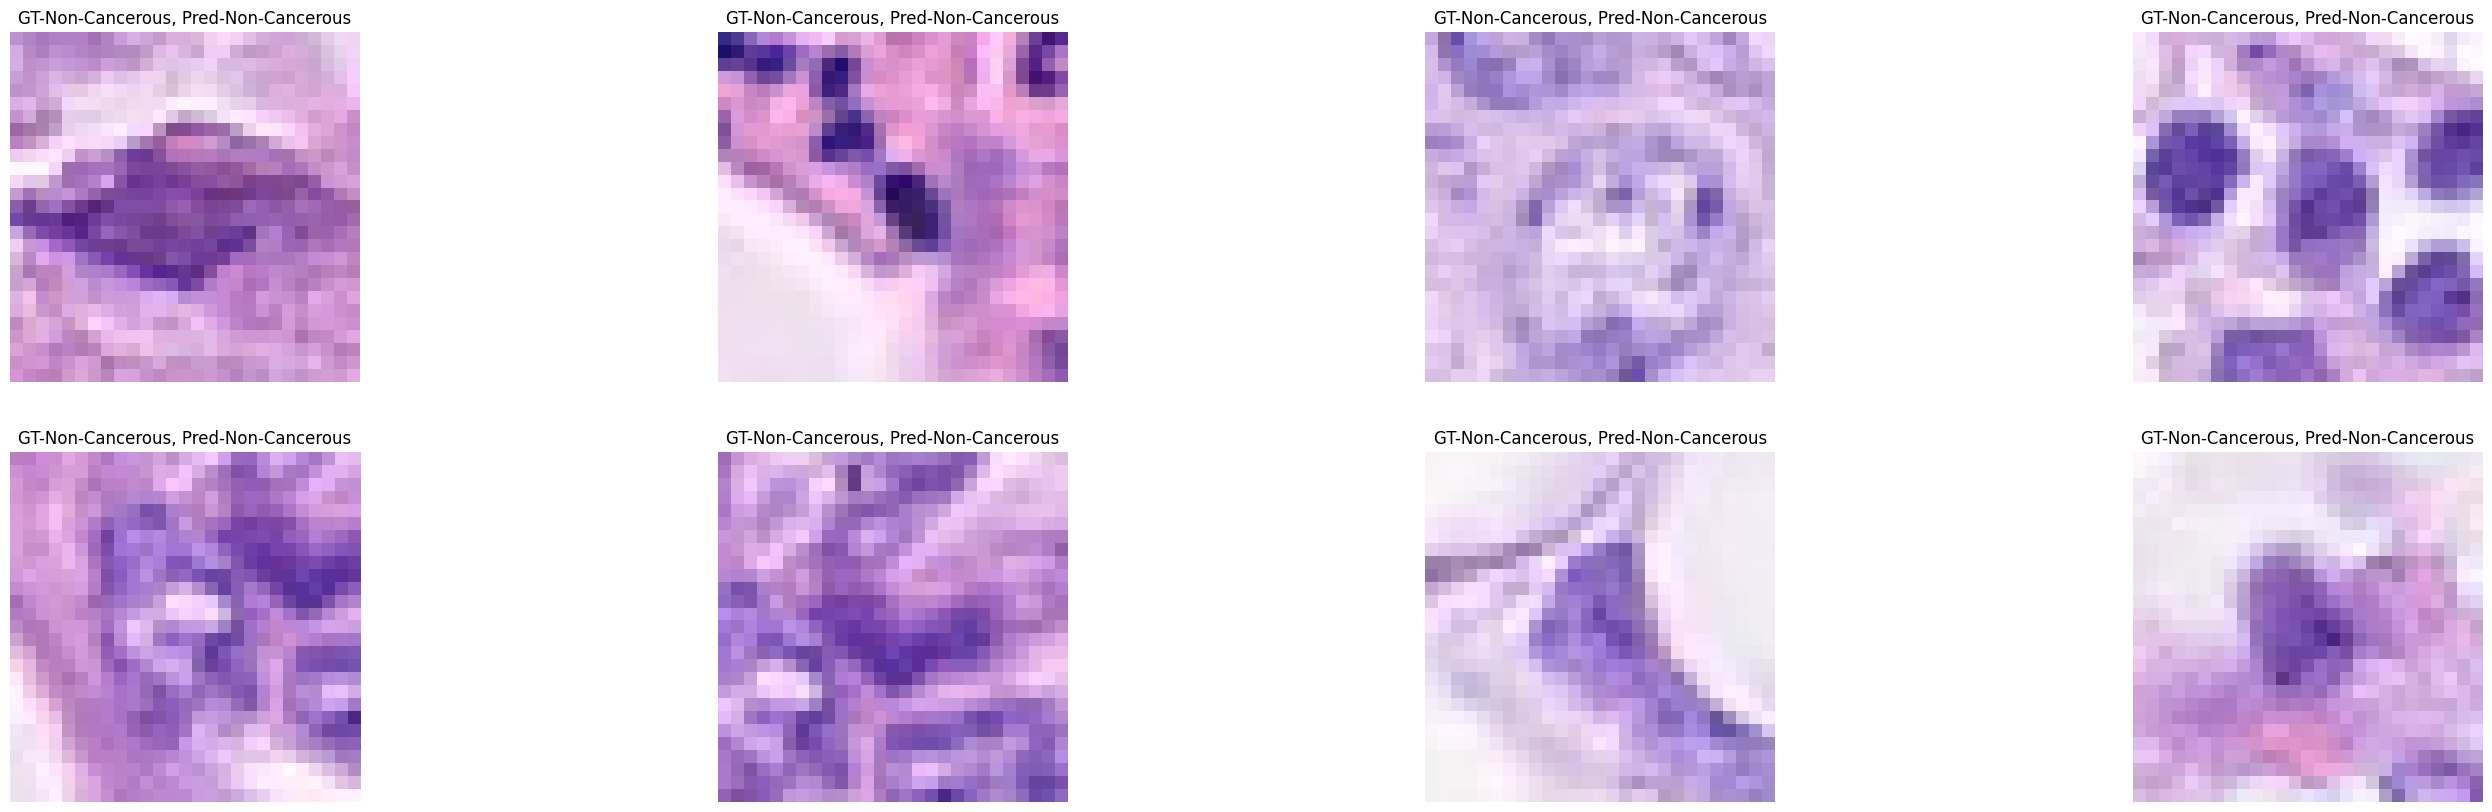

In [ ]:
# generate isCancerous label
isCancerous_label_names = {'Non-Cancerous' : 0, 'Cancerous' : 1}

# convert isCancerous to String
isCancerous_nn_test_data['isCancerous'] = isCancerous_nn_test_data['isCancerous'].astype('str')

# use Image data generators to load data in batch into memory
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

isCancerous_advanced_nn_mlp_test_generator = test_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_test_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

# plot output of neural network on testing data
d_inv = {v: k for k, v in isCancerous_label_names.items()}
plt.figure(figsize=(35,10))
batches = 0
for x,y in isCancerous_advanced_nn_mlp_test_generator:
        batches = batches + 1
        y_hat = isCancerous_advanced_nn_mlp_model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 9:
            plt.subplot(2,4,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))

        else:
            break

        plt.axis('off')

- Same as baseline, Model classify first 8 non-cancerous cell correctly

## Explanatory Model Analysis On Testing Data

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve

# Reset the generator to the beginning
isCancerous_advanced_nn_mlp_test_generator.reset()

# Calculate the number of steps needed to go through the entire test dataset
steps = len(isCancerous_nn_test_data) // batch_size
if len(isCancerous_nn_test_data) % batch_size != 0:
    steps += 1

# Collect all predictions and true labels
y_true = []
y_pred_raw = []

for i in range(steps):
    x, y = next(isCancerous_advanced_nn_mlp_test_generator)
    y_hat = isCancerous_advanced_nn_mlp_model.predict(x, verbose=0)

    # Collect true labels
    y_true.extend(y)

    # Collect raw predictions
    y_pred_raw.extend(y_hat)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred_raw = np.array(y_pred_raw)

In [ ]:
# convert to class labels (0 or 1)
y_pred_class = (y_pred_raw >= 0.5).astype(int)
print(classification_report(y_true, y_pred_class))

              precision    recall  f1-score   support

         0.0       0.76      0.95      0.85       914
         1.0       0.93      0.71      0.81       925

    accuracy                           0.83      1839
   macro avg       0.85      0.83      0.83      1839
weighted avg       0.85      0.83      0.83      1839



#### Macro Average Precision, Recall, F1-Score
- Baseline:
    - Precision: 0.85
    - Recall: 0.83
    - F1: 0.83
- Advanced:
    - Precision: 0.85
    - Recall: 0.83
    - F1: 0.83

- advanced model maintains moderate classification F1-score with reduced neural complexity, demonstrating that fewer neurons can achieve comparable results to the baseline model.
- Similar to baseline, advanced's metrics remain relatively balanced across all metrics, indicating consistent classification performance for both classes.

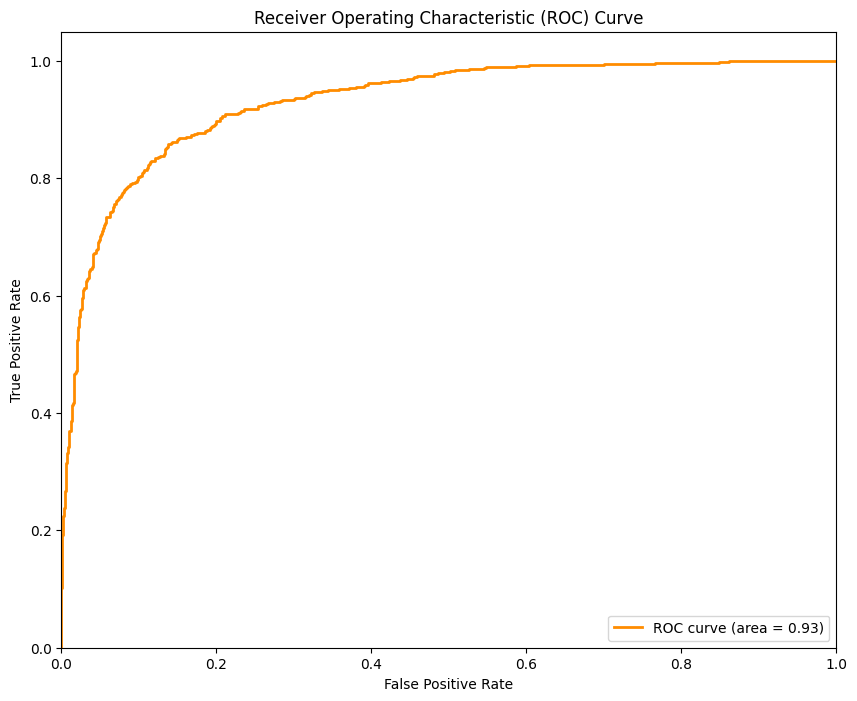

In [ ]:
# Calculate ROC curve and ROC area
fpr, tpr, thresholds_roc = roc_curve(y_true, y_pred_raw)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### ROC Curve
- Baseline AUC: 0.93
- Advanced AUC: 0.93
- Both models has high AUC, confirm MLP strong performance in classifying cencerous cell in various thresholds.

<Figure size 1000x800 with 0 Axes>

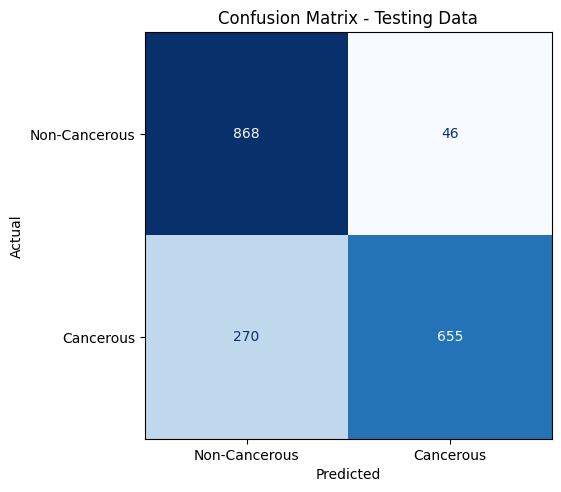

In [ ]:
 from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate and plot confusion matrix
isCancerous_advanced_nn_mlp_test_cm = confusion_matrix(
    y_true,
    y_pred_class
)

plt.figure(figsize=(10, 8))

# Use ConfusionMatrixDisplay for plotting
disp = ConfusionMatrixDisplay(confusion_matrix=isCancerous_advanced_nn_mlp_test_cm,
                              display_labels=['Non-Cancerous', 'Cancerous'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.title('Confusion Matrix - Testing Data')
plt.show()

#### Confusion Matrix
Baseline:
- 59 false positives
- 246 false negatives

Advanced:
- 46 false positives
- 270 false negatives

- Advanced model shows fewer false positives but more false negatives because
reduced neurons and dropout hindered cancer detection capability despite successfully address overfitting.

## Baseline development - Deep Neural Network (CNN) for isCancerous

CNN is chosen as baseline model because its advantages over MLP:
- Automates feature extraction with learned convolution filters, eliminating manual engineering needed in MLPs
- Reduces parameters through local connectivity and sharing, enabling efficient processing of large inputs
- Improves performance with ReLU activation (avoiding sigmoid saturation), sparse connectivity, and hierarchical feature construction

Input dimension: 27x27x3 because image is 27×27 with RGB values

Output class: 1 because binary classification

Convolutional layers is used because feature extraction

Max pooling for dimensionality reduction

ReLU because:
- eliminate saturation caused from Sigmoid (which used by MLP)
- propagates gradients more efficiently for complex model

In [ ]:
import tensorflow as tf

INPUT_DIM = (27,27,3) # Each colon cell image is 27×27 pixels with separate red, green, and blue values for each pixel
OUTPUT_CLASSES = 1

isCancerous_base_cnn_model = tf.keras.Sequential([
    # First convolutional block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_DIM),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  # Dimension reduction

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), # Dimension reduction

    # Flatten feature maps
    tf.keras.layers.Flatten(),

    # Fully connected layers for classification
    tf.keras.layers.Dense(64, activation='relu'),

    # Output layer
    tf.keras.layers.Dense(OUTPUT_CLASSES),  # Binary classification output
])

isCancerous_base_cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,921 (476.25 KB)

 Trainable params: 121,921 (476.25 KB)

 Non-trainable params: 0 (0.00 B)

First Convolutional Block:
- Conv2D: 32 filters (3x3) → 25x25 feature maps
- MaxPooling2D: 2x2 pooling for downsampling

Second Convolutional Block:
- Conv2D: 64 filters (3x3)
- MaxPooling2D: 2x2 pooling

Final Layers:
- Flatten: 3D maps to 1D vector (1600 values)
- Dense: 64 neurons
- Output: 1 neuron (binary classification)

### Compile Model

Binary Cross-Entropy Loss:
- Designed for binary classification with from_logits=True conversion
- Penalizes confident wrong predictions to minimize missed cancer cases

Adam Optimizer:
- Combines AdaGrad and RMSprop for adaptive learning rates
- Handles noisy image gradients and <font color='red'>class imbalance</font> effectively

In [ ]:
# f1-score
class f1Score(tf.keras.metrics.Metric):
  # Initialize the metric with a name and any additional arguments
    def __init__(self, name='f1_score', **kwargs):
       # Call parent class constructor with provided name and arguments
       super().__init__(name=name, **kwargs)
       # Create precision and recall metrics as internal components
       self.precision = tf.keras.metrics.Precision()
       self.recall = tf.keras.metrics.Recall()

   # Update the state of the metric with new predictions
    def update_state(self, y_true, y_pred, sample_weight=None):
       # Forward the update to both precision and recall metrics
       self.precision.update_state(y_true, y_pred, sample_weight)
       self.recall.update_state(y_true, y_pred, sample_weight)

   # Calculate the F1 score when requested
    def result(self):
       # Get the current precision and recall values
       p = self.precision.result()
       r = self.recall.result()
       # Calculate F1 score as the harmonic mean of precision and recall
       # Adding epsilon prevents division by zero
       return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

   # Reset the state of both precision and recall metrics
    def reset_state(self):
       # Clear accumulated values when starting a new epoch
       self.precision.reset_state()
       self.recall.reset_state()

isCancerous_base_cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),  # As used in slide 5
    metrics=[tf.keras.metrics.Precision(name='precision'),
              tf.keras.metrics.Recall(name='recall'),
              tf.keras.metrics.AUC(name='auc'),
              f1Score()]
)

### Train Model

Convert isCancerous to String because ```flow_from_dataframe``` require String labels

Use ```flow_from_dataframe``` load images from dataframe (ImageName contains the image filename)
- x: ImageName
- y: isCancerous

In [ ]:
# use Image data generators to load data in batch into memory
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 27

isCancerous_base_cnn_train_generator = train_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_train_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

isCancerous_base_cnn_validation_generator = val_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_val_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

isCancerous_base_cnn_history = isCancerous_base_cnn_model.fit(isCancerous_base_cnn_train_generator,
                                            validation_data = isCancerous_base_cnn_validation_generator,
                                            epochs=50,
                                            verbose=0)

Found 5774 validated image filenames belonging to 2 classes.
Found 2283 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


### Learning Curve

loss, precision, recall and f1 curves are plot to <font color='red'>identify overfitting/underfitting</font>.

We apply optimisation technique in advanced development.

In [ ]:
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name):
    plt.figure(figsize=(18,7))

    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

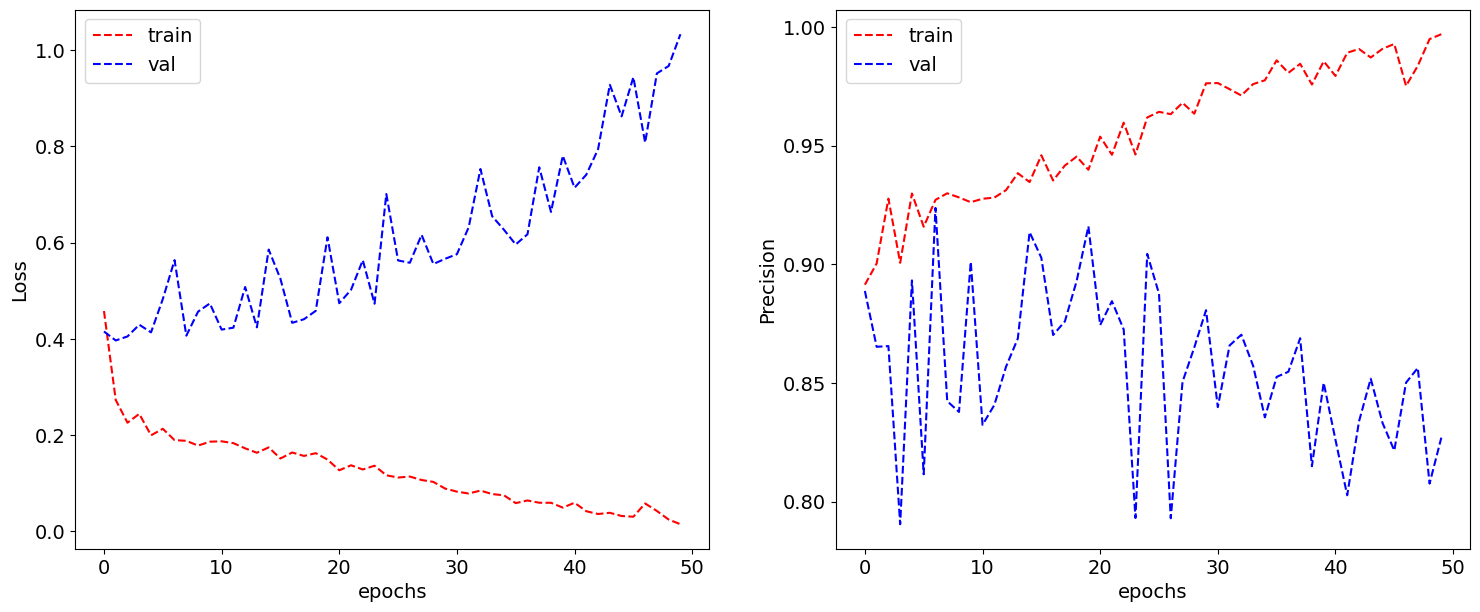

In [ ]:
plot_learning_curve(
    isCancerous_base_cnn_history.history['loss'],
    isCancerous_base_cnn_history.history['val_loss'],
    isCancerous_base_cnn_history.history['precision'],
    isCancerous_base_cnn_history.history['val_precision'],
    metric_name='Precision'
)

- Severe overfitting evident from near-zero training loss while validation loss increases, indicating memorization rather than pattern learning
- Perfect training precision but declining, oscillating validation precision demonstrates poor generalization to unseen data

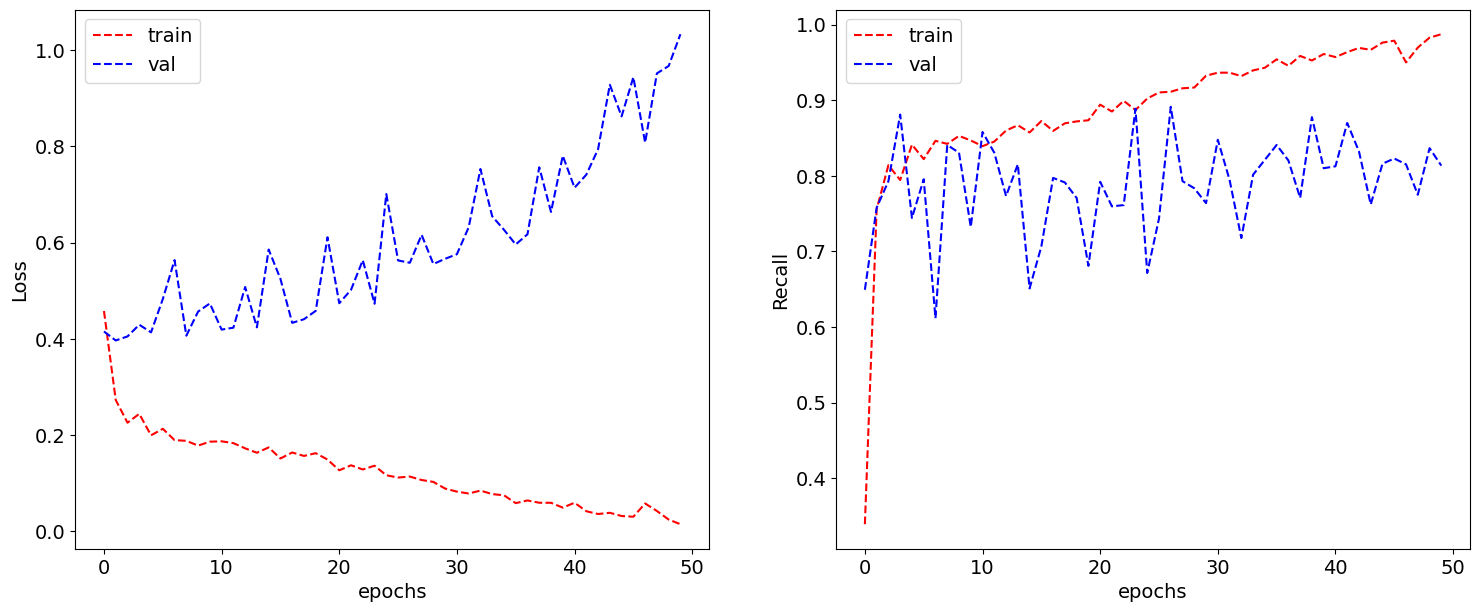

In [ ]:
plot_learning_curve(
    isCancerous_base_cnn_history.history['loss'],
    isCancerous_base_cnn_history.history['val_loss'],
    isCancerous_base_cnn_history.history['recall'],
    isCancerous_base_cnn_history.history['val_recall'],
    metric_name='Recall'
)

- Validation recall oscillates because improper learning rate control (affecting weight updates in gradient descent), preventing effective generalisation


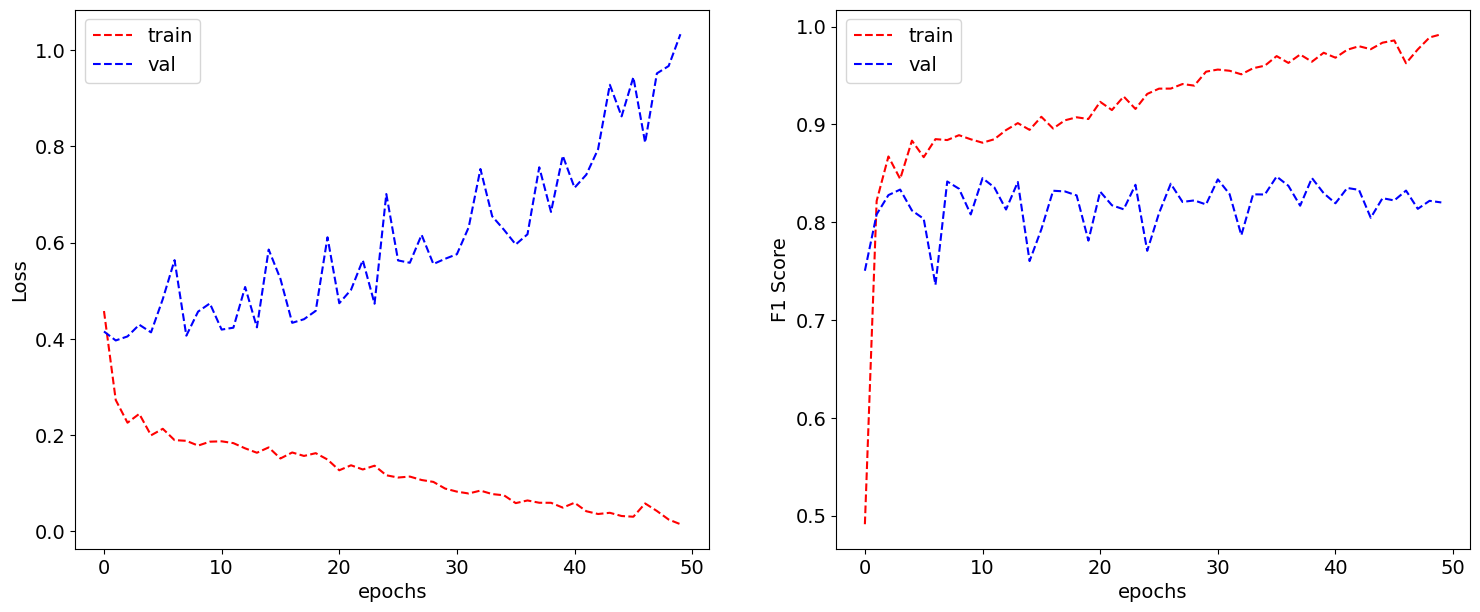

In [ ]:
plot_learning_curve(
    isCancerous_base_cnn_history.history['loss'],
    isCancerous_base_cnn_history.history['val_loss'],
    isCancerous_base_cnn_history.history['f1_score'],
    isCancerous_base_cnn_history.history['val_f1_score'],
    metric_name='F1 Score'
)

- F1-score curve shows widening train-validation gap from overfitting, with moderate oscillations indicating model reached peak generalization capacity at epoch 5

### Test Model Without Hyperparameter Tunning


Found 1839 validated image filenames belonging to 2 classes.


<ipython-input-58-441120068a13>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isCancerous_nn_test_data['isCancerous'] = isCancerous_nn_test_data['isCancerous'].astype('str')


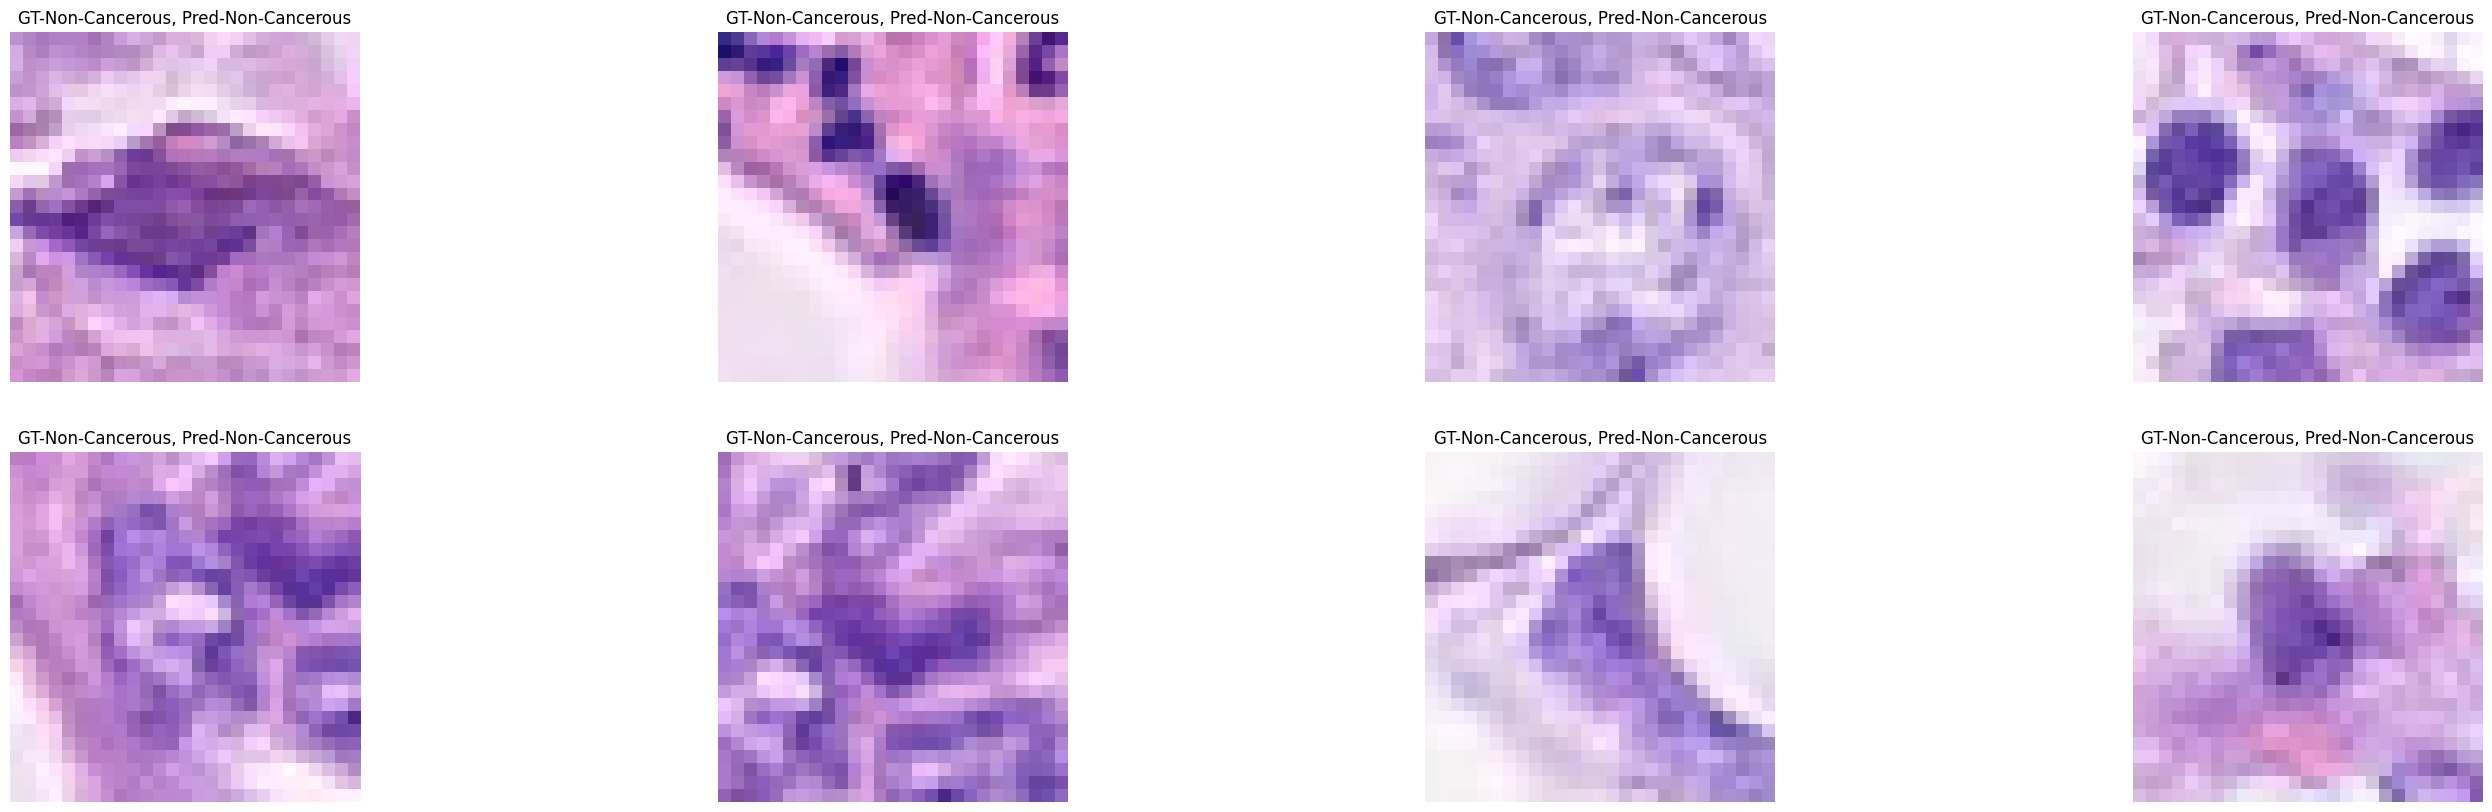

In [ ]:
# generate isCancerous label
isCancerous_label_names = {'Non-Cancerous' : 0, 'Cancerous' : 1}

# convert isCancerous to String
isCancerous_nn_test_data['isCancerous'] = isCancerous_nn_test_data['isCancerous'].astype('str')

# use Image data generators to load data in batch into memory
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

isCancerous_base_cnn_test_generator = test_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_test_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

# plot output of neural network on testing data
d_inv = {v: k for k, v in isCancerous_label_names.items()}
plt.figure(figsize=(35,10))
batches = 0
for x,y in isCancerous_base_cnn_test_generator:
        batches = batches + 1
        y_hat = isCancerous_base_cnn_model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 9:
            plt.subplot(2,4,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))

        else:
            break

        plt.axis('off')

- Model predict correctly for first 8 images.

## Explanatory Model Analysis For Testing Data

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve

# Reset the generator to the beginning
isCancerous_base_cnn_test_generator.reset()

# Calculate the number of steps needed to go through the entire test dataset
steps = len(isCancerous_nn_test_data) // batch_size
if len(isCancerous_nn_test_data) % batch_size != 0:
    steps += 1

# Collect all predictions and true labels
y_true = []
y_pred_raw = []

for i in range(steps):
    x, y = next(isCancerous_base_cnn_test_generator)
    y_hat = isCancerous_base_cnn_model.predict(x, verbose=0)

    # Collect true labels
    y_true.extend(y)

    # Collect raw predictions
    y_pred_raw.extend(y_hat)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred_raw = np.array(y_pred_raw)

In [ ]:
# convert to class labels (0 or 1)
y_pred_class = (y_pred_raw >= 0.5).astype(int)
print(classification_report(y_true, y_pred_class))

              precision    recall  f1-score   support

         0.0       0.72      0.90      0.80       914
         1.0       0.87      0.66      0.75       925

    accuracy                           0.78      1839
   macro avg       0.80      0.78      0.78      1839
weighted avg       0.80      0.78      0.78      1839



#### Macro Average Precision, Recall, F1-Score

- Precision: 0.80
- Recall: 0.78
- F1: 0.78

- Model achieves moderate classification performance (F1-score 0.78) due to underutilized hierarchical feature learning capabilities
- Has balanced precision and recall, showing no bias toward false positives or negatives

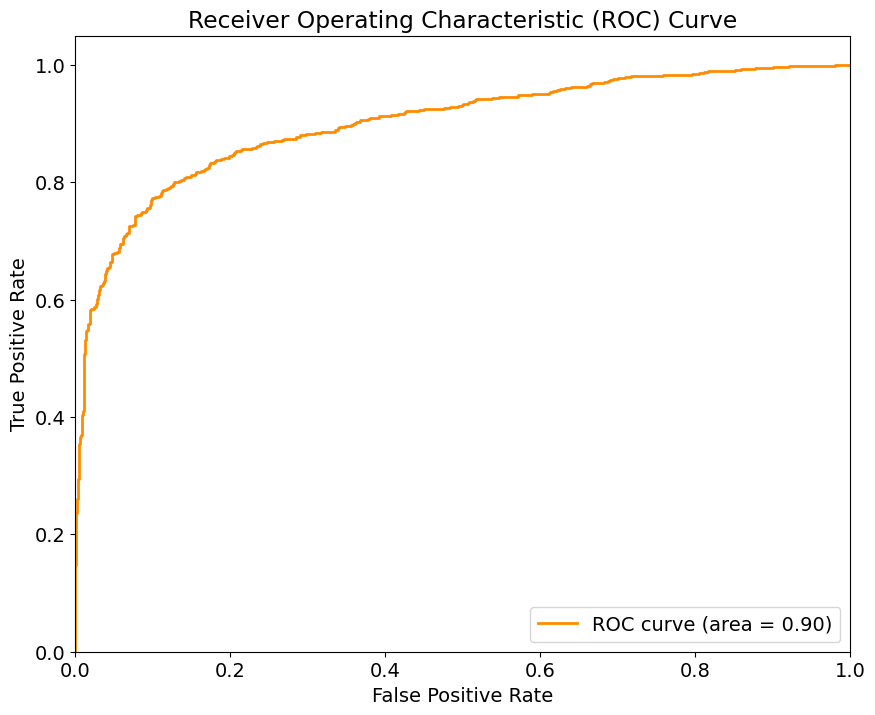

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc
# Calculate ROC curve and ROC area
fpr, tpr, thresholds_roc = roc_curve(y_true, y_pred_raw)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### ROC Curve
- High AUC (0.90) on test data confirms strong cancer classification performance

<Figure size 1000x800 with 0 Axes>

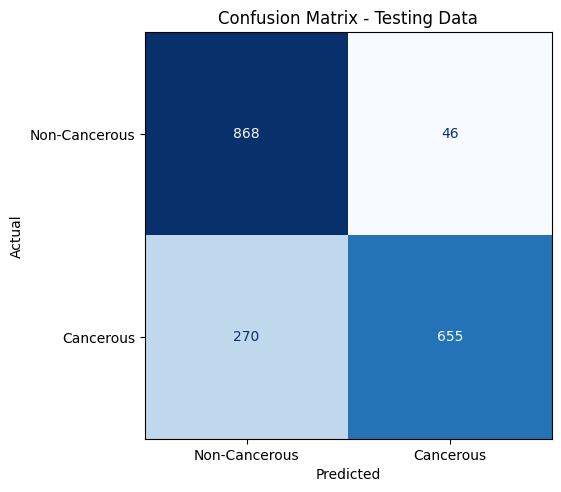

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate and plot confusion matrix
isCancerous_base_cnn_test_cm = confusion_matrix(
    y_true,
    y_pred_class
)

plt.figure(figsize=(10, 8))

# Use ConfusionMatrixDisplay for plotting
disp = ConfusionMatrixDisplay(confusion_matrix=isCancerous_base_cnn_test_cm,
                              display_labels=['Non-Cancerous', 'Cancerous'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.title('Confusion Matrix - Testing Data')
plt.show()

#### Confusion Matrix
Baseline:
- 46 false positives
- 270 false negatives

- Strong bias toward false negatives (6x more than false positives) with 30% false negative rate, missing many cancerous cells
- Eventhough 70% cancer detection success, predictions show concerning class imbalance

## Advanced development - Deep Neural Network (CNN) with L2 Weight Regularisation, Dropout, Batch Normalisation, Data Augmentation

Because of overfitting, we improved baseline CNN using:
- L2 Regularisation: Penalizes large weights while preserving important features
- Dropout (0.3): Prevents memorization in layers with more neurons
- Batch Normalization: Addresses vanishing gradients and stabilises training
- <font color='red'>Data Augmentation</font>: Expands training data through image transformations to <font color='red'>improve generalisation and to address class imbalance</font>

In [ ]:
import tensorflow as tf

INPUT_DIM = (27,27,3) # Each colon cell image is 27×27 pixels with separate red, green, and blue values for each pixel
OUTPUT_CLASSES = 1

isCancerous_advanced_cnn_model = tf.keras.Sequential([
    # First convolutional block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=INPUT_DIM), # add L2 regularisation
    tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  # Dimension reduction

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001),), # add L2 regularisation
    tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), # Dimension reduction

    # Flatten feature maps
    tf.keras.layers.Flatten(),

    # Fully connected layers for classification
    tf.keras.layers.Dense(64, activation='relu'),

    # Dropout
    tf.keras.layers.Dropout(.3),

    # Output layer
    tf.keras.layers.Dense(OUTPUT_CLASSES),  # Binary classification output
])

isCancerous_advanced_cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 25, 25, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 25, 25, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,305 (477.75 KB)

 Trainable params: 122,113 (477.00 KB)

 Non-trainable params: 192 (768.00 B)

### Compile and Train Model

<font color='red'>Data augmentation</font> on all training data because model can <font color='red'>learn from expanded non-cancerous image because non-Cancerous has less samples (class imbalance)</font>:
- Geometric transformations (rotation, flipping, cropping):
  - Teaches model cancer indicators appear in different orientations, leveraging CNN's spatial processing capability
- Color transformations (brightness, contrast):
  - Focuses model on structural features instead of lab-dependent coloration

Adam optimizer has reduced learning rate (0.0001) to handle augmented image and regularization

In [ ]:
# compile model
isCancerous_advanced_cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # set learning rate to 0.0001
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall'),
                        tf.keras.metrics.AUC(name='auc'),
                        f1Score()
                    ])

# convert isCancerous to String
isCancerous_nn_train_data['isCancerous'] = isCancerous_nn_train_data['isCancerous'].astype('str')
isCancerous_nn_val_data['isCancerous'] = isCancerous_nn_val_data['isCancerous'].astype('str')

# use Image data generators to load data in batch into memory
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                  # Geometric transformations
                                  rotation_range=40,           # Random rotation in degrees
                                  width_shift_range=0.2,       # Random horizontal shifts
                                  height_shift_range=0.2,      # Random vertical shifts
                                  shear_range=0.2,             # Shear transformations
                                  zoom_range=0.2,              # Random zoom
                                  horizontal_flip=True,        # Random horizontal flips
                                  vertical_flip=True,          # Random vertical flips (useful for microscopy images)
                                  fill_mode='nearest',         # Fill strategy for created pixels

                                  # Color-space transformations
                                  brightness_range=[0.8, 1.2], # Random brightness adjustment
                                  channel_shift_range=20.0    # Simulate staining variations
                                  )

val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 27

isCancerous_advanced_cnn_train_generator = train_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_train_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

isCancerous_advanced_cnn_validation_generator = val_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_val_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

# train neural network model
isCancerous_advanced_cnn_history = isCancerous_advanced_cnn_model.fit(isCancerous_advanced_cnn_train_generator,
                                            validation_data = isCancerous_advanced_cnn_validation_generator,
                                            epochs=50,
                                            verbose=0)

Found 5774 validated image filenames belonging to 2 classes.
Found 2283 validated image filenames belonging to 2 classes.


<ipython-input-88-792de290b375>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isCancerous_nn_train_data['isCancerous'] = isCancerous_nn_train_data['isCancerous'].astype('str')
<ipython-input-88-792de290b375>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isCancerous_nn_val_data['isCancerous'] = isCancerous_nn_val_data['isCancerous'].astype('str')
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super()

### Display Augmented Image

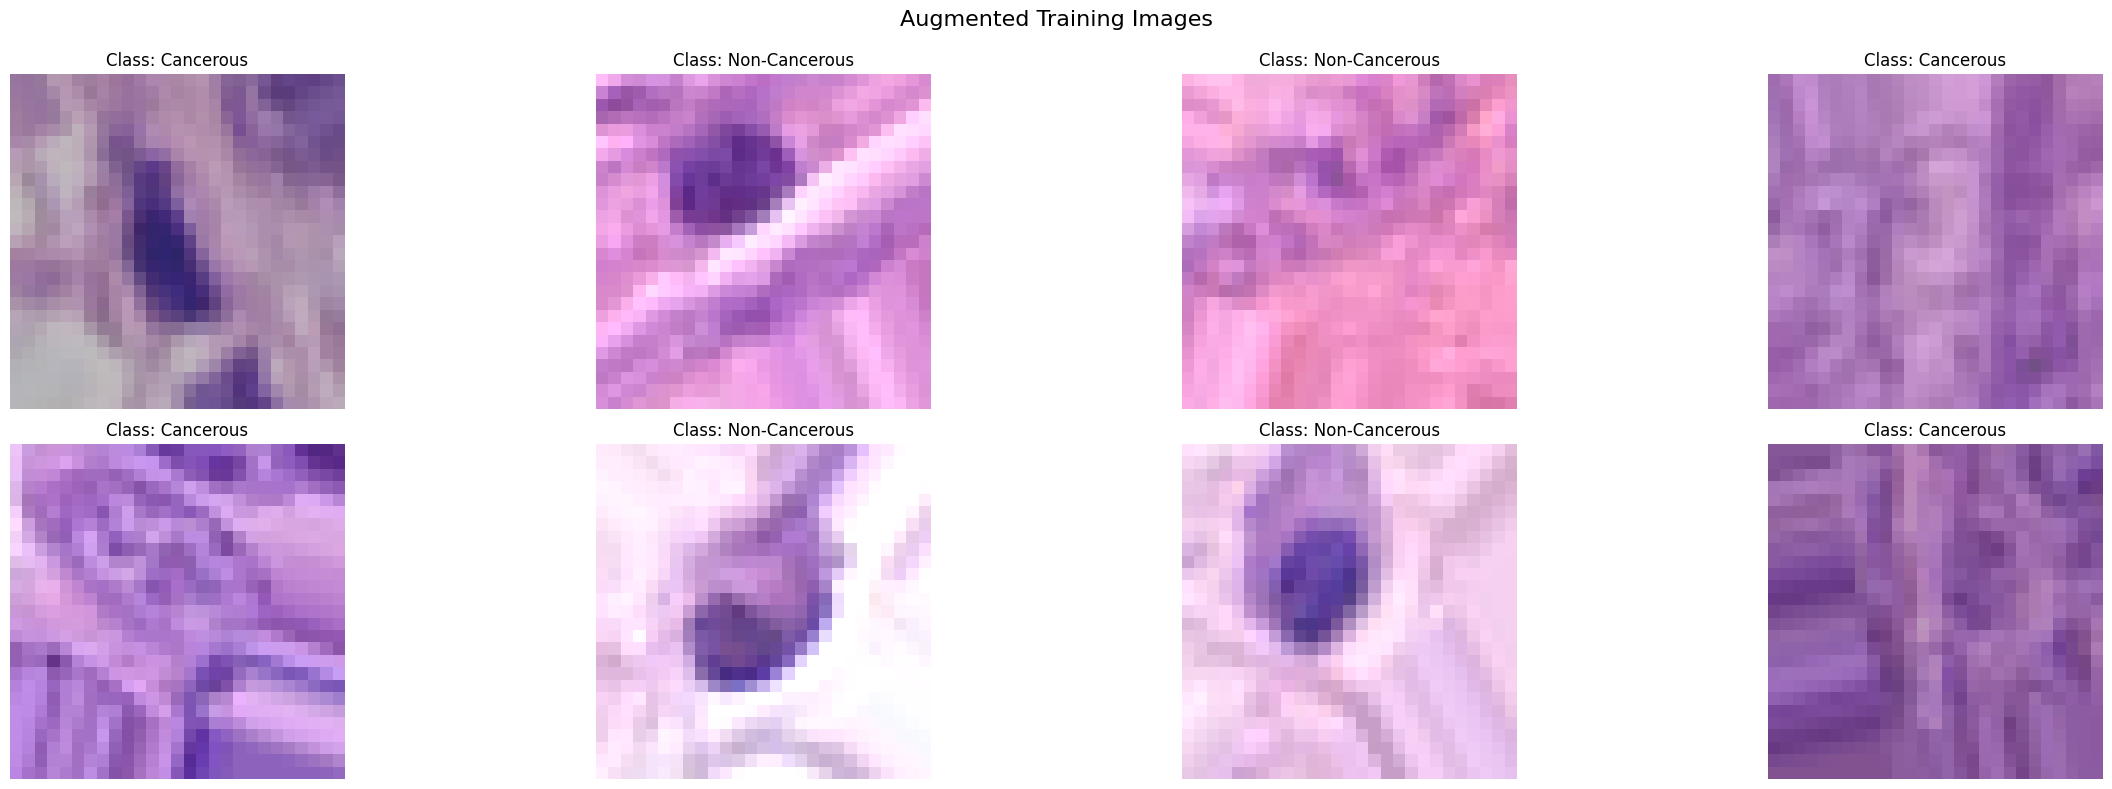

In [ ]:
import matplotlib.pyplot as plt

# Function to display augmented images from the training generator
def show_augmented_samples(train_generator, num_samples=8, figsize=(25, 8)):
    """
    Display augmented images from the training data generator

    Parameters:
    train_generator: The flow_from_dataframe generator with augmentations
    num_samples: Number of samples to display
    figsize: Size of the figure to display
    """
    # Reset the generator to ensure we get different images
    train_generator.reset()

    # Get a batch of augmented images
    augmented_batch = next(train_generator)
    images = augmented_batch[0]  # Get the images
    labels = augmented_batch[1]  # Get the labels

    # Calculate grid dimensions
    if num_samples <= 4:
        grid_size = (1, num_samples)
    else:
        grid_size = (2, num_samples // 2 + num_samples % 2)

    # Set up the figure
    fig, axes = plt.subplots(*grid_size, figsize=figsize)
    axes = axes.flatten()  # Flatten for easier indexing

    # For each sample
    for i in range(min(num_samples, len(images))):
        # Plot augmented image
        axes[i].imshow(images[i])
        axes[i].set_title(f'Class: {"Cancerous" if labels[i] == 1 else "Non-Cancerous"}')
        axes[i].axis('off')

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.suptitle('Augmented Training Images', fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

# Display 8 augmented samples from the training generator
show_augmented_samples(isCancerous_advanced_cnn_train_generator, num_samples=8)

- Augmented images vary in cell orientations and colors

### Learning Curve
loss, precision, recall and f1 curves are plot to <font color='red'>check overfitting</font>.

In [ ]:
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name):
    plt.figure(figsize=(18,7))

    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

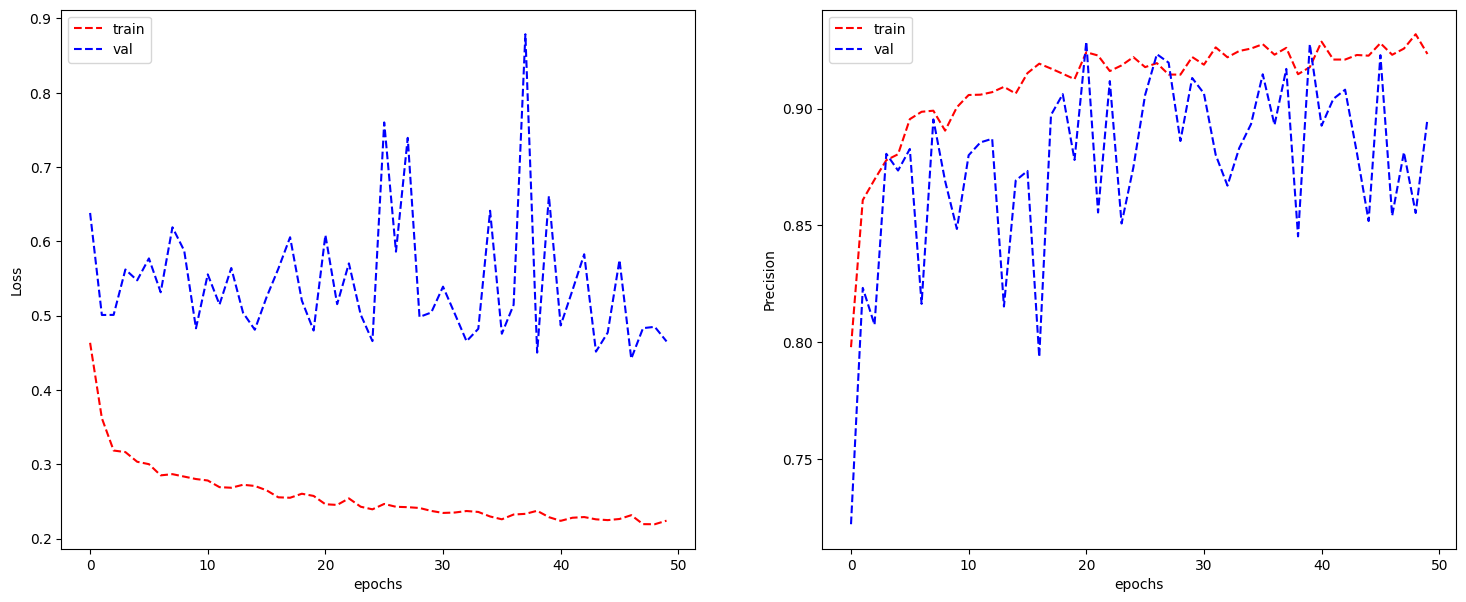

In [ ]:
plot_learning_curve(
    isCancerous_advanced_cnn_history.history['loss'],
    isCancerous_advanced_cnn_history.history['val_loss'],
    isCancerous_advanced_cnn_history.history['precision'],
    isCancerous_advanced_cnn_history.history['val_precision'],
    metric_name='Precision'
)

Compared to Baseline:
- Smaller training-validation loss gap shows reduced overfitting
- Higher validation precision indicates better generalization than baseline

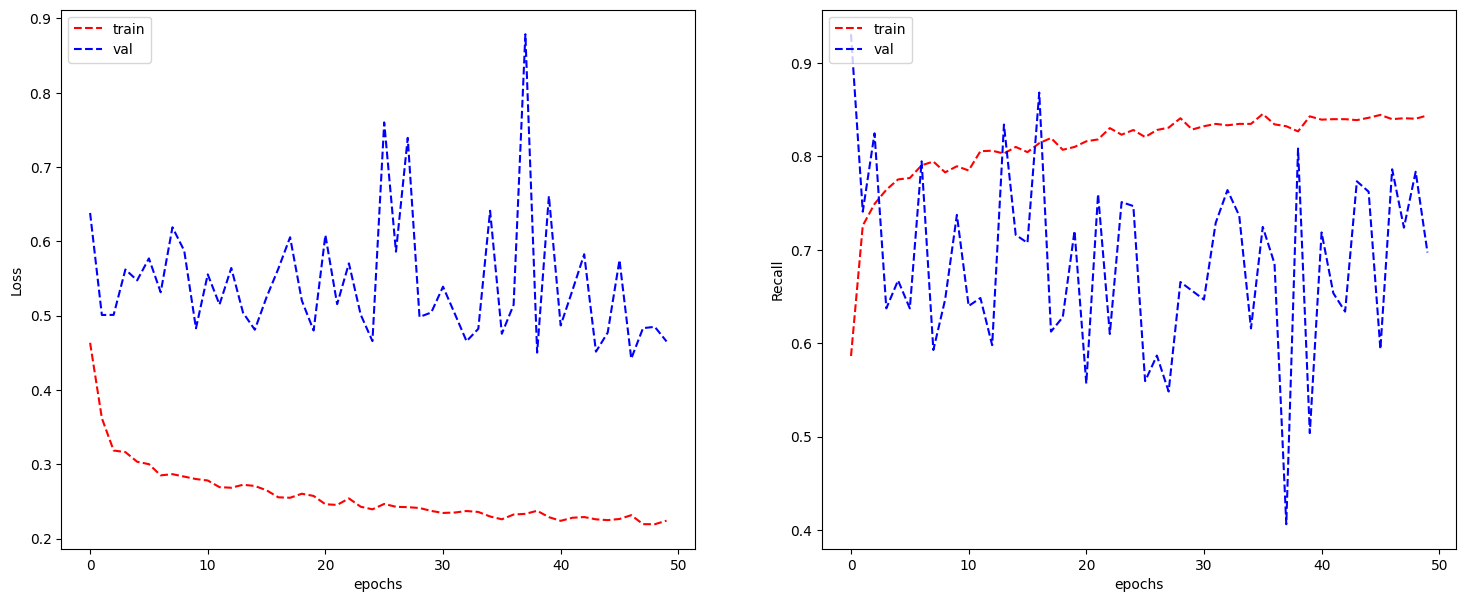

In [ ]:
plot_learning_curve(
    isCancerous_advanced_cnn_history.history['loss'],
    isCancerous_advanced_cnn_history.history['val_loss'],
    isCancerous_advanced_cnn_history.history['recall'],
    isCancerous_advanced_cnn_history.history['val_recall'],
    metric_name='Recall'
)

Compared to Baseline:
- Validation recall oscillates more (0.4-0.87) because model struggles with challenging augmented validation images while avoiding overfitting


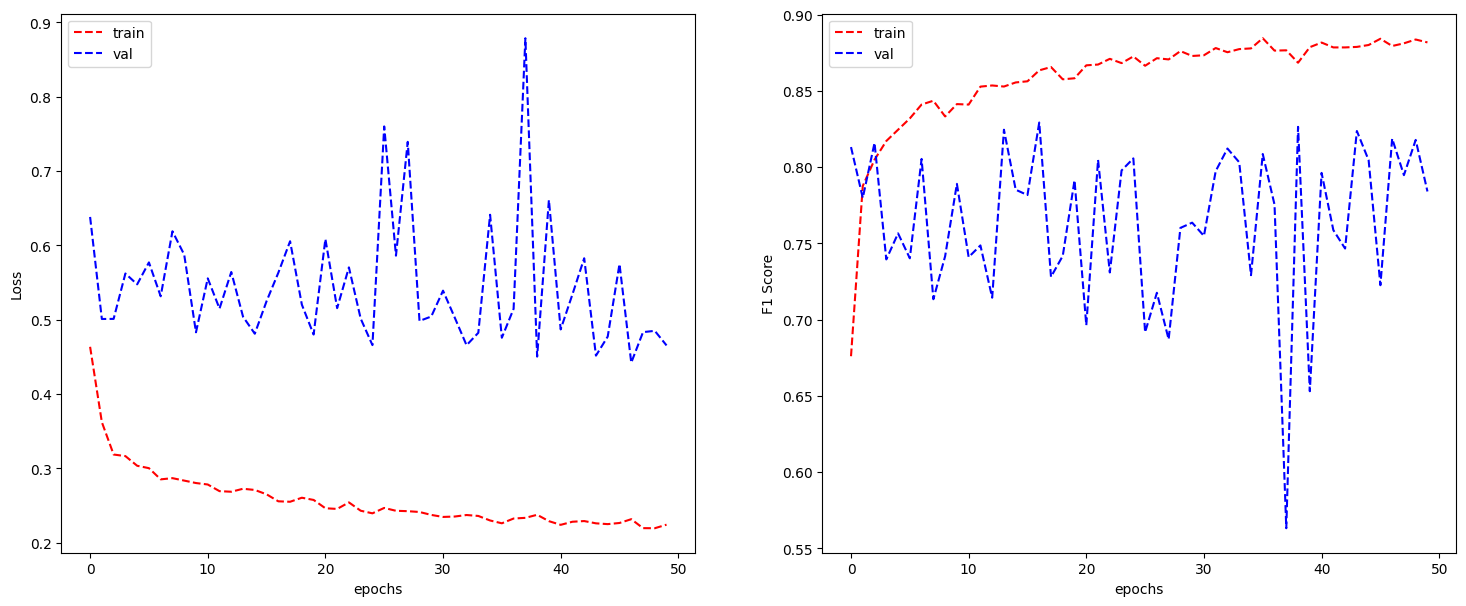

In [ ]:
plot_learning_curve(
    isCancerous_advanced_cnn_history.history['loss'],
    isCancerous_advanced_cnn_history.history['val_loss'],
    isCancerous_advanced_cnn_history.history['f1_score'],
    isCancerous_advanced_cnn_history.history['val_f1_score'],
    metric_name='F1 Score'
)

Compared to Baseline:
- Reduced training-validation F1 gap (training: 0.87, validation: 0.75) from regularization preventing memorization
- Higher validation volatility as model struggles to generalise from augmented to non-augmented images

### Test Model

Found 1839 validated image filenames belonging to 2 classes.


<ipython-input-94-d6cc88af056c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isCancerous_nn_test_data['isCancerous'] = isCancerous_nn_test_data['isCancerous'].astype('str')


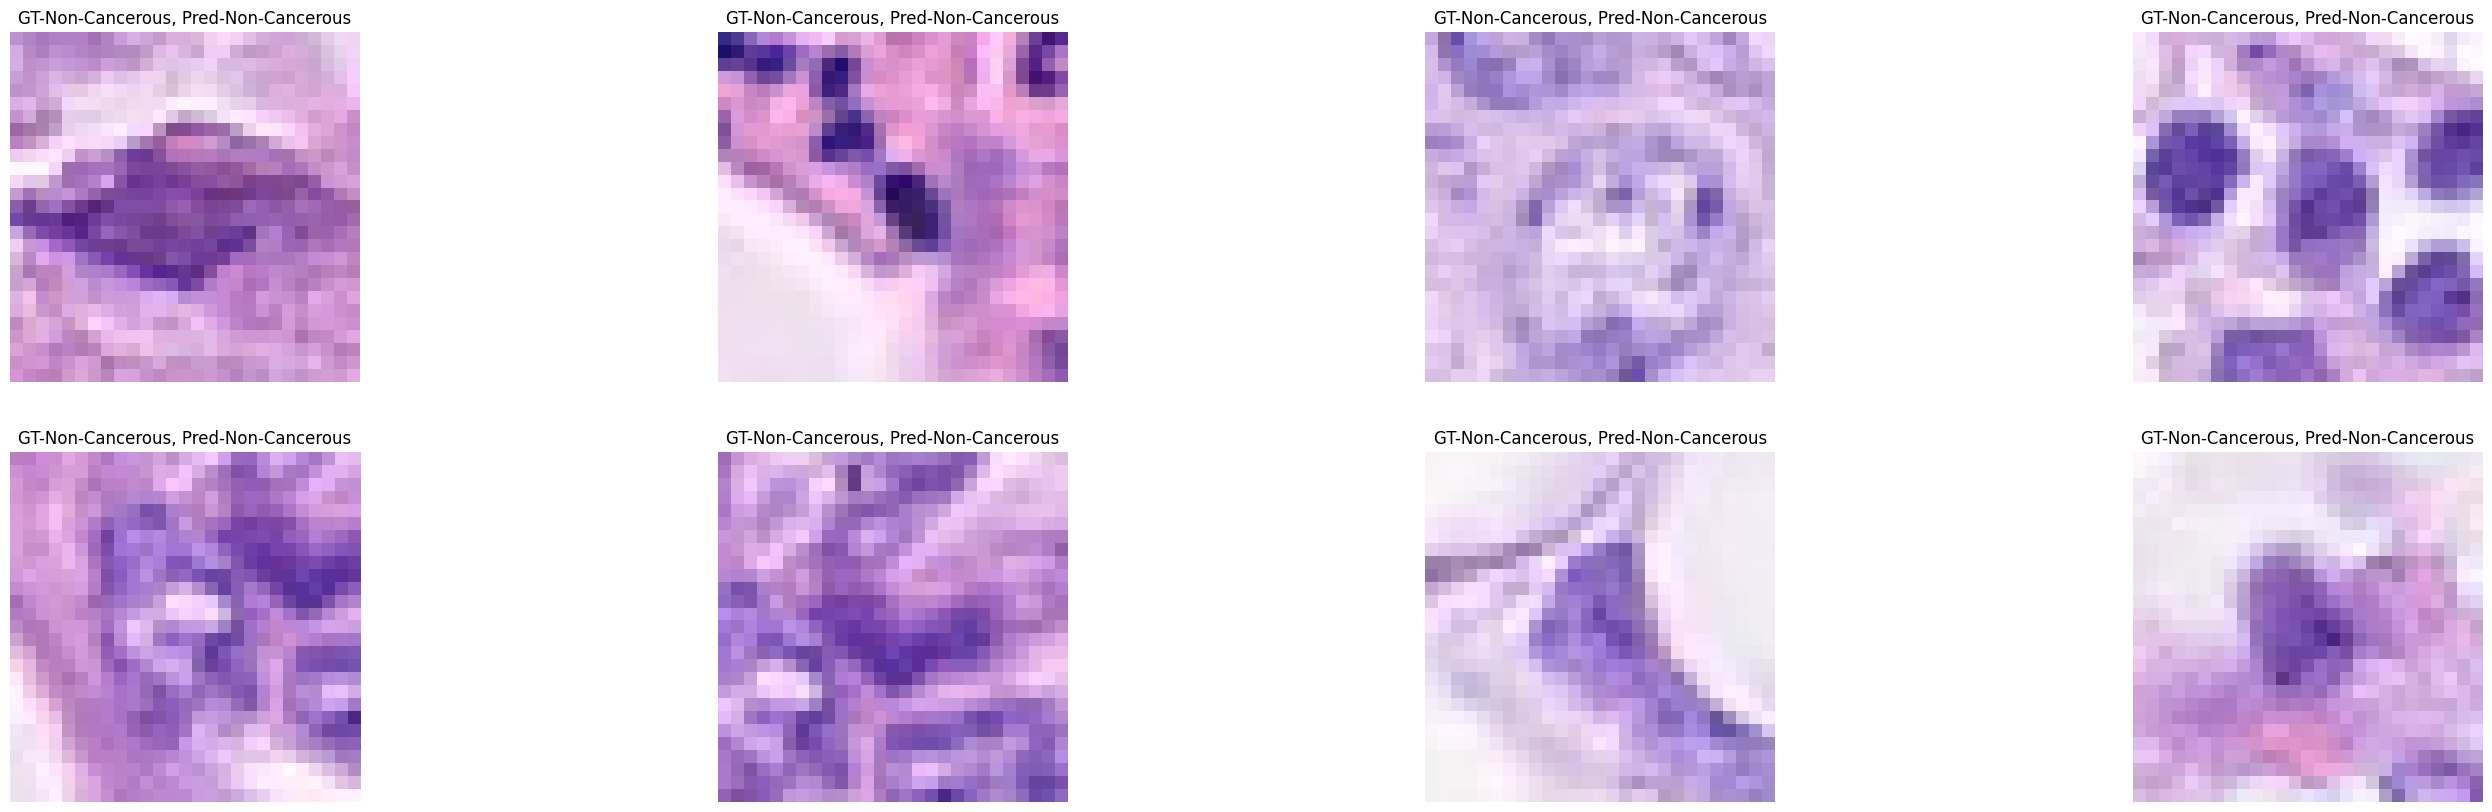

In [ ]:
# generate isCancerous label
isCancerous_label_names = {'Non-Cancerous' : 0, 'Cancerous' : 1}

# convert isCancerous to String
isCancerous_nn_test_data['isCancerous'] = isCancerous_nn_test_data['isCancerous'].astype('str')

# use Image data generators to load data in batch into memory
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

isCancerous_advanced_cnn_test_generator = test_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_test_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

# plot output of neural network on testing data
d_inv = {v: k for k, v in isCancerous_label_names.items()}
plt.figure(figsize=(35,10))
batches = 0
for x,y in isCancerous_advanced_cnn_test_generator:
        batches = batches + 1
        y_hat = isCancerous_advanced_cnn_model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 9:
            plt.subplot(2,4,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))

        else:
            break

        plt.axis('off')

- Model predict correctly for first 8 images.

## Explanatory Model Analysis For Testing Data

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve

# Reset the generator to the beginning
isCancerous_advanced_cnn_test_generator.reset()

# Calculate the number of steps needed to go through the entire test dataset
steps = len(isCancerous_nn_test_data) // batch_size
if len(isCancerous_nn_test_data) % batch_size != 0:
    steps += 1

# Collect all predictions and true labels
y_true = []
y_pred_raw = []

for i in range(steps):
    x, y = next(isCancerous_advanced_cnn_test_generator)
    y_hat = isCancerous_advanced_cnn_model.predict(x, verbose=0)

    # Collect true labels
    y_true.extend(y)

    # Collect raw predictions
    y_pred_raw.extend(y_hat)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred_raw = np.array(y_pred_raw)

In [ ]:
# convert to class labels (0 or 1)
y_pred_class = (y_pred_raw >= 0.5).astype(int)
print(classification_report(y_true, y_pred_class))

              precision    recall  f1-score   support

         0.0       0.72      0.96      0.82       914
         1.0       0.93      0.64      0.76       925

    accuracy                           0.79      1839
   macro avg       0.83      0.80      0.79      1839
weighted avg       0.83      0.79      0.79      1839



#### Macro Average Precision, Recall, F1-Score
- Baseline:
    - Precision: 0.80
    - Recall: 0.78
    - F1: 0.78
- Advanced:
    - Precision: 0.83
    - Recall: 0.79
    - F1: 0.79

Observations:
- Advanced model shows higher precision through hyperparameter tuning reducing false positives
- Slight recall improvement indicates tuning better addressed false positives than identifying all positive cases
- Overall metrics improvement demonstrates tuning benefits outweighed drawbacks for a more reliable model

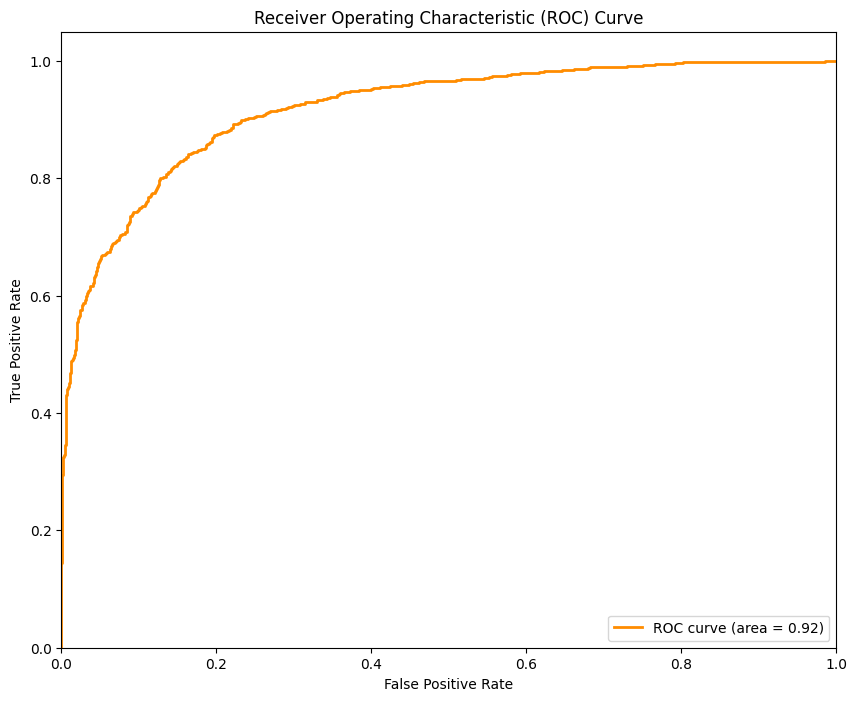

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc
# Calculate ROC curve and ROC area
fpr, tpr, thresholds_roc = roc_curve(y_true, y_pred_raw)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### ROC Curve
- Baseline AUC: 0.90
- Advanced AUC: 0.92
- advanced's Higher AUC shows hyperparameter tuning improved classification ability across thresholds

<Figure size 1000x800 with 0 Axes>

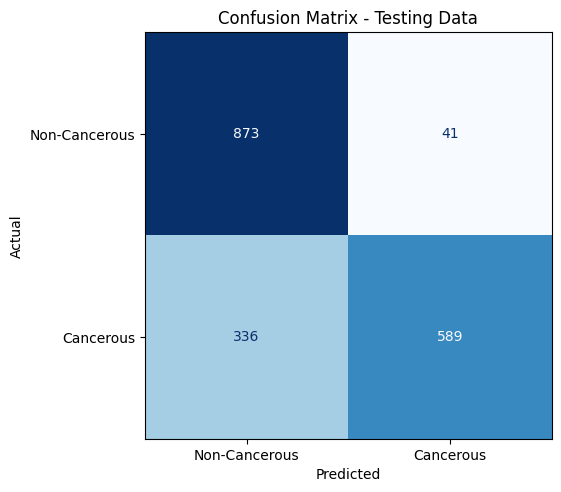

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate and plot confusion matrix
isCancerous_base_cnn_test_cm = confusion_matrix(
    y_true,
    y_pred_class
)

plt.figure(figsize=(10, 8))

# Use ConfusionMatrixDisplay for plotting
disp = ConfusionMatrixDisplay(confusion_matrix=isCancerous_base_cnn_test_cm,
                              display_labels=['Non-Cancerous', 'Cancerous'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.title('Confusion Matrix - Testing Data')
plt.show()

#### Confusion Matrix
Baseline:
- 46 false positives
- 270 false negatives

Advanced:
- 41 false positives
- 336 false negatives

Observations:
- Advanced model reduced false positives but increased false negatives because regularisation and data augmentation prevented overfitting while reducing sensitivity to cancerous features


### isCancerous Final Model Selection - Neural Network (MLP) with L2 Regularisation, Dropout, Reduced Neurons

Justification:
- has highest  precision, recall, and F1-score. AUC shows excellent discriminative ability between cancerous and non-cancerous cells, outperforming even the Advanced CNN.
- reduces false positives while keeping false negatives more manageable than the Advanced CNN. This balance is critical in medical applications where missing cancer is big concern.
- reduced neurons which create efficient model with lesser parameters because faster training while regularization techniques prevent overfitting.
- consistent performance unlike CNN show significant volatility in validation metrics during training.

### Independent Evaluation

### isCancerous Model Comparative Analysis
#### Performance Comparison with Literature (Analysis of Deep Feature Extraction for Colorectal Cancer Detection):
Baseline MLP model achieved:
- Precision: 0.85
- Recall: 0.83
- F1: 0.83
- AUC: 0.93

Comparing with models in Sarwinda et al.:
- ResNet-50 + SVM: Recall 91.13%, Precision 96.74%
- ResNet-50 + KNN: Recall 96.99%, Precision 88.65%
- DenseNet-121 + SVM: Recall 97.95%, Precision 98.95%
- DenseNet-121 + KNN: Recall 98.63%, Precision 98.43%

The DenseNet-121 models significantly outperform the baseline model in Precision and Recall because:
- Deeper architecture (121 layers vs. single hidden layer MLP)
- Pre-trained feature extraction leveraging transfer learning
- Two-stage pipeline separating feature extraction from classification
- Specialised classifiers optimized for the extracted features

#### Fairness and Consistency:
Comparison Limitations:
- We avoided accuracy because class imbalance while the literature used balanced dataset (5,000 images per class)
- We used individual cell images while paper used tissue images, representing different complexities and content
- We used patient-based splitting to prevent data leakage, but literature used standard splitting for their tissue images without patient-specific concerns
- Literature used transfer learning with pre-trained networks, only training classifiers on extracted features, while we trained entirely from scratch (increased difficulty)

#### Baseline vs. Advanced Method Raises concerns:
- Multiple optmisation techniques were implemented simultaneously, making it impossible to determine which specific modification contributed to which performance change
- The tradeoff increasing false negatives isn't adequately addressed in a cancer detection context where missed cancer are concerning
- identical AUC between baseline and advanced models suggests improvements primarily affected model size rather than classification ability

#### Final Model Selection Justification
- Because of simultaneous implementation of multiple optimisation, it's impossible to know which modification produced which benefit to decide final model.
- Doesn't weighs the clinical implications of increased false negatives in advanced model because missed cancer cases carry higher risks than false positives.

### References

1. Sarwinda D, Argyadiva T, Bustamam A, Mangunwardoyo W and Paradisa RH (2020) 'Analysis of Deep Feature Extraction for Colorectal Cancer Detection', in 2020 4th International Conference on Informatics and Computational Sciences (ICICoS), pp. 1-5, doi:10.1109/ICICoS51170.2020.9299052.
2. K. Sirinukunwattana, S. E. A. Raza, Y. Tsang, D. R. J. Snead, I. A. Cree and N. M. Rajpoot, "Locality Sensitive Deep Learning for Detection and Classiffication of Nuclei in Routine Colon Cancer Histology Images," in IEEE Transactions on Medical Imaging, vol. 35, no. 5, pp. 1196-1206, May 2016, doi: 10.1109/TMI.2016.2525803.
3. Yu, G., Sun, K., Xu, C., et al. (2021). "Accurate recognition of colorectal cancer with semi-supervised deep learning on pathological images." Nature Communications, 12, 6311. https://doi.org/10.1038/s41467-021-26643-8